In [1]:
import pandas as pd
import numpy as np
from astropy.table import Table
%matplotlib notebook
import matplotlib.pyplot as plt

# Get fits table from VizieR
https://vizier.u-strasbg.fr/viz-bin/VizieR-4


In [89]:
table

<Table length=267063>
    ID     RAJ2000    DEJ2000   Kpflag  Kpmag  Kflag
             deg        deg              mag        
  int32    float64    float64   bytes3 float32 uint8
--------- ---------- ---------- ------ ------- -----
210402122  57.510377  13.517011    gri  12.859     1
210403725  57.551112  13.554027    gri  12.347     1
210407362  57.494837  13.634567    gri  11.815     1
210406314  57.443657  13.612206    gri  11.338     1
210410183  57.795333  13.698255    JHK  15.387     1
210411271  57.676486  13.722293    JHK  16.729     1
210410964  57.604635  13.715071    JHK  16.217     1
210411525  57.510680  13.727919    gri  12.106     1
210412228  57.678138  13.744022    gri  13.443     1
      ...        ...        ...    ...     ...   ...
210505501  60.233568  15.505210    gri  13.186     1
210502513  60.478178  15.455090    gri  13.161     1
210503225  60.526298  15.466652    gri  11.771     1
210507655  60.540768  15.540668    gri   9.491     1
210506884  60.505735  15.528420    gri  11.078     1
210508134  60.396593  15.548343    gri  13.207     1
210510910  60.382090  15.593440    gri  16.581     1
210512752  60.373426  15.623278    JHK  16.773     1
210512842  60.374949  15.625037    gri  12.106     1
210517067  60.454151  15.693756    gri  11.521     1

In [90]:
table = Table.read('all_k2_stars.fit')

ValueError: cannot reshape array of size 0 into shape (57481182,)

In [88]:
c16 = pd.read_csv('./K2Campaign16targets.csv')

table = Table.read('all_k2_stars.fit')
starlist = table.to_pandas()
starlist.to_csv('K2_stars_all.csv',index=False)

ValueError: cannot reshape array of size 0 into shape (57481182,)

In [4]:
ind = []
stars = starlist['ID'].values
for i in range(len(stars)):
    #if ~np.isnan(c16['EPIC ID'].iloc[i]):
    if (c16['EPIC ID'].values == stars[i]).any():
        ind += [i]

In [5]:
c16_stars = starlist.iloc[ind]
c16_stars.to_csv('c16_stars.csv',index=False)

# Plug into casjobs for panstarrs

In [85]:
ps1 = pd.read_csv('K2_c16_stars_PS1.csv')

In [86]:
ps1

ID     RAJ2000    DEJ2000               objID      raMean  \
0     211406605  132.490956  11.741839  122091324909390796  132.490944   
1     211407208  132.377808  11.751179  122101323778271831  132.377825   
2     211409659  132.422527  11.788013  122141324224876135  132.422466   
3     211406483  130.508475  11.739767  122081305083758067  130.508380   
4     211409870  129.890109  11.790620  122141298900329211  129.890093   
...         ...         ...        ...                 ...         ...   
2441  212174148  133.694447  23.585939  136301336945593280  133.694580   
2442  212166091  130.842085  23.395049  136071308420854655  130.842011   
2443  212168876  130.707678  23.459642  136151307075591941  130.707474   
2444  212175620  130.916840  23.623967  136341309168099304  130.916807   
2445  212178463  130.739156  23.695868  136431307391765664  130.739168   

        decMean  raMeanErr  decMeanErr  qualityFlag  gMeanPSFMag  ...  \
0     11.741827    0.00198     0.00136           60    14.895200  ...   
1     11.751085    0.00269     0.01387           60    19.910900  ...   
2     11.788023    0.00276     0.00200           60    15.993600  ...   
3     11.739612    0.01209     0.05942           61    15.313400  ...   
4     11.790585    0.00361     0.00216           60    15.030700  ...   
...         ...        ...         ...          ...          ...  ...   
2441  23.585542    0.00377     0.00693           52    20.256599  ...   
2442  23.395078    0.00267     0.00105           60    15.208800  ...   
2443  23.459396    0.00322     0.00162           52    16.745501  ...   
2444  23.623941    0.00292     0.00122           60    15.367800  ...   
2445  23.695885    0.00348     0.00107           60    15.073400  ...   

        rFlags  rQfPerfect    iFlags  iQfPerfect    zFlags  zQfPerfect  \
0       115000    0.999539    115000    0.999713    115000    0.999348   
1       115000    0.999651    115000    0.999327    115000    0.999589   
2       115000    0.999707    115000    0.999669    115000    0.999649   
3       115000    0.999522  16892216    0.999176  16892216    0.999632   
4       115000    0.999147    115000    0.999031    115000    0.999474   
...        ...         ...       ...         ...       ...         ...   
2441    115000    0.999739    115000    0.999625    115000    0.999617   
2442    115000    0.999114    115000    0.999212    115000    0.999415   
2443    115000    0.999811    115000    0.999602    115000    0.999478   
2444  16892216    0.999729    115000    0.999699    115000    0.999568   
2445    115000    0.999260    115000    0.999912    115000    0.999590   

        yFlags  yQfPerfect  primaryDetection  bestDetection  
0       115000    0.999170                 1              1  
1       115000    0.999632                 1              1  
2       115000    0.999064                 1              1  
3     16892216    0.999649                 1              1  
4       115000    0.999331                 1              1  
...        ...         ...               ...            ...  
2441    115000    0.999545                 1              1  
2442    115000    0.998494                 1              1  
2443    115000    0.999803                 1              1  
2444    115000    0.999071                 1              1  
2445    115000    0.999161                 1              1  

[2446 rows x 44 columns]

In [93]:
ri = ps1['rMeanPSFMag'] - ps1['iMeanPSFMag']
gr = ps1['gMeanPSFMag'] - ps1['rMeanPSFMag']
iz = ps1['iMeanPSFMag'] - ps1['zMeanPSFMag']
zy = ps1['zMeanPSFMag'] - ps1['yMeanPSFMag']

<IPython.core.display.Javascript object>


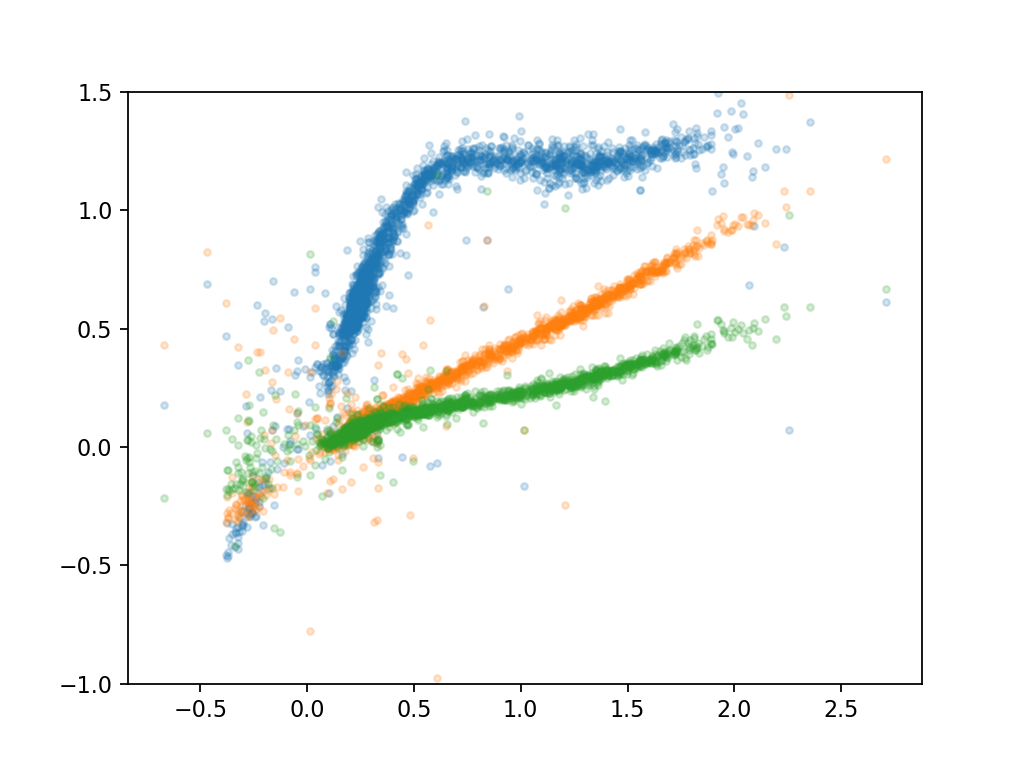

(-1, 1.5)

In [98]:
plt.figure()
plt.plot(ri,gr,'.',alpha=0.2)
plt.plot(ri,iz,'.',alpha=0.2)
plt.plot(ri,zy,'.',alpha=0.2)
plt.ylim(-1,1.5)

In [8]:
starlist

ID    RAJ2000    DEJ2000  Kpflag   Kpmag  Kflag
0       210402122  57.510377  13.517011  b'gri'  12.859      1
1       210403725  57.551112  13.554027  b'gri'  12.347      1
2       210407362  57.494837  13.634567  b'gri'  11.815      1
3       210406314  57.443657  13.612206  b'gri'  11.338      1
4       210410183  57.795333  13.698255  b'JHK'  15.387      1
...           ...        ...        ...     ...     ...    ...
267058  210508134  60.396593  15.548343  b'gri'  13.207      1
267059  210510910  60.382090  15.593440  b'gri'  16.581      1
267060  210512752  60.373426  15.623278  b'JHK'  16.773      1
267061  210512842  60.374949  15.625037  b'gri'  12.106      1
267062  210517067  60.454151  15.693756  b'gri'  11.521      1

[267063 rows x 6 columns]

In [52]:
starlist = pd.read_csv('K2_stars.csv')
targs = pd.read_csv('./target_lists/GO_all_campaigns_to_date.csv')

/Users/ryanr/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
c14 = targs.iloc[targs['campaign'].values == 14]
c14 = pd.read_csv('./target_lists/K2Campaign14targets.csv')

In [85]:
ids = c14['EPIC ID'].values.astype(int)

In [87]:
eh = k2stars['ID'].values.astype(int)
for i in range(len(eh)):
    if (eh[i] == ids).any():
        print(eh[i])

In [26]:
starlist['Campaign'] = -1
stars = starlist['ID'].values
for i in range(len(stars)):
    #if ~np.isnan(c16['EPIC ID'].iloc[i]):
    if (targs['EPIC ID'].values == stars[i]).any():
        ind = np.where(targs['EPIC ID'].values == stars[i])[0][0]
        print(ind)
        starlist['Campaign'].iloc[i] = targs['campaign'].iloc[ind]

65712
65743
65822
65793
65878
65909
65899
65915
65937
65984
65969
65990
66005
65874
65890
66006
66009
66037
66044
66036
66050
66015
66136
65939
66090
66181
66150
66297
65790
65875
65841
65852
65886
65916
65953
65965
66016
66038
66099
66145
65962
66014
66039
66027
66074
66113
66111
66098
66122
66183
66160
66212
66296
66199
66201
66267
66273
66362
66372
66154
66164
66176
66173
66187
66211
66263
66234
66256
66255
66337
66345
66339


/Users/ryanr/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


66381
66420
66481
66487
66529
66286
66404
66377
66436
66423
66435
66342
66507
66543
66505
66559
66632
66622
66649
66670
66155
66140
66198
66407
66385
66444
66502
66353
66475
66383
66418
66448
66495
66410
66546
66634
66644
66669
66454
66563
66510
66591
66577
66601
66658
66652
66598
66624
66709
66698
66744
66776
66733
66758
66817
66791
66893
66689
66734
66745
66778
66814
66832
66889
66904
66936
66931
66972
67013
66445
66456
66494
66533
66506
66588
66604
66667
66659
66657
66710
66747
66774
66772
66807
66872
66682
66723
66753
66766
66781
66848
66877
66933
66956
66916
66971
66800
66921
66944
66941
66946
67009
67018
67077
67103
67119
67088
67164
66988
67019
67069
67194
67184
67185
67205
67254
67335
66119
66105
66168
66240
66219
66269
66292
66309
66313
66243
66317
66373
66376
66446
66346
66441
66434
66476
66512
66319
66358
66411
66482
66486
66521
66557
66552
66567
66631
66695
66701
66530
66573
66518
66562
66584
66615
66740
66728
66754
66779
66619
66713
66762
66782
66826
66882
66849
66898
6693

67732
67735
67760
67796
67767
67898
67887
67932
67561
67651
67591
67677
67624
67705
67782
67857
67889
67670
67684
67692
67740
67742
67844
67784
67788
67922
67946
67810
67868
67973
67987
67976
68006
68038
68054
68076
68084
68093
68098
68112
68149
68200
68167
68150
68136
68231
67839
67851
67913
68016
67982
67995
68065
68258
68341
67917
67994
68081
68143
67998
68108
68116
68127
68354
68475
68451
68478
68553
68603
68337
68388
68414
68456
68417
68432
68519
68545
68454
68547
68607
68623
68620
68560
68610
68658
68621
68674
68657
68679
68718
68651
68636
68682
68686
68748
68807
68824
68695
68712
68721
68763
68746
68795
68887
68794
68888
68911
68967
68843
68885
68590
68595
68647
68680
68591
68659
68660
68699
68722
68656
68691
68727
68770
68740
68743
68789
68846
68805
68800
68812
68827
68836
68872
68896
68900
68897
68823
68908
68912
68928
68931
68990
68999
69060
69069
68923
68930
69042
69041
69059
69109
69000
69039
69089
69095
69133
69145
69237
69155
69283
69262
69297
68177
68244
68260
68229
6825

69108
69151
69171
69261
69178
69170
69198
69216
69274
69299
69156
69163
69192
69239
69203
69225
69284
69292
69293
69332
69381
69380
69308
69338
69371
69391
69456
69259
69324
69376
69307
69344
69358
69447
69453
69484
69458
69492
69511
69585
69092
69142
69189
69177
69215
69221
69212
69258
69296
69349
69290
69320
69351
69394
69248
69409
69574
69451
69470
69477
69493
69497
69502
69542
69519
69545
69580
69604
69611
69630
69638
69668
69712
69736
69717
69775
69591
69655
69627
69629
69699
69719
69696
69729
69754
69789
69791
69692
69759
69780
69768
69840
69863
69857
69852
69865
69917
70294
70476
70531
70550
70491
70523
70458
70494
70535
70509
70625
70733
71065
71091
70656
70676
70768
70808
70813
71035
71075
71119
71158
71155
71104
71245
71171
71266
71248
71272
71327
71338
71251
71348
71435
71504
71437
71450
71490
71220
71160
71151
71193
71234
71247
71346
71292
71302
71317
71440
71528
71481
71520
71512
71578
71656
71697
71499
71509
71612
71647
71712
71681
71729
71834
71878
71947
71953
71844
7196

72307
72044
72220
72263
72117
72172
72189
72259
72361
72225
72304
72318
72344
72366
72388
72406
72410
72439
72485
72482
72338
72339
72430
72453
72333
72428
72534
72489
72511
72585
72464
72521
72561
72630
72733
72771
72749
72790
72334
72409
72396
72316
72414
72462
72550
72572
72596
72629
72545
72605
72618
72674
72622
72710
72763
72659
72669
72726
72716
72636
72686
72741
72717
72861
72817
72875
72937
72885
72903
72981
73042
72748
72764
72774
72782
72884
72860
72908
72978
72859
72922
72930
73050
72975
73061
73048
73066
73120
72953
72932
73030
73063
73047
73122
73117
73121
73196
73253
72876
72916
73014
73043
73096
73184
73189
73207
73265
73302
73351
73350
73163
73156
73181
73200
73238
73273
73217
73370
73390
73453
73376
73405
73438
73467
73457
73544
73564
73575
73486
73610
73611
73631
73579
73576
73588
73679
73648
73382
73394
73500
73538
73533
73668
73663
73666
73657
73690
73730
73694
73785
73818
73613
73675
73705
73723
73742
73751
73763
73786
73831
73864
73894
71082
71168
71252
71276
7136

75556
75583
75622
75626
75657
75677
75707
75701
75666
75734
75802
75855
75922
75854
75948
75976
75453
75494
75490
75547
75489
75530
75557
75595
75732
75500
75548
75616
75937
75777
75755
75785
75859
75899
75891
76200
75968
75991
76014
76028
76157
76168
76061
76167
76221
76213
76183
76376
76342
76393
75728
75847
75789
75805
75913
75896
75903
76070
76141
75929
75962
76033
76146
76203
76235
76177
76247
76289
76262
76328
76386
76298
76384
76481
76493
76428
76476
76562
76495
76510
76542
76699
76732
76809
76362
76402
76473
76523
76539
76590
76573
76618
76643
76680
76654
76760
76768
76784
76749
76804
76862
76947
77066
75307
75363
75340
75554
75559
75649
75524
75527
75614
75647
75698
75506
75502
75708
75667
75717
75757
75723
75715
75786
75998
76001
75718
75809
75917
75921
75838
75858
75883
75867
75882
75900
75967
75955
75918
75996
76039
75984
76079
76011
76074
76155
76224
76236
75924
75930
75975
75908
75926
76073
76130
75966
76008
76118
76143
76180
76217
76273
76331
76472
76480
76078
76230
7614

73264
73126
73147
73213
73245
73255
73298
73356
73403
73384
73413
73474
73476
73528
73537
73551
73479
73423
73535
73550
73587
73585
73608
73680
73149
73197
73178
73299
73304
73288
73301
73283
73387
73352
73365
73430
73416
73497
73508
73547
73451
73469
73442
73488
73571
73688
73708
73519
73555
73593
73599
73635
73567
73560
73745
73809
73646
73700
73731
73768
73918
73911
73944
70872
70942
70961
70930
71013
71116
71025
71273
71172
71210
71224
71258
71265
71305
71370
71064
71109
71126
71207
71206
71275
71264
71286
71322
71237
71344
71411
71542
71569
71613
71294
71510
71711
71655
71643
71664
71688
71845
71676
71704
71674
71748
71745
71746
71763
71779
71852
71924
71974
71958
71979
71949
72029
72082
71236
71477
71533
71400
71474
71495
71515
71518
71482
71545
71584
71699
71694
71709
71700
71771
71564
71672
71640
71724
71760
71856
71743
71776
71807
72001
71832
71860
71912
72095
71716
71702
71722
71780
71920
71916
71987
72015
72074
72148
72120
72207
72173
72223
72229
72233
71955
71969
72079
7208

74933
74993
74999
74996
75023
75030
74987
75073
75099
75131
75114
75183
75144
75218
75230
75287
75211
75271
75246
75251
75280
75298
75402
75412
75432
75086
75133
75115
75175
75263
75337
75202
75276
75285
75311
75382
75375
75454
75386
75415
75379
75427
75439
75512
75476
75520
75560
75447
75492
75479
75517
75624
75283
75344
75334
75358
75371
75321
75436
75471
75433
75484
75468
75535
75581
75577
75589
75573
75700
75650
75652
75662
75719
75716
75743
75799
75574
75631
75612
75628
75654
75705
75760
75779
75746
75706
75776
75793
75857
75798
75874
75877
75979
76013
76002
74625
74700
74673
74705
74707
74733
74745
74742
74732
74790
74855
74833
74886
74887
74900
74962
74968
75003
74905
74892
74820
74869
74888
74894
74948
74995
75001
74950
74986
75032
75045
75046
75136
75199
74879
74925
75014
75029
75002
75095
75100
75146
75111
75143
75153
75255
75129
75145
75171
75189
75329
75213
75291
75231
75297
75295
75090
75128
75170
75228
75313
75203
75200
75209
75244
75254
75243
75308
75304
75352
75357
7546

75712
75759
75753
75794
75956
75904
75914
76049
76045
76052
76089
76133
76067
76121
76256
75901
76059
75983
76048
76064
76057
76068
76072
76137
76062
76115
76127
76185
76202
76162
76196
76274
76300
76264
76364
76390
76417
76421
76431
75881
75954
75997
76058
76071
76086
76125
76306
76279
76374
76349
76412
76330
76346
76397
76460
76519
76434
76458
76603
76463
76524
76529
76606
76612
76694
76764
76783
76124
76199
76239
76313
76379
76526
76538
76675
76338
76408
76387
76569
76659
76718
76682
76706
76733
76665
76713
76696
76702
76724
76802
76773
76806
76881
76923
76972
76708
76909
76912
76899
76951
76785
76920
76859
76988
76965
76979
76991
77012
77019
77045
77056
77032
77058
77124
77090
77133
77234
77248
76937
76985
76948
77134
77180
77061
77218
77239
77283
77260
77326
77303
77337
77346
77423
77453
77494
77329
77344
77475
76631
76670
76896
76911
76907
76929
76957
76968
76982
77114
77144
77165
77014
77190
77178
77275
77299
76082
76095
76178
76190
77459
77468
77490
77517
76869
76908
76998
7700

79728
79763
79759
79764
79785
79751
79765
79778
79783
79819
79818
79829
79842
79873
79871
79840
79858
79860
79884
79919
79587
79590
79585
79646
79644
79605
79655
79662
79638
79674
79692
79697
79720
79711
79732
79745
79713
79733
79739
79714
79744
79762
79775
79800
79769
79779
79780
79815
79673
79687
79749
79742
79741
79766
79757
79807
79784
79793
79799
79805
79814
79820
79824
79832
79823
79859
79855
79877
79888
79894
79897
79808
79812
79849
79839
79847
79848
79870
79857
79862
79881
79879
79903
79921
79901
79913
79940
79949
79937
79998
80012
79909
79911
79889
79917
79942
79955
79941
79982
79934
79971
79973
79988
79992
79994
80018
80017
80028
80021
80056
80069
80073
79864
79872
79867
79878
79885
79895
79887
79918
79890
79923
79931
79969
79952
79970
79967
79972
80010
80000
80004
79896
79910
79914
79926
79946
79960
79961
79981
79964
79991
79985
79976
79989
79987
79984
79996
80022
80050
80053
80029
80024
80033
80057
80058
80064
79965
80036
80015
80041
80061
80074
80038
80080
80075
80083
8008

78847
78756
78879
78992
78953
79012
78894
78942
79006
78963
79104
78740
78823
78980
78845
78878
78989
79050
79056
79044
79062
79204
79191
79187
79190
79207
79086
79175
79131
79195
79290
79356
79380
78920
79041
79274
79262
79342
79330
79353
79418
79460
79466
79471
79577
80170
80175
80887
80906
80888
80908
80916
80901
80903
80924
80941
80947
80931
80946
80982
81002
81031
81045
80898
80928
80900
80899
80904
80922
80905
80935
80951
80921
80940
80976
81138
81143
81154
81197
81241
81224
80892
80889
80893
80896
80907
80897
80919
80915
80927
80955
80890
80895
80923
80891
80894
80929
80926
80960
81023
81086
81084
81099
81088
81124
81087
81116
81183
81207
81187
81223
81020
80983
81048
81057
81108
81025
81090
81144
81145
81132
81257
81081
81264
81250
81289
81280
81354
81423
81466
81508
81177
81226
81311
81332
81374
81388
81399
81403
81439
81510
81559
81370
81456
81450
81519
81548
81571
81567
81542
81566
81601
81584
81659
81673
81680
81653
81699
80930
81033
81037
81071
81056
81220
81253
81149
8122

82113
82065
82215
82280
81346
81385
81411
81454
81459
81451
81522
81551
81580
81622
81669
81698
81723
81736
81663
81741
81750
81600
81799
81777
81815
81888
81880
81915
81984
81944
81965
81840
81831
81929
81989
81985
82066
82061
82117
82041
82070
82085
82091
82143
82180
82192
82195
82174
82171
82223
81938
81923
81946
82005
82034
82027
82190
82237
82294
82265
82308
82382
82398
82332
82383
82415
82435
82432
82481
82216
82186
82303
82333
82318
82325
82369
82411
82425
82471
82533
82534
82362
82430
82467
82479
82501
82544
82560
82567
82580
82586
82488
82572
82654
82665
82726
82724
82725
81937
82006
82095
82132
82102
82166
82135
82202
82219
82363
82341
82469
82199
82159
82170
82263
82193
82285
82298
82300
82365
82380
82230
82292
82396
82404
82441
82420
82445
82473
82495
82412
82485
82620
82493
82540
82635
82664
82642
82653
82704
82437
82472
82679
82682
82686
82716
82661
82677
82728
82730
82626
82640
82706
82893
82901
82848
82888
83014
83003
83025
83036
83050
83176
83143
83177
81552
81678
8169

82894
82978
82976
82908
82981
83086
83154
83100
83137
83210
83156
83324
83098
83237
83235
83251
83281
83469
83440
83065
83095
83187
83263
83274
83328
83371
83401
83500
83420
83515
83597
83491
83560
83656
83744
83955
83315
83413
83548
83580
83696
83669
83791
83706
83677
83825
83857
83759
83872
84000
84112
83990
84240
84347
84311
83875
83902
84047
84072
84084
84011
84029
84172
84246
84305
84307
84115
84162
84438
84407
84435
84385
84452
84509
84527
84490
84612
84587
84624
83638
83937
83983
84039
84078
84127
84228
84383
84411
84525
84484
84251
84301
84356
84381
84462
84594
84682
84693
84761
84694
84730
84824
84829
84862
84877
85069
85006
85218
85211
85263
84073
84101
84113
84197
84332
84371
84282
84453
84409
84502
84593
84530
84555
84592
84581
84574
84571
84703
84718
84760
84930
84948
84997
84895
85177
85240
85005
85121
85144
85210
85231
85262
85274
85243
85224
85286
83254
83288
83310
83424
83444
83428
83435
83556
83613
83582
83620
83590
83652
83774
83705
83790
83822
83812
83850
83863
8391

84815
84643
84659
84664
84680
84683
84678
84753
84793
84951
84931
84974
84975
84995
85094
84578
84570
84600
84604
84637
84646
84710
84689
84679
84688
84711
84725
84728
84771
84660
84665
84708
84715
84717
84704
84724
84818
84803
84842
84857
84893
84900
84721
84729
84727
84735
84726
84774
84776
84732
84749
84790
84795
84787
84806
84821
84808
84819
84847
84868
84751
84780
84792
84775
84825
84860
84889
84856
84892
84939
84945
84925
84928
84962
84890
84879
84873
84909
84973
84947
85035
85130
84736
84863
84875
84907
84917
85017
85038
85036
85043
85059
85099
85081
85184
85181
85183
85198
84983
84999
84992
85008
85031
85068
85105
85129
85115
85200
85041
85157
85143
85150
85145
85191
85195
85148
84102
84153
84191
84221
84146
84184
84226
84234
84250
84275
84266
84292
84268
84264
84317
84345
84369
84389
84254
84259
84330
84346
84351
84382
84408
84432
84430
84454
84473
84486
84460
84464
84501
84510
84508
84516
84522
84256
84344
84340
84354
84416
84439
84447
84466
84472
84390
84427
84433
84457
8447

88624
88592
88705
88776
88720
88779
88958
88951
88571
88654
88628
88784
88797
88892
88874
88888
88912
88994
88975
88987
89079
89243
89042
89055
89088
89095
89107
89203
89160
89254
89303
89423
89356
89343
89595
89681
89610
89746
87738
87891
87926
87972
87942
88056
88090
87925
88018
88031
88163
88212
88258
88016
88082
88122
88178
88241
88312
88300
88284
88291
88293
88450
88451
88359
88596
88445
88462
88514
88427
88490
88480
88544
88556
88634
88681
88722
88765
88767
88307
88308
88478
88527
88402
88522
88517
88525
88650
88629
88685
88579
88736
88692
88816
88844
88839
88889
88909
88770
88818
88866
89005
88658
88675
88789
88688
88744
88748
88805
88803
88890
88906
88898
88907
88986
89096
89128
89122
89187
89275
88434
88448
88495
88516
88567
88677
88661
88662
88584
88783
88880
88887
88795
88879
88845
88929
88905
89056
88696
88831
88962
88673
88749
88806
88938
88948
89027
88953
88858
88896
88881
88934
88998
89176
89121
89227
89114
89184
89183
89334
88846
89001
89031
89109
89098
89191
89245
8923

95516
95527
95519
95531
95544
95542
95558
95568
95571
95513
95517
95523
95532
95534
95512
95515
95524
95548
95535
95561
95576
95552
95572
95643
95614
95518
95533
95528
95539
95545
95536
95588
95633
95672
95665
95814
95719
95846
95795
95786
95976
95555
95567
95578
95581
95590
95598
95999
95770
96011
96085
96212
96232
95792
95950
95947
96246
96227
96203
96262
96561
96654
96351
96468
96464
96455
96502
96495
96665
96631
96916
97048
97026
97106
97090
97192
97194
97258
97264
97380
95538
95540
95541
95525
95553
95547
95570
95584
95597
95684
95693
95658
95723
95745
95964
96179
96303
96318
96374
96147
96342
96554
95954
96050
96215
96278
96016
96122
96317
96305
96244
96392
96406
96437
96418
96434
96616
96622
96771
96896
96664
96778
96508
96637
96709
96685
97027
96886
96999
96880
97067
97125
97011
97031
97209
97200
97184
97022
97307
97348
97470
97404
95874
95996
96074
96126
96156
96173
96411
96130
96219
96440
96470
96519
96745
96555
96729
96929
96659
96531
96728
96635
96892
96923
97191
97275
9724

88420
88603
85118
85221
85252
85073
85170
85103
85203
85230
85236
85249
85288
85287
85223
85280
85300
85301
85267
85292
85510
85516
85498
85493
85501
85497
85539
85471
85596
85585
85659
85705
85732
85791
85582
85654
85830
85828
85759
85620
85616
85629
85685
85713
85668
85707
85610
85724
85715
85825
85856
85776
85869
85927
85752
85755
85818
85829
85847
85867
85998
86029
85926
86090
86074
86122
86142
86205
86114
86175
86184
86288
85560
85499
85480
85523
85529
85554
85488
85642
85600
85679
85723
85681
85591
85804
85848
85872
85864
85444
85459
85503
85509
85567
85559
85633
85733
85735
85743
85794
85796
85805
85696
85904
85908
85933
85945
86013
86037
86009
86059
86031
86050
86179
86127
86229
85824
85843
85947
85969
85999
86043
86068
86066
86168
85949
86001
86075
86124
86167
86240
86183
86486
86429
86525
86078
86093
86212
86235
86169
86283
86281
86276
86365
86407
86441
86413
86549
86510
86650
86412
86491
86564
86607
86740
86728
86702
86811
86655
86687
86712
86815
86842
85817
85924
85880
8590

89472
89634
89618
89687
89639
89672
89675
89778
89802
89803
89837
89912
89916
89933
89948
88954
88972
89007
88990
89035
89156
89086
89117
89208
89231
89253
89258
89265
89297
89230
89278
89352
89377
89302
89437
89300
89321
89353
89447
89516
89464
89491
89591
89614
89241
89272
89426
89495
89492
89596
89635
89474
89587
89744
89716
89796
89888
89876
89855
89685
89709
89722
89832
89856
89980
89975
90003
90020
89993
90036
90046
90077
90096
90112
89463
89477
89566
89603
89498
89502
89545
89533
89579
89686
89575
89663
89759
89761
89786
89889
89926
89739
89872
89910
89957
90019
89853
89984
90044
89973
90004
90103
90098
90102
89764
89834
89881
89986
89918
89899
89987
89998
90040
90081
90091
90090
90086
90111
90053
90108
90105
90114
90038
90064
90099
90109
90118
90113
90284
90303
88983
89067
89105
89093
89119
89217
89205
89118
89162
89214
89299
89311
89376
89186
89207
89267
89361
89378
89410
89399
89451
89560
89568
89284
89256
89339
89388
89369
89417
89420
89371
89486
89538
89597
89666
89459
8960

92323
92338
92357
92397
92413
92339
92417
92343
92628
92625
92431
92458
92669
92658
92697
92714
92604
92617
92662
92684
92627
92689
92780
92885
92887
92848
92888
92907
92963
93011
93064
92922
93145
93158
92828
92894
92815
92891
92979
93012
92909
92981
93059
93143
93082
93134
93192
93275
92982
93218
93164
93384
93446
93206
93312
93327
93378
93349
93435
93473
93491
93462
93593
92806
92915
92966
93120
93356
93217
93268
93303
93416
93472
93501
93552
93531
93556
93573
93598
93638
93648
93667
93696
93709
93724
93737
93779
93712
93765
93962
94085
94118
91790
91840
91949
91992
92079
92145
91957
92136
92144
92261
92324
92092
92204
92237
92256
92295
92389
92409
92351
92270
92308
92477
92519
92577
92600
92634
92207
92222
92269
92231
92375
92469
92493
92535
92383
92370
92444
92483
92529
92540
92563
92578
92435
92451
92572
92705
92605
92616
92664
92699
92641
92756
92775
92859
92454
92539
92520
92571
92567
92594
92659
92738
92802
92701
92700
92704
92776
92854
92873
92865
92813
93062
93066
93104
9290

91333
91404
91383
91382
91531
91483
91526
91551
91465
91549
91544
91574
91610
91724
91776
91783
91836
91692
91822
91862
91520
91525
91644
91746
91625
91763
91839
91960
92001
92126
92114
91898
91998
92053
92123
92199
92133
92179
92244
92263
92319
91236
91196
91213
91354
91424
91469
91231
91261
91389
91480
91398
91482
91508
91565
91631
91633
91676
91704
91716
91737
91769
91652
91709
91718
91803
91765
91857
91889
91828
91743
91748
91770
91905
91778
91865
91983
92061
92000
92182
92241
92159
92296
91891
91909
91866
91914
91982
91993
92108
92146
92097
92038
92142
92206
92328
92361
92326
92421
92474
92526
92423
92336
92524
92586
92099
92271
92412
92414
92255
92348
92373
92418
92466
92518
92528
92510
92557
92831
92932
90452
90484
90533
90640
90613
90698
90676
90806
90891
90956
90962
91144
91178
91217
91254
90765
90912
91092
91107
91265
91235
91280
91306
91381
91314
91376
91307
91462
91612
91128
91365
91481
91351
91339
91435
91593
91657
91678
91396
91577
91654
91639
91636
91675
91843
91609
9180

95708
95810
95731
95710
95706
95759
95794
95841
95789
95988
95927
96059
96046
96095
96194
95793
95862
95894
95960
96041
96003
96174
96195
96170
96166
96273
96343
96373
96071
96144
96218
96237
96412
96391
96530
95060
95172
95129
95230
95207
95280
95369
95415
95424
95442
95235
95490
95499
95488
95489
95507
95666
95687
95691
95720
95821
95737
95843
95804
95751
95740
95781
95860
95971
96014
95911
96168
95887
95765
95869
95865
95905
95923
95970
95949
96002
96024
95807
95948
95972
95910
96107
96136
96238
96263
96255
96094
96185
96300
96067
96160
96257
96283
96146
96205
96299
96354
96239
96491
96415
96463
96595
95799
95897
95942
95977
96035
96077
96057
96127
96088
96100
96129
96164
96139
96142
96250
96084
96137
96180
96171
96271
96516
96479
96557
96613
96652
96428
96403
96551
96651
96703
96743
96817
96765
96504
96592
96574
96794
96885
96914
97037
96387
96381
96425
96499
96476
96498
96669
96597
96851
96767
96918
97019
97023
96731
96939
96977
96946
96856
96888
97100
96994
97051
97153
97231
9731

96954
97007
97131
97207
97124
97177
97236
97354
97319
97417
97543
97309
97306
97403
97409
97411
97444
97654
97635
97481
97613
97719
97821
97780
97811
97907
97931
98037
97323
97351
97385
97524
97570
97603
97515
97726
97628
97751
97619
97678
97674
97864
97862
97950
97922
97743
97839
97935
97939
98097
98113
98102
98111
98253
98204
98261
98356
98438
98506
98583
98637
96915
96960
97083
97186
97204
97362
97460
97314
97299
97360
97479
97529
97591
97753
97509
97504
97679
97699
97727
97754
97861
97932
98191
98155
98433
98535
98148
98324
98578
98687
98774
98914
98830
99039
97850
98093
98144
98120
98133
98156
98244
98177
98188
98420
98437
98474
98441
98560
98203
98406
98576
98715
98545
98604
98638
98850
98886
99003
98960
98282
98331
98403
98411
98478
98475
98665
98674
98620
98628
98678
98705
98702
98709
98833
98906
98951
98954
98955
98803
98958
99024
99083
99347
99327
99483
99409
99532
99625
99717
99570
99609
99615
99602
99649
99763
99791
100055
100105
100066
100083
100282
100281
100417
96874
969

95324
95396
95445
95470
95508
95461
94561
94670
94706
94623
94674
94699
94730
94704
94884
94876
94890
94931
94933
94837
94970
94839
94993
95106
95355
95350
95187
95224
95378
95360
95406
95380
94847
95012
95090
95091
95195
95250
95135
95139
95284
95277
95288
95229
95240
95273
95436
95338
95364
95451
95458
95462
95486
95456
95495
95454
95437
95463
95477
95502
95474
95466
95493
95496
95771
95688
95895
95761
95773
95824
95829
95898
95975
96048
95730
95715
95808
95938
95839
95915
96121
96186
96161
96444
96643
94756
94755
94772
94782
94842
94852
94862
94853
94900
95173
95308
95305
95363
95241
95403
95401
95455
95440
95450
95498
95429
95503
95492
95716
95705
95744
95752
95922
96083
96197
96181
96245
95662
95718
95675
95753
95803
96062
96039
95736
95712
95673
95734
95811
95787
95784
95908
95994
95978
96004
96167
96012
96093
96333
96276
96397
96527
96514
95827
95857
96079
96162
96225
96314
96408
96485
96549
96368
96512
96567
96550
96682
96730
96687
96777
96782
96711
96864
96993
97126
97143
9641

98990
99196
99177
99197
99241
99246
99178
99135
99198
99236
99224
99310
99325
99379
99439
99475
97893
98210
97963
97995
98088
98199
98292
98319
98401
98383
98443
98595
98562
98737
98750
98757
98733
98764
98771
98858
98970
99005
99061
99095
98519
98482
98804
98556
98647
98793
98969
99023
98953
99018
99037
99081
99126
99143
99219
99186
99274
99291
99316
99333
98873
99016
98974
99119
99146
99180
99025
99150
99183
99317
99282
99293
99237
99245
99356
99341
99448
99490
99699
99366
99463
99482
99583
99516
99554
99683
99734
99810
99730
99805
99273
99298
99272
99304
99394
99421
99556
99485
99495
99653
99670
99565
99842
99819
99921
99928
99599
99666
99682
99664
99786
99822
99844
99823
99952
99958
100035
100149
99821
99907
100471
98819
98865
98839
99098
99082
99220
99259
98997
99107
99152
99202
99330
99303
99591
99395
99442
99606
99478
99542
99626
99597
99927
99351
99476
99499
99755
99399
99534
99564
99518
99520
99587
99726
99725
99731
99827
99668
99843
99849
99852
99960
100009
99998
99944
99881


102566
102581
102595
102614
102665
102668
102745
102758
102562
102569
102611
102618
102672
102677
102597
102637
102647
102717
102656
102741
102772
102782
102661
102719
102816
102763
102792
102804
102910
102837
102926
102571
102662
102713
102767
102786
102775
102800
102756
102892
102907
102919
102933
102729
102799
102780
102839
102854
102827
102867
102863
102935
102914
102940
103094
103062
103106
103098
102967
103042
103037
103122
103084
103206
102884
102878
103023
103019
103049
103140
103022
103052
103083
103086
103102
103177
103212
103124
103230
103356
103218
103404
103351
103458
102444
102554
102586
102652
102728
102669
102722
102584
102593
102567
102629
102707
102684
102769
102583
102631
102692
102826
102807
102856
102834
102932
102953
102956
103027
102568
102605
102616
102638
102667
102570
102642
102633
102666
102705
102561
102592
102572
102596
102606
102697
102824
102735
102770
102902
102903
102905
102813
102850
102874
102888
102676
102659
102724
102738
102811
102866
102802
102916

105143
105089
105100
105157
105140
105188
105278
105306
105229
105308
105397
105290
105329
105349
105401
105406
105392
105471
105445
105429
105498
105517
105650
104957
104967
105013
104986
105068
105065
105022
105107
105081
105244
105245
105271
105296
105302
105357
105214
105268
105300
105322
105375
105430
105488
105335
105408
105505
105531
105444
105483
105532
105541
105536
105569
105571
105567
105634
105621
105682
105717
105662
105655
105696
105772
105730
105747
105788
105771
105790
105497
105502
105623
105659
105591
105597
105616
105731
105656
105776
105549
105694
105741
105742
105767
105770
105668
105732
105814
105778
105794
105799
105810
105766
105812
105815
105795
96633
96845
96848
97024
97018
97297
97327
97324
97474
97449
97572
97554
97557
97364
97503
97763
97816
97902
97638
97704
97854
97943
97899
98069
98178
98221
98304
98138
98129
98306
98168
98277
98305
98416
98457
98458
98514
98473
97844
97813
97970
98033
98140
98270
98029
98032
98355
98455
98596
98397
98450
98690
98648
988

99981
100140
100446
100464
100586
100541
100576
100764
100760
100768
100353
100528
100654
100910
100650
101074
100953
100936
101002
101110
101172
101229
101238
101249
101276
100024
100299
100296
100382
100513
100502
100616
100719
100900
100892
100959
101060
101255
101268
101339
101384
101450
101426
101472
101531
101573
101684
101895
100693
101284
101183
101096
101123
101226
101341
101319
101442
101600
101672
101777
101155
101162
101180
101325
101535
101539
101728
101646
101680
101820
101854
101940
102102
102108
102009
101477
101605
101664
101683
102035
102055
102068
102204
102167
102151
101955
101998
102004
102172
101717
101725
101744
101752
101980
101984
102125
102192
102261
101981
102142
102188
100554
100820
100968
100890
101101
101170
101335
101202
101439
101514
101298
101409
101447
101554
101176
101209
101334
101362
101667
101582
101753
101703
101804
101808
102053
101992
102016
101931
101997
102054
102073
102165
101634
101625
101768
101749
101855
101894
101900
101879
101779
101872


49299
49310
49310
49424
49424
49431
49431
49429
49429
49443
49443
49457
49457
49544
49544
49467
49467
49511
49511
49519
49519
49541
49541
49526
49526
49537
49537
49614
49614
49674
49674
49620
49620
49643
49643
49665
49665
49710
49710
296770
296772
296771
296774
296773
296775
296776
296780
296785
296789
296803
49569
49569
49943
49943
49972
49972
49815
49815
49789
49789
49928
49928
49954
49954
49781
49781
49790
49790
49864
49864
49902
49902
49952
49952
50006
50006
49969
49969
50011
50011
50122
50122
49977
49977
49998
49998
50010
50010
50226
50226
50235
50235
50068
50068
50093
50093
50131
50131
50196
50196
50213
50213
50224
50224
50274
50274
50307
50307
50338
50338
50400
50400
296881
296888
296902
296911
296924
296940
296919
296952
296999
296998
297007
297017
297025
297022
297028
297033
297060
297087
297031
297027
297037
297069
297079
297073
297121
297113
297103
297165
297179
297192
297206
297140
297190
297188
297172
297207
297194
297225
297255
297312
297205
297219
297236
297245
297267
29

296815
296811
296817
296818
296809
296808
296814
296816
296825
296821
296824
296828
296827
296836
296837
296834
296851
296844
296852
296841
296858
296875
296883
296842
296850
296859
296857
296861
296865
296869
296867
296868
296912
296915
296904
296893
296890
296894
296898
296905
296933
296926
296921
296917
296948
296854
296877
296856
296891
296889
296899
296880
296892
296901
296928
296943
296922
296941
296966
296947
296964
296967
296955
297006
297010
297009
296991
296886
296897
296916
296910
296939
296957
296976
296985
297038
297059
297026
297050
297105
297123
297128
297130
297154
297201
297195
297173
297185
297224
297208
297247
296903
296920
296932
296936
296946
296945
296962
296988
296978
296992
296975
296997
297019
297039
297063
297070
297098
297068
297023
297029
297036
297040
297046
297091
297096
297071
297075
297034
297041
297081
297084
297044
297052
297072
297055
297095
297144
297058
297093
297082
297115
297099
297210
297214
297168
297193
297234
297250
297100
297136
297145
297159

299680
299783
299748
299765
299837
299892
299897
299898
299929
299899
299912
299903
299921
300009
299909
300014
299749
299752
299780
299782
299813
299866
299880
299985
299831
299932
299963
300022
300043
300003
299999
300050
300107
300146
300192
300210
300222
300223
300317
300356
300149
300234
300243
300184
300335
300505
300407
300399
300344
300519
300548
300473
300523
300695
300699
300686
299760
299803
299886
300002
299971
299856
299887
299922
299917
299925
299960
300103
300104
300112
299994
300153
300201
300199
300237
300375
300031
300144
300168
300072
300277
300280
300339
300334
300354
300425
300403
300496
300504
300557
300571
300659
300791
300848
300966
300749
300315
300536
300634
300444
300441
300680
300672
300678
300755
300744
300757
300825
300806
300867
300892
300736
300745
300746
300750
300794
300833
300878
300997
300628
300693
300660
300734
300759
300780
300824
300765
300834
300844
300860
301028
301072
301087
301158
301159
301091
301157
301199
301200
301234
301160
301329
301041

306280
306304
297182
297184
297216
297223
297239
297262
297232
297222
297258
297274
297276
297300
297336
297288
297326
297327
297309
297304
297314
297332
297356
297378
297362
297365
297388
297430
297333
297338
297359
297381
297393
297400
297448
297476
297423
297492
297496
297364
297389
297403
297399
297407
297493
297520
297461
297486
297490
297542
297558
297506
297543
297560
297589
297580
297669
297690
297598
297628
297644
297645
297656
297684
297705
297649
297716
297801
297511
297544
297549
297575
297591
297557
297658
297606
297678
297602
297639
297648
297692
297707
297709
297745
297725
297651
297683
297686
297698
297688
297719
297749
297751
297771
297785
297828
297818
297833
297841
297780
297823
297930
297907
297503
297572
297613
297617
297655
297614
297675
297726
297701
297765
297772
297784
297790
297742
297799
297864
297847
297859
297870
297883
297896
297891
297865
297963
297971
297903
297718
297750
297789
297827
297831
297773
297819
297822
297839
297919
297949
297948
297987
297921

300155
300244
300247
300274
300285
300351
300363
300353
300395
300391
300398
300410
300265
300308
300369
300340
300435
300460
300491
300517
300521
300550
300443
300601
300720
300758
300390
300459
300450
300445
300483
300513
300396
300518
300537
300561
300596
300713
300737
300788
300798
300793
300875
300724
300735
300776
300842
300895
300917
300931
301022
300666
300681
300819
300732
300815
300829
300922
300813
300814
300880
300926
300913
300998
300979
301082
300999
300980
301042
301149
301219
301247
301112
301136
301146
301173
301155
301296
301258
301351
300322
300387
300400
300382
300453
300409
300511
300512
300426
300475
300508
300509
300531
300543
300661
300705
300663
300743
300697
300716
300772
300777
300804
300809
300838
300754
300846
300803
300832
300841
300920
300968
301089
300592
300624
300847
300851
300914
300947
300970
301008
301018
301050
301062
301057
300863
301049
301206
301203
301277
301254
301278
301355
301368
301384
301003
301014
301015
301036
301086
301059
301110
301248

302593
302564
302629
302753
302799
302859
302774
302825
302683
302746
302991
303023
303070
303027
303225
303260
303039
303117
303209
303195
303212
303556
302934
302890
303115
303133
303155
303217
303174
303176
303210
303193
303273
303361
303444
303333
303421
303382
303476
303524
303462
303620
303692
303701
303226
303283
303479
303576
303598
303638
303742
303747
303750
303816
303866
303800
303824
303878
304017
304156
302989
303003
302993
303085
303238
303268
303241
303378
303380
303506
303510
303554
303648
303726
303772
303749
303939
304037
304058
302632
302923
302821
302980
302973
303076
303145
302994
302935
303042
303171
303244
303187
303261
303280
303465
303449
303463
303521
303314
303395
303389
303423
303418
303411
303525
303532
303642
303600
303711
303499
303553
303544
303664
303699
303739
303848
303867
303919
303931
303983
303961
304012
304049
304269
304162
304243
304261
302888
302914
303040
303246
303019
303134
303214
303243
303290
303401
303254
303369
303496
303384
303390
303464

308139
307635
307660
307699
307737
307786
308052
308107
307942
308085
308141
308057
308078
308117
308088
308252
308233
308178
308198
308218
308339
308374
308448
308533
308539
308595
308603
308425
308494
308509
308542
308562
308728
306635
306647
306644
306691
306708
306617
306856
306786
306752
306831
306883
306895
306916
306885
307003
307099
306932
306968
306997
307159
307068
307464
307331
307384
307315
307386
307603
307543
307650
307652
307691
307704
307768
307829
307896
307791
307807
307876
307968
307591
307651
307720
307711
307770
307902
307959
307881
307945
308035
308067
307898
308033
308172
308213
308031
308104
308224
308249
308266
308411
308437
307958
307948
307985
307990
308049
307989
308073
308171
308202
308245
308236
308157
308136
308308
308321
308335
308343
308359
308239
308325
308301
308305
308406
308492
308534
308560
308558
308373
308477
308493
308610
308632
308620
308754
308248
308277
308459
308424
308513
308501
308518
308434
308454
308544
308556
308551
308675
308661
308693

313053
313080
313150
313258
312969
313032
313110
313120
313242
313254
313251
313168
313309
313449
313173
313160
313293
313429
313495
313533
313654
313172
313260
313403
313368
313448
313474
313349
313478
313584
313562
313602
313547
313552
313514
313570
313637
313640
313656
313836
313961
313422
313496
313548
313601
313523
313606
313695
313714
313815
313600
313603
313804
313833
313726
313784
313831
313895
313963
313930
313843
313772
313910
313886
314016
314066
314168
314229
314026
314166
314169
314179
314144
314318
314364
313104
313161
313409
313572
313438
313480
313685
313727
313739
313786
313722
313850
313792
313789
313838
313880
314021
314094
313456
313459
313579
313526
313508
313611
313635
313645
313817
313770
313852
313894
313958
314006
313943
314093
314158
314175
314080
314141
314153
314304
314264
314303
314327
314332
313909
313983
314150
314189
313993
314110
314244
314259
314356
314300
314262
314365
314499
314352
314396
314415
314634
314803
314216
314308
314430
314431
314398
314466

175171
175224
175197
175247
175181
175194
175325
175055
175037
175149
175105
175139
175180
175201
175217
175195
175239
175234
175277
175162
175174
175160
175168
175210
175256
175218
175286
175235
175298
175296
175273
175324
175312
175305
175307
175350
175362
175371
175388
175375
175379
175418
175443
175453
175473
175487
175503
175519
175351
175409
175414
175481
175454
175515
175314
175390
175376
175413
175433
175445
175436
175479
175506
175401
175494
175597
175483
175584
175542
175544
175546
175590
175661
175615
175718
175740
175696
175742
175820
175881
175132
175144
175164
175172
175216
175237
175280
175259
175270
175276
175295
175304
175322
175377
175461
175511
175398
175449
175532
175507
175530
175552
175285
175474
175406
175442
175523
175520
175522
175563
175598
175604
175653
175646
175665
175689
175588
175714
175757
175784
175812
175556
175623
175569
175620
175606
175747
175762
175578
175645
175686
175694
175715
175761
175753
175717
175755
175771
175835
175856
175749
175798
175805

177271
177341
177338
177348
177499
177117
177131
177190
177187
177175
177240
177256
177270
177281
177336
177284
177226
177251
177283
177461
177471
177506
177435
177433
177444
177474
177518
177578
177568
177661
177516
177664
177625
177660
177772
177222
177242
177280
177357
177410
177354
177374
177446
177437
177465
177519
177596
177632
177766
177739
177781
177824
177462
177458
177510
177574
177576
177523
177527
177559
177628
177709
177549
177581
177728
177764
177776
177663
177706
177813
177644
177771
177801
177828
177791
177830
177910
177972
177976
177823
177876
177862
177909
178027
177620
177679
177745
177753
177798
177859
177790
177889
177939
177937
177974
178017
177834
178099
178103
178181
178063
178078
178084
178160
178163
178178
178207
178262
178289
178338
178322
177922
177949
177989
178029
177899
177921
178059
178127
178076
178148
178193
178219
178254
178215
178304
178343
178332
178300
178465
178325
178306
178448
178470
178444
178520
178573
178429
178482
178551
178656
178192
178235

176674
176652
176681
176641
176688
176719
176738
176686
176750
176735
176783
175965
176009
176001
176015
176021
176051
176081
176041
176032
176247
176308
176353
176601
176610
176876
176756
176797
176817
176858
176936
176806
176874
176940
176948
176869
176865
176944
176963
176957
176938
177032
176897
176961
176995
177016
177023
177088
177112
177161
177042
177040
177106
177145
177210
177072
177114
177147
177233
177265
177344
177321
177325
177478
177162
177197
177292
177310
177332
177295
177279
177304
177358
177395
177415
177448
177432
177484
177636
177633
177643
177680
177514
177622
177696
177630
177675
175926
176039
176133
176027
176243
176263
176403
176265
176319
176280
176395
176465
176473
176490
176555
176634
176737
176596
176651
176707
176788
176771
176776
176801
176853
176875
176849
176831
176764
176796
176861
176844
176935
176907
176966
176894
176975
176970
176973
177048
177167
177169
177047
177081
177124
177123
177193
177223
177219
177244
176409
176434
176507
176464
176488
176493

178274
178387
178404
178497
178394
178442
178587
178629
178674
178699
178724
178769
178272
178313
178385
178566
178688
178486
178585
178617
178654
178658
178837
178725
178728
178857
178545
178628
178630
178776
178866
178915
178935
178959
179005
179183
179068
179308
179367
179401
179467
179623
179743
179795
179826
179837
179879
179890
179900
179932
179475
179545
179592
179680
179626
179769
179774
179832
179913
179785
179955
179976
179738
179773
179894
180003
180092
180112
179929
179933
180248
180074
180194
180250
180225
180275
180239
180299
180360
180351
180367
180494
180567
180794
180783
180819
180847
180986
181128
181148
181157
181362
181285
181282
177541
177671
177683
177674
177699
177743
177773
177734
177744
177752
177794
177891
177943
177982
178011
178089
177637
177673
177681
177759
177817
177881
177897
177880
178016
177874
178003
177911
177960
178004
178134
178039
178042
178073
178102
178107
178122
178214
178238
178087
178237
178188
178234
178279
178037
178200
178296
178151
178118

180664
180730
180897
180800
180801
180866
180924
180887
180935
181014
180885
180995
181149
181132
181136
181256
181186
181319
181254
181337
181458
181534
181603
181856
181558
181589
181622
181705
181853
181804
181941
181888
181906
182019
182089
182105
182117
182229
182266
181962
181988
181977
181991
182203
182138
182157
182301
182227
182324
182424
182471
182536
182402
182464
182458
182516
182470
182603
181752
181757
181778
181786
181841
181904
181827
182034
182261
182332
182259
182292
182347
182418
182445
182553
182592
182556
182748
182801
182561
182605
182610
182734
182666
182700
182714
182903
182767
182775
182841
182846
182785
182838
182909
182925
182967
183013
183056
182853
182865
182946
182954
182948
183011
182972
182934
182991
183012
183091
183181
183251
183043
183137
183171
183225
183202
183316
183326
183412
183380
183521
183543
181793
181897
181805
181891
181992
182010
182039
182060
182110
182140
182206
182212
182055
182219
182306
182168
182122
182312
182310
182248
182257
182291

180846
181024
181045
181046
180722
181004
180895
180983
181009
181101
181161
181247
181054
181108
181251
181261
181223
181284
181263
181435
181524
181015
181086
181209
181293
181286
181299
181343
181352
181392
181382
181416
181489
181531
181575
181550
181621
181590
181615
181606
181649
181633
181712
181789
181652
181699
181801
181811
182001
181152
181195
181140
181288
181214
181283
181538
181499
181579
181520
181516
181527
181724
181798
181547
181694
181707
181710
181768
181706
181731
181656
181657
181709
181720
181784
181831
181887
181933
181913
181926
181954
181911
182054
181756
181762
181876
181855
181878
181934
182066
181955
181998
182104
182167
182166
182200
182241
182318
181936
181987
182096
182088
182177
182187
182144
182244
182284
182264
182327
182399
182271
182363
182385
182442
182463
182477
182446
182544
182535
182566
182574
181702
181739
181769
181846
181967
181996
182017
182047
182032
182113
182184
182202
182255
182534
182712
182737
182818
182870
182760
182960
183050
183135

183215
183239
183144
183134
183274
183290
183349
183321
183247
183386
183480
183486
183598
183625
183303
183342
183452
183454
183482
183473
183535
183497
183600
183674
183661
183747
183758
183840
183844
183606
183696
183773
183841
183860
183912
184079
183364
183355
183400
183520
183545
183431
183503
183526
183538
183587
183551
183602
183595
183616
183719
183683
183794
183783
183789
183811
183876
183487
183574
183568
183776
183793
183856
183830
183829
183837
183859
183770
183843
183855
183847
183875
183907
184041
184064
184067
184022
184056
184118
184132
184141
183755
183766
183836
183861
183871
183890
183888
183901
183921
183925
183933
183943
184034
184031
184203
184225
184119
184285
184247
184360
184461
184124
184145
184142
184234
184238
184293
184267
184195
184251
184198
184305
184348
184403
184333
184354
184389
184482
184551
184640
184694
184646
183744
183867
183865
183990
183947
184073
184123
184099
184102
184144
184138
184193
184017
184115
184173
184175
184275
184327
184306
184457

187061
187057
187087
187127
187089
187194
187256
187304
187263
187296
187213
187143
187139
187186
187340
187202
187275
187283
187363
187387
187405
187497
187343
187346
187383
187442
187453
187536
187573
187594
187656
187652
187157
187243
187399
187464
187461
187413
187415
187482
187578
187600
187674
187710
187768
187740
187749
187792
187877
187829
187895
187924
187827
185809
185884
185885
185941
185994
186053
186038
186048
186163
186203
186197
186226
186061
186168
186231
186329
186371
186167
186248
186390
186669
186770
186881
186951
186752
186849
186785
186974
187038
187096
187153
187120
187182
187185
187271
187320
187377
187446
187495
187618
186969
187025
187088
187111
187056
187154
187290
187316
187528
187564
187630
187611
187712
187724
187826
187773
187920
187876
187938
188046
188074
188106
188141
188244
188150
188272
188331
188313
188422
188461
188348
188459
188487
188544
188707
188762
188849
188837
188848
188846
188635
188597
188642
188650
188581
188587
188589
188610
188614
188665

186829
186824
186851
186914
186948
186916
187044
186703
186714
186840
186890
186863
186716
186757
186804
186870
186924
186891
186882
186929
186950
187031
186960
186976
186988
187062
187071
187072
187134
187133
187125
187169
187172
187190
187242
187205
187237
187291
187286
187327
187309
186749
186887
186888
186943
187018
187020
187017
187128
187078
187160
187167
187178
187260
187272
187147
187257
187288
187329
187351
187456
187458
187463
187515
187524
187348
187380
187409
187544
187617
187557
187631
187709
187355
187437
187540
187592
187765
187593
187900
187963
187892
187923
186982
186990
187041
187034
187064
187165
187285
187297
187319
187248
187408
187184
187235
187374
187325
187382
187545
187494
187548
187547
187616
187690
187225
187451
187469
187506
187551
187522
187678
187689
187507
187776
187764
187813
187621
187692
187839
187950
187928
187596
187654
187664
187699
187811
187819
187883
187907
187890
187976
187985
187960
188033
188107
188202
187954
188027
188053
188076
188115
188102

192865
192849
192901
192973
192969
192977
192993
192919
191639
191645
191706
191798
191781
191808
191752
191877
191923
191892
191963
191996
191909
191938
191946
191986
192135
192085
192120
192146
192192
192243
192249
192075
192113
192309
192236
192444
192396
192449
192237
192274
192318
192362
192376
192363
192374
192388
192492
192478
192501
192584
192531
192603
192662
192678
192638
192683
192772
192697
192771
192794
192836
192923
192947
192124
192196
192199
192155
192224
192252
192287
192285
192352
192385
192213
192321
192406
192364
192491
192511
192561
192567
192497
192529
192589
192626
192536
192570
192571
192517
192608
192615
192624
192657
192666
192725
192744
192754
192731
192775
192799
192804
192857
192858
192643
192671
192715
192676
192741
192746
192778
192826
192824
192833
192768
192843
192831
192875
192886
192888
193004
192873
193013
193050
193079
193095
193119
192816
192856
192987
192944
192976
193041
193065
193047
193122
193096
193240
193144
193250
193175
193196
193283
193287

183077
183047
183080
183152
183016
183052
183060
183102
183117
183213
183161
183147
183221
183238
183243
183257
183007
183010
183076
183065
183127
183140
183105
183175
183297
183433
183271
183331
183477
183453
183500
183523
183260
183259
183359
183352
183459
183536
183416
183515
183494
183581
183637
183691
183657
183680
183733
183633
183684
183669
183656
183664
183753
183762
183832
183816
183562
183652
183677
183694
183774
183768
183805
183806
183854
183978
184000
184037
184078
184112
184075
184163
185592
185641
185704
185808
185827
185921
185911
185965
186074
186077
186115
186090
186174
186220
186110
186130
186237
186377
186272
186328
186331
186346
186326
186389
186391
186352
186440
186451
186536
186538
186527
186768
186904
186915
186968
187004
186913
186896
186970
186986
187065
187103
187129
187113
187220
187233
187266
187151
187258
187301
187407
187485
187625
187560
187602
187626
187267
187310
187344
187337
187338
187347
187419
187364
187367
187444
187558
187605
187778
187821
187860

188653
188663
188692
188482
188564
188568
188696
188775
188384
188432
188571
188550
188662
188685
188656
188626
188742
188878
188979
188898
188935
189059
188964
188988
188264
188295
188303
188342
188344
188411
188450
188404
188419
188427
188504
188575
188586
188677
188601
188820
188488
188491
188543
188537
188594
188709
188604
188751
188843
188891
188971
189013
188845
188905
188991
188720
188721
188750
188745
188781
188874
188903
188884
188994
188904
188900
189073
189020
189096
189167
189178
189168
189215
189219
189274
189301
189213
189289
189312
189298
189308
189337
189418
189532
189535
189067
189135
189118
189288
189356
189151
189193
189260
189338
189542
189427
189444
189499
189494
189531
189497
189526
189580
189705
189661
189697
189740
188691
188851
188931
188968
188967
188959
189000
188919
189033
189124
189152
189228
188963
189083
189162
189191
189196
189318
189386
189232
189252
189343
189296
189310
189397
189424
189566
189637
189686
189694
189613
189667
189353
189503
189466
189541

189557
189564
189670
189776
189690
189723
189887
189885
189938
189892
189925
189975
190029
189903
189891
189980
190050
190117
190129
190190
189628
189651
189847
189878
189787
189886
189882
189920
189963
190023
189996
190013
190019
190151
190165
190177
190201
190209
190096
190126
190157
190235
190372
190390
189426
189481
189484
189558
189646
189677
189737
189749
189778
189802
189978
190082
190105
189771
189934
189951
189936
190094
190011
190097
190133
190144
190163
190219
190202
190172
190213
190266
190357
190381
190064
190142
190296
190073
190183
190197
190276
190261
190272
190346
190369
190347
190445
190422
190303
190383
190490
190472
190532
190374
190404
190423
190425
190451
190605
190606
190331
190336
190403
190505
190506
190564
190703
190630
190709
190746
190563
190738
190827
190927
190784
190953
190986
190989
189962
190069
190310
190193
190248
190338
190363
190386
190407
190456
190236
190326
190333
190384
190341
190373
190428
190493
190597
190676
190265
190302
190450
190535
190545

192541
192598
192717
192762
192779
192848
192882
192910
192928
193000
193039
193049
193021
193038
193139
192815
192916
192934
192887
193034
192962
192990
192970
192986
193061
193121
193120
193140
193135
193210
193214
193174
193201
193265
193300
193084
193167
193192
193165
193176
193177
193180
193226
193322
193258
193324
193274
193362
193394
193350
193404
193452
193435
193407
193408
193461
193472
193539
193505
193573
193348
193370
193418
193451
193465
193502
193567
193554
193555
193708
193721
193682
193665
193713
193752
193756
193035
193110
193092
193045
193234
193255
193117
193252
193321
193352
193337
193336
193384
193340
193557
193500
193535
193450
193517
193499
193622
193561
193639
193694
193469
193512
193564
193640
193679
193742
193740
193810
193970
193723
193749
193791
193823
193886
193882
193853
193852
193896
193904
193910
193954
194051
194068
194075
194081
194149
194035
194078
190536
190593
190653
190657
190808
190916
190856
190869
190935
190950
190994
190996
191013
191087
190883

196611
196615
196637
196635
196688
196709
196713
196667
196757
196703
196744
196736
196276
196339
196352
196297
196318
196342
196393
196430
196487
196440
196388
196522
196526
196579
196649
196514
196559
196573
196571
196632
196639
196661
196694
196494
196601
196612
196607
196584
196620
196634
196642
196686
196693
196636
196782
196750
196742
196783
196788
196851
196852
196871
196905
196659
196739
196758
196794
196890
196930
196960
196983
196980
196879
196900
196948
196951
196972
196956
196991
196996
197094
196787
196793
196824
196845
196856
196867
196985
196911
196975
196997
197032
197028
197042
197065
197131
197153
197269
197266
196652
196664
196695
196698
196806
196832
196759
196835
196866
196860
196908
196922
196947
196981
196984
196875
196891
196928
196932
196967
197024
197041
197104
196833
196914
196925
196965
196915
196923
197006
197037
197072
197057
197108
197132
197135
197216
197198
197222
197248
197249
197074
197122
197169
197174
197205
197175
197172
197225
197250
197191
197231

194410
194477
194577
194618
194611
194331
194414
194458
194508
194558
194592
194492
194530
194596
194614
194604
194642
194635
194768
194769
194692
194881
194545
194610
194643
194662
194676
194677
194712
194738
194749
194826
194851
194716
194718
194747
194959
194984
194935
195017
193621
193594
193770
193854
193967
194001
193862
193952
193957
193983
194060
194018
194020
194131
194134
194079
194087
194208
194186
194245
194251
194227
194240
194303
194336
194446
194465
194160
194306
194317
194351
194374
194257
194314
194362
194319
194348
194412
194390
194436
194478
194532
194607
194578
194461
194482
194562
194594
194599
194667
194090
194114
194161
194170
194221
194349
194379
194371
194503
194393
194419
194609
194665
194425
194431
194473
194444
194449
194445
194557
194554
194559
194434
194490
194529
194544
194576
194588
194593
194626
194612
194733
194737
194633
194659
194663
194679
194727
194776
194741
194754
194788
194845
194856
194629
194627
194739
194757
194808
194827
194859
194811
194839

197012
197062
197066
197051
197059
197034
197044
197091
197095
197164
197197
197087
197110
197113
197117
197200
197196
197233
197238
196588
196663
196685
196775
196843
196892
196862
196920
196859
196919
196941
196969
196977
196976
196978
197027
197007
197009
197010
197020
197011
197025
197086
197139
197140
197144
197155
197199
197161
197186
197184
197201
197209
197300
197321
197323
197331
197005
197048
197112
197129
197141
197157
197190
197183
197218
197226
197219
197255
197252
197261
197272
197343
197388
197385
197415
197414
197145
197213
197273
197352
197246
197293
197325
197372
197393
197491
197516
197410
197455
197476
197386
197445
197477
197518
197520
197447
197441
197540
197545
197513
197631
197608
197593
197677
197603
197615
197614
197638
197637
197577
197609
197599
197640
197647
197688
197663
197695
197681
197717
197706
197733
197748
197718
197709
197751
197781
197774
197390
197412
197448
197605
197665
197661
197728
197745
196181
196193
196212
196250
196305
196439
196513
196527

46930
46930
46934
46934
46891
46891
46881
46881
46888
46888
46869
46869
46911
46911
46921
46921
46949
46949
46941
46941
46960
46960
46971
46971
47002
47002
46996
46996
47026
47026
47031
47031
47039
47039
46847
46847
46887
46887
46894
46894
46917
46917
46953
46953
46983
46983
46939
46939
46961
46961
47023
47023
47027
47027
46958
46958
46980
46980
46954
46954
46969
46969
46995
46995
47019
47019
47015
47015
47024
47024
46987
46987
46993
46993
47006
47006
46988
46988
47018
47018
47047
47047
47065
47065
47072
47072
47120
47120
47021
47021
47044
47044
47040
47040
47046
47046
47060
47060
47056
47056
47090
47090
47165
47165
47058
47058
47083
47083
47150
47150
47151
47151
47175
47175
47176
47176
47228
47228
47243
47243
47162
47162
47198
47198
47201
47201
47226
47226
47220
47220
47095
47095
47102
47102
47077
47077
47078
47078
47079
47079
47097
47097
47100
47100
47096
47096
47148
47148
47135
47135
47132
47132
47161
47161
47219
47219
47271
47271
47213
47213
47272
47272
47286
47286
47205
47205
4735

47845
47913
47913
47918
47918
47943
47943
47938
47938
47962
47962
47805
47805
47865
47865
47917
47917
47896
47896
47927
47927
47939
47939
47953
47953
47947
47947
47950
47950
48079
48079
48019
48019
48058
48058
48087
48087
48092
48092
48089
48089
48124
48124
47688
47688
47754
47754
47736
47736
47767
47767
47745
47745
47755
47755
47790
47790
47794
47794
47803
47803
47817
47817
47842
47842
47811
47811
47857
47857
47901
47901
47932
47932
47922
47922
47791
47791
47821
47821
47847
47847
47876
47876
47966
47966
47937
47937
47994
47994
48011
48011
48067
48067
47904
47904
47893
47893
48006
48006
48033
48033
48044
48044
47951
47951
47995
47995
48055
48055
48002
48002
48035
48035
48074
48074
48070
48070
48112
48112
48069
48069
48082
48082
48189
48189
48205
48205
48196
48196
48269
48269
48288
48288
48104
48104
48167
48167
48122
48122
48190
48190
48199
48199
48216
48216
48229
48229
48280
48280
48262
48262
48256
48256
48265
48265
48278
48278
48295
48295
48266
48266
48296
48296
48312
48312
48347
4834

48535
48535
48567
48567
48611
48611
48622
48622
48656
48656
48652
48652
48610
48610
48692
48692
48720
48720
48745
48745
48679
48679
48703
48703
48744
48744
48773
48773
48768
48768
48791
48791
48836
48836
48819
48819
48781
48781
48717
48717
48787
48787
48821
48821
48884
48884
48852
48852
48861
48861
48900
48900
48949
48949
48912
48912
48799
48799
48841
48841
48843
48843
48905
48905
48945
48945
48950
48950
48918
48918
49022
49022
49091
49091
49067
49067
49088
49088
49132
49132
49157
49157
49167
49167
48998
48998
49030
49030
49047
49047
49087
49087
49119
49119
49078
49078
49186
49186
49210
49210
49263
49263
49268
49268
49252
49252
49329
49329
49357
49357
49391
49391
49416
49416
49432
49432
49395
49395
49404
49404
49480
49480
49571
49571
49307
49307
49465
49465
49489
49489
49504
49504
49625
49625
49545
49545
49539
49539
49582
49582
49623
49623
49654
49654
49658
49658
49578
49578
49678
49678
49735
49735
49748
49748
49758
49758
49760
49760
49660
49660
49684
49684
49687
49687
49744
49744
4972

49178
49328
49328
49164
49164
49309
49309
49376
49376
49280
49280
49292
49292
49367
49367
49359
49359
49420
49420
49403
49403
49371
49371
49414
49414
49472
49472
49459
49459
49530
49530
49632
49632
49695
49695
49702
49702
48553
48553
48556
48556
48637
48637
48631
48631
48660
48660
48721
48721
48770
48770
48766
48766
48675
48675
48757
48757
48756
48756
48834
48834
48814
48814
48654
48654
48706
48706
48868
48868
48925
48925
48915
48915
48947
48947
48926
48926
49025
49025
48840
48840
48888
48888
48930
48930
48941
48941
48960
48960
48967
48967
49018
49018
48983
48983
48987
48987
48991
48991
49050
49050
49029
49029
49098
49098
48984
48984
49019
49019
49056
49056
49107
49107
49187
49187
49197
49197
49199
49199
49166
49166
49240
49240
49220
49220
49274
49274
48864
48864
48910
48910
48906
48906
48935
48935
48966
48966
49023
49023
49016
49016
49046
49046
49062
49062
49090
49090
49134
49134
49191
49191
48993
48993
49026
49026
49127
49127
49133
49133
49169
49169
49190
49190
49206
49206
49096
4909

50955
50955
50816
50816
50904
50904
51023
51023
51094
51094
51142
51142
51144
51144
51158
51158
50817
50817
50831
50831
50867
50867
50879
50879
50883
50883
50919
50919
51024
51024
51056
51056
50993
50993
50992
50992
51074
51074
51069
51069
51054
51054
51055
51055
51104
51104
51111
51111
51151
51151
51156
51156
51044
51044
51022
51022
51011
51011
51046
51046
51219
51219
51252
51252
51275
51275
51279
51279
51371
51371
51331
51331
51417
51417
51426
51426
51448
51448
51466
51466
51503
51503
51532
51532
51559
51559
51513
51513
51616
51616
51645
51645
51709
51709
51116
51116
51127
51127
51173
51173
51194
51194
51184
51184
51205
51205
51132
51132
51164
51164
51189
51189
51315
51315
51239
51239
51277
51277
51351
51351
51382
51382
51365
51365
51441
51441
51269
51269
51344
51344
51312
51312
51416
51416
51436
51436
51506
51506
51510
51510
51542
51542
51604
51604
51537
51537
51562
51562
51614
51614
51558
51558
51623
51623
51639
51639
51651
51651
51530
51530
51550
51550
51599
51599
51634
51634
5164

51849
51869
51869
51934
51934
51951
51951
51911
51911
52016
52016
52073
52073
52041
52041
52025
52025
52012
52012
52141
52141
52130
52130
52122
52122
52219
52219
52270
52270
51933
51933
51902
51902
51918
51918
51948
51948
51980
51980
51995
51995
52000
52000
52049
52049
52109
52109
52032
52032
52185
52185
52090
52090
52121
52121
52151
52151
52171
52171
52172
52172
52287
52287
52003
52003
52076
52076
52095
52095
52126
52126
52149
52149
52127
52127
52161
52161
52148
52148
52199
52199
52218
52218
52168
52168
52183
52183
52329
52329
52282
52282
52330
52330
52336
52336
52358
52358
52377
52377
52445
52445
52203
52203
52318
52318
52314
52314
52305
52305
52349
52349
52352
52352
52361
52361
52499
52499
52432
52432
52426
52426
52574
52574
52577
52577
52442
52442
52448
52448
52537
52537
52549
52549
52634
52634
52660
52660
52673
52673
52734
52734
52661
52661
52752
52752
52756
52756
52759
52759
52254
52254
52253
52253
52368
52368
52295
52295
52322
52322
52353
52353
52387
52387
52446
52446
52385
5238

54282
54295
54295
54324
54324
54430
54430
54453
54453
54600
54600
54421
54421
54490
54490
54564
54564
54621
54621
54636
54636
54656
54656
54696
54696
54759
54759
54219
54219
54233
54233
54181
54181
54247
54247
54345
54345
54348
54348
54335
54335
54376
54376
54423
54423
54398
54398
54437
54437
54420
54420
54530
54530
54366
54366
54469
54469
54463
54463
54493
54493
54339
54339
54333
54333
54358
54358
54426
54426
54432
54432
54415
54415
54452
54452
54514
54514
54577
54577
54582
54582
54674
54674
54704
54704
54506
54506
54542
54542
54547
54547
54644
54644
54658
54658
54721
54721
54630
54630
54632
54632
54637
54637
54700
54700
54675
54675
54705
54705
54723
54723
54813
54813
54735
54735
54907
54907
54964
54964
54839
54839
54798
54798
54830
54830
54920
54920
54958
54958
54945
54945
54960
54960
55103
55103
55063
55063
55177
55177
54498
54498
54567
54567
54670
54670
54701
54701
54679
54679
54692
54692
54720
54720
54744
54744
54750
54750
54758
54758
54847
54847
54866
54866
54889
54889
54926
5492

301374
301505
301774
301656
301688
301865
301837
301924
299953
300159
300183
300066
300178
300182
300204
300233
300160
300246
300216
300235
300268
300284
300313
300249
300286
300295
300307
300331
300381
300361
300325
300388
300448
300256
300273
300264
300283
300314
300330
300350
300341
300458
300499
300520
300568
300651
300542
300538
300629
300662
300617
300685
300346
300434
300393
300385
300439
300488
300500
300566
300461
300515
300609
300465
300481
300539
300637
300669
300708
300668
300786
300950
301019
300565
300599
300899
300756
300787
300845
300874
300877
300973
300957
301013
300988
300978
301045
301156
301184
301093
301139
301148
301078
301152
301246
300611
300690
300671
300703
300779
300799
300870
300893
300910
300937
301001
301069
301051
300981
301063
301007
301012
301074
301153
301262
301191
301340
301352
301362
301010
301071
301107
301096
301196
301053
301181
301243
301240
301279
301342
301175
301271
301348
301358
301444
301561
301386
301497
301445
301484
301482
301486
301530

55832
56029
56029
56051
56051
56023
56023
55837
55837
55926
55926
55956
55956
56039
56039
56002
56002
55999
55999
56206
56206
56156
56156
56280
56280
56460
56460
56188
56188
56151
56151
56397
56397
56379
56379
56327
56327
56346
56346
56400
56400
56469
56469
56545
56545
56601
56601
56607
56607
56650
56650
56646
56646
56693
56693
56742
56742
55894
55894
55909
55909
55937
55937
56024
56024
56044
56044
55945
55945
55965
55965
56020
56020
55970
55970
56017
56017
56077
56077
56136
56136
56221
56221
56229
56229
56380
56380
56087
56087
56184
56184
56202
56202
56132
56132
56264
56264
56273
56273
56245
56245
56372
56372
56385
56385
56431
56431
56446
56446
56613
56613
56574
56574
56670
56670
56402
56402
56560
56560
56590
56590
56665
56665
56708
56708
56735
56735
56847
56847
56922
56922
56897
56897
56729
56729
56749
56749
56786
56786
56926
56926
56919
56919
56939
56939
56973
56973
57024
57024
57163
57163
56249
56249
56272
56272
56468
56468
54521
54521
54581
54581
54571
54571
54668
54668
54688
5468

58194
58194
58329
58329
58368
58368
58408
58408
57967
57967
57960
57960
57962
57962
57952
57952
58013
58013
58024
58024
58099
58099
58097
58097
58135
58135
58003
58003
58056
58056
58149
58149
58186
58186
58298
58298
58207
58207
58229
58229
58239
58239
58260
58260
58288
58288
58317
58317
58346
58346
58349
58349
58383
58383
58276
58276
58486
58486
58459
58459
58558
58558
58159
58159
58221
58221
58251
58251
58302
58302
58339
58339
58347
58347
58403
58403
58483
58483
58476
58476
58453
58453
58460
58460
58526
58526
58583
58583
58606
58606
58546
58546
58575
58575
58578
58578
58671
58671
58565
58565
58509
58509
58590
58590
58538
58538
58597
58597
58779
58779
56265
56265
56388
56388
56423
56423
56401
56401
56428
56428
56438
56438
56542
56542
56472
56472
56517
56517
56597
56597
56405
56405
56538
56538
56557
56557
56589
56589
56604
56604
56666
56666
56602
56602
56615
56615
56639
56639
56619
56619
56661
56661
56823
56823
56784
56784
56832
56832
56879
56879
56891
56891
56846
56846
56892
56892
5691

51482
51482
51478
51478
51527
51527
51534
51534
51505
51505
51620
51620
51607
51607
51622
51622
50856
50856
50768
50768
51149
51149
50946
50946
51029
51029
51053
51053
51070
51070
51154
51154
51175
51175
51325
51325
51353
51353
51445
51445
51535
51535
51095
51095
51119
51119
51141
51141
51764
51764
51872
51872
52001
52001
52042
52042
52077
52077
51427
51427
51431
51431
51584
51584
51572
51572
51701
51701
51697
51697
51744
51744
51800
51800
51724
51724
51775
51775
51790
51790
51890
51890
51657
51657
51717
51717
51825
51825
51941
51941
52072
52072
52080
52080
52145
52145
52186
52186
52245
52245
52320
52320
52328
52328
52339
52339
52506
52506
52462
52462
52465
52465
52511
52511
52526
52526
52534
52534
52528
52528
52563
52563
52593
52593
51516
51516
51547
51547
51606
51606
51627
51627
51674
51674
51659
51659
51652
51652
51696
51696
51704
51704
51624
51624
51628
51628
51731
51731
51793
51793
51788
51788
51734
51734
51745
51745
51812
51812
51850
51850
51871
51871
51945
51945
51601
51601
5162

53121
52969
52969
53044
53044
53058
53058
53065
53065
53069
53069
53071
53071
53170
53170
53158
53158
53251
53251
53262
53262
53012
53012
53041
53041
53024
53024
53066
53066
53108
53108
53119
53119
53131
53131
53148
53148
53124
53124
53190
53190
53123
53123
53135
53135
53175
53175
53187
53187
53200
53200
53223
53223
53231
53231
53249
53249
53291
53291
53253
53253
53254
53254
53300
53300
53336
53336
53376
53376
53371
53371
53326
53326
53312
53312
53341
53341
53357
53357
53383
53383
53449
53449
53181
53181
53221
53221
53256
53256
53250
53250
53325
53325
53353
53353
53355
53355
53316
53316
53339
53339
53306
53306
53352
53352
53354
53354
53379
53379
53388
53388
53413
53413
53425
53425
53479
53479
53367
53367
53430
53430
53478
53478
53519
53519
53476
53476
53481
53481
53616
53616
52157
52157
52242
52242
52321
52321
52355
52355
52308
52308
52325
52325
52293
52293
52290
52290
52284
52284
52294
52294
52326
52326
52302
52302
52347
52347
52374
52374
52345
52345
52416
52416
52452
52452
52510
5251

54953
54998
54998
55006
55006
54859
54859
54929
54929
54924
54924
54959
54959
55061
55061
55143
55143
55052
55052
55077
55077
53871
53871
53918
53918
53957
53957
54361
54361
54296
54296
54337
54337
54330
54330
54379
54379
54332
54332
54356
54356
54410
54410
54459
54459
54461
54461
54565
54565
54631
54631
54554
54554
54584
54584
54652
54652
54642
54642
54728
54728
54772
54772
54782
54782
54110
54110
54268
54268
54317
54317
54436
54436
54524
54524
54831
54831
54898
54898
54888
54888
55069
55069
54512
54512
54535
54535
54543
54543
54546
54546
54583
54583
54602
54602
54662
54662
54559
54559
54669
54669
54667
54667
54740
54740
54715
54715
54694
54694
54708
54708
54716
54716
54725
54725
54774
54774
54823
54823
54867
54867
54908
54908
54764
54764
54797
54797
54824
54824
54781
54781
54788
54788
54903
54903
54834
54834
54886
54886
54918
54918
54955
54955
54947
54947
54944
54944
54912
54912
55118
55118
55117
55117
55140
55140
55243
55243
54906
54906
54937
54937
54943
54943
54969
54969
54989
5498

56497
56371
56371
56407
56407
56356
56356
56410
56410
56508
56508
56485
56485
56563
56563
56554
56554
56688
56688
56697
56697
56382
56382
56399
56399
56481
56481
56614
56614
56651
56651
56556
56556
56567
56567
56586
56586
56739
56739
56715
56715
56705
56705
56838
56838
56732
56732
56645
56645
56642
56642
56769
56769
56863
56863
56780
56780
56841
56841
56883
56883
56885
56885
56925
56925
56941
56941
56966
56966
56927
56927
56867
56867
57040
57040
57080
57080
57123
57123
57168
57168
56664
56664
56741
56741
56812
56812
56809
56809
56914
56914
56896
56896
56765
56765
56777
56777
56848
56848
56932
56932
57031
57031
57032
57032
56992
56992
57053
57053
57171
57171
57115
57115
57057
57057
57308
57308
57270
57270
57314
57314
57396
57396
57451
57451
57401
57401
57429
57429
57521
57521
57590
57590
57548
57548
57779
57779
56921
56921
57006
57006
57062
57062
57144
57144
57091
57091
57149
57149
57218
57218
57206
57206
57151
57151
57219
57219
57242
57242
57272
57272
57309
57309
57325
57325
57333
5733

58532
58490
58490
58543
58543
58650
58650
58643
58643
58584
58584
58626
58626
58733
58733
58772
58772
58805
58805
58871
58871
58908
58908
58644
58644
58716
58716
58738
58738
58828
58828
58819
58819
58771
58771
58822
58822
58879
58879
58971
58971
59036
59036
57465
57465
57502
57502
57771
57771
57923
57923
57958
57958
57873
57873
57877
57877
57924
57924
57997
57997
57866
57866
57925
57925
57949
57949
58074
58074
57989
57989
58039
58039
58022
58022
58057
58057
58075
58075
58107
58107
58120
58120
58158
58158
58160
58160
58265
58265
58259
58259
58292
58292
58284
58284
57981
57981
58052
58052
58109
58109
58060
58060
58137
58137
58139
58139
58134
58134
58200
58200
58225
58225
58256
58256
58290
58290
58379
58379
58385
58385
58361
58361
58365
58365
58332
58332
58407
58407
58401
58401
58429
58429
58233
58233
58306
58306
58238
58238
58322
58322
58340
58340
58362
58362
58366
58366
58371
58371
58501
58501
58512
58512
58416
58416
58533
58533
58617
58617
58529
58529
58599
58599
58613
58613
58632
5863

58938
59015
59015
59114
59114
59024
59024
59074
59074
59161
59161
59116
59116
59258
59258
59269
59269
58840
58840
58888
58888
58913
58913
58854
58854
58858
58858
58898
58898
58929
58929
58967
58967
58949
58949
58961
58961
58948
58948
59012
59012
58998
58998
59101
59101
59245
59245
59042
59042
59020
59020
59073
59073
59225
59225
59253
59253
59303
59303
59388
59388
59207
59207
59315
59315
59378
59378
59371
59371
59474
59474
59668
59668
59444
59444
59646
59646
59733
59733
59798
59798
59794
59794
59840
59840
58923
58923
58983
58983
59013
59013
59124
59124
59231
59231
59363
59363
59391
59391
59423
59423
58993
58993
58977
58977
59023
59023
59078
59078
59055
59055
59144
59144
59104
59104
59131
59131
59148
59148
59235
59235
59183
59183
59216
59216
59329
59329
59247
59247
59300
59300
59293
59293
59330
59330
59426
59426
59469
59469
59312
59312
59282
59282
59302
59302
59305
59305
59317
59317
59352
59352
59333
59333
59358
59358
59390
59390
59398
59398
59422
59422
59435
59435
59480
59480
59478
5947

60236
60236
60307
60307
59949
59949
60146
60146
60164
60164
60223
60223
60232
60232
60263
60263
60301
60301
60326
60326
60367
60367
60435
60435
60359
60359
60368
60368
60400
60400
60484
60484
60480
60480
60503
60503
60523
60523
60485
60485
60543
60543
60516
60516
60582
60582
60601
60601
60653
60653
60660
60660
60685
60685
60707
60707
60711
60711
60765
60765
60812
60812
60269
60269
60338
60338
60380
60380
60352
60352
60381
60381
60463
60463
60424
60424
60481
60481
60532
60532
60593
60593
60635
60635
60759
60759
60741
60741
60791
60791
60803
60803
60871
60871
60811
60811
60919
60919
60977
60977
61075
61075
61123
61123
60658
60658
60613
60613
60676
60676
60691
60691
60718
60718
60649
60649
60737
60737
60742
60742
60790
60790
60807
60807
60716
60716
60750
60750
60776
60776
60837
60837
60817
60817
60852
60852
60894
60894
60896
60896
60769
60769
60799
60799
60831
60831
60874
60874
60888
60888
60721
60721
60738
60738
60764
60764
60829
60829
60814
60814
60775
60775
60800
60800
60819
60819
6090

59702
59671
59671
59703
59703
59734
59734
59222
59222
59208
59208
59233
59233
59262
59262
59265
59265
59272
59272
59290
59290
59331
59331
59342
59342
59375
59375
59430
59430
59417
59417
59442
59442
59446
59446
59412
59412
59656
59656
59481
59481
59505
59505
59516
59516
59544
59544
59598
59598
59672
59672
59680
59680
59721
59721
59724
59724
59676
59676
59799
59799
59765
59765
59686
59686
59709
59709
59797
59797
59814
59814
59853
59853
59786
59786
59889
59889
59883
59883
59862
59862
59872
59872
59904
59904
59896
59896
59916
59916
59938
59938
59961
59961
59951
59951
60051
60051
60004
60004
60028
60028
60079
60079
59574
59574
59605
59605
59751
59751
59621
59621
59694
59694
59718
59718
59755
59755
59774
59774
59754
59754
59782
59782
59838
59838
59869
59869
59870
59870
59844
59844
59892
59892
59941
59941
60010
60010
59813
59813
59901
59901
59919
59919
59890
59890
59930
59930
59935
59935
59950
59950
60025
60025
60089
60089
59974
59974
59990
59990
60016
60016
60014
60014
60035
60035
60076
6007

61538
61562
61562
61527
61527
61536
61536
61558
61558
61622
61622
61631
61631
61670
61670
61683
61683
61702
61702
61699
61699
61694
61694
61755
61755
61763
61763
61758
61758
61775
61775
61761
61761
61846
61846
61602
61602
61662
61662
61692
61692
61737
61737
61742
61742
61753
61753
61801
61801
61724
61724
61728
61728
61729
61729
61766
61766
61812
61812
61893
61893
61935
61935
61930
61930
61966
61966
61885
61885
61956
61956
61974
61974
61982
61982
61944
61944
62079
62079
62142
62142
62162
62162
61615
61615
61629
61629
61681
61681
61708
61708
61685
61685
61736
61736
61815
61815
61863
61863
61869
61869
61882
61882
61883
61883
61958
61958
61905
61905
61875
61875
61896
61896
61933
61933
61949
61949
61993
61993
62014
62014
62028
62028
61780
61780
61844
61844
61842
61842
61874
61874
61898
61898
61895
61895
61856
61856
61971
61971
62017
62017
61938
61938
61967
61967
62009
62009
62025
62025
62091
62091
62110
62110
62112
62112
62068
62068
62136
62136
62003
62003
62016
62016
61968
61968
62005
6200

62614
62614
62629
62629
62625
62625
62684
62684
62730
62730
62642
62642
62715
62715
62750
62750
62747
62747
61981
61981
62000
62000
62018
62018
62059
62059
62126
62126
62106
62106
62139
62139
62119
62119
62196
62196
62223
62223
62258
62258
62195
62195
62148
62148
62156
62156
62189
62189
62236
62236
62294
62294
62339
62339
62371
62371
62354
62354
62395
62395
62436
62436
62449
62449
62289
62289
62311
62311
62368
62368
62277
62277
62308
62308
62317
62317
62348
62348
62340
62340
62381
62381
62471
62471
62442
62442
62439
62439
62464
62464
62412
62412
62415
62415
62502
62502
62465
62465
62501
62501
62514
62514
62503
62503
62532
62532
62539
62539
62551
62551
62557
62557
62567
62567
62588
62588
62582
62582
62596
62596
62579
62579
62586
62586
62609
62609
62616
62616
62246
62246
62333
62333
62429
62429
62420
62420
62441
62441
62477
62477
62529
62529
62546
62546
62537
62537
62406
62406
62385
62385
62410
62410
62431
62431
62435
62435
62444
62444
62474
62474
62483
62483
62445
62445
62522
62522
6252

305432
305642
305185
305294
305198
305272
305285
305368
305477
305442
305362
305411
305483
305585
305603
305632
305751
305485
305654
305607
305685
305693
305734
305800
305817
305842
305900
305876
305958
305964
305995
305579
305600
305724
305836
305853
305846
305929
305832
305830
305890
305933
305955
306007
306068
306083
305907
305880
305977
306028
306064
306082
306228
306042
306090
306188
306151
306254
306332
306343
306369
306372
306447
303693
303828
303770
303890
304040
304208
304219
304275
304332
304439
304609
304696
304698
304742
304805
304873
304952
304940
305120
305178
305197
305208
305325
304785
304895
304841
304899
304880
304964
305012
305114
305210
305241
305274
305282
305304
305409
305440
305520
305554
305628
305575
305394
305479
305590
305388
305541
305547
305558
305588
305636
305664
305715
305758
305765
305635
305652
305672
305709
305804
305910
305812
305839
305914
305982
306056
305613
305729
305776
305816
306052
306047
305883
305930
305959
306026
306059
306199
306085
306180

307370
307361
307378
307403
307447
307471
307484
307550
307521
307545
307594
307666
307717
307838
307641
307764
307793
307923
307921
307928
307965
308027
307582
307623
307754
307794
307758
307785
307828
307830
307848
307935
307977
307912
308068
308163
307975
308011
308064
308006
308083
308168
308100
308146
308158
308155
308220
308235
308366
308287
308417
308415
308060
308150
308096
308129
308293
308098
308215
308310
308401
308387
308312
308428
308473
308491
308504
308485
308591
308314
308361
308395
308465
308481
308433
308559
308386
308484
308506
308578
308471
308563
308594
308645
308668
308738
308554
308567
308729
308757
308827
308877
308970
307927
307932
308003
308002
308079
308135
308054
308084
308113
308174
308121
308042
308082
308225
308140
308193
308214
308251
308263
308399
308495
308531
308535
308570
308628
308421
308445
308455
308467
308619
308678
308274
308427
308469
308403
308451
308525
308536
308546
308636
308617
308624
308654
308719
308700
308838
308816
308718
308795
308815

310864
310876
310933
310579
310620
310609
310711
310797
310886
310902
310814
310860
310924
311031
311021
311096
310951
310925
311017
311119
311100
311205
311200
311199
311231
311311
311399
311038
311101
311052
311142
311193
311121
311164
311217
311300
311403
311337
311359
311391
311437
311303
311454
311767
311293
311416
311431
311435
311518
311543
311415
311492
311498
311462
311567
311777
311789
311799
311893
311701
311755
311854
311886
311906
311930
311982
311996
311742
311791
311846
311861
311896
311919
312007
311622
312096
311596
311577
311687
311817
311999
311813
311812
311809
311869
311991
312153
311924
311976
312089
312019
312144
312142
312238
312256
312280
312154
312368
312205
312252
312299
312233
312273
312325
311965
312106
312228
312302
312242
312285
312298
312356
312380
312393
312415
312467
312347
312496
312477
312697
312480
312550
310466
310514
310572
310554
310578
310508
310585
310751
310743
310635
310688
310687
310708
310752
310704
310801
310871
310882
310854
310911
311047

314491
314566
314595
314581
314596
314656
314712
314860
314416
314479
314522
314625
314524
314589
314592
314575
314664
314772
314702
314640
314716
314715
314894
314809
314868
314986
314969
315146
315148
315169
315178
314688
314731
314842
314925
315011
314902
314946
314847
314915
314937
314980
315099
315150
315171
315208
314978
315065
315106
315142
315184
315295
315373
315388
315450
315238
315289
315320
315413
315523
315476
315556
315601
315583
314970
315102
315118
315128
315193
315279
315157
315281
315386
315444
315210
315268
315249
315339
315309
315361
315378
315494
315516
315581
315615
315461
315506
315522
315567
315652
315785
315692
315872
315922
315915
315796
315821
315981
315967
315665
315639
315671
315700
315735
315768
316048
316066
315441
315610
315520
315515
315541
315651
315805
315928
315854
315810
315826
315887
315942
315865
315932
316016
316018
316020
316081
316102
316097
316121
316104
316203
316002
316025
316226
316166
316253
316291
316304
316295
315975
315969
315914
316100

311145
311316
311394
311345
310417
310456
310452
310495
310512
310538
310574
310569
310551
310662
310714
310719
310821
310761
310843
310957
310889
310952
310932
310977
311006
311075
311079
310725
310696
310818
310884
310928
310948
310915
310972
310782
310857
310865
310861
310919
310969
310987
311050
311080
311165
311018
311135
311203
311024
311143
311108
311427
311373
311362
311111
311089
311169
311240
311170
311172
311246
311281
311336
311379
311297
311392
311405
311464
311439
311299
311308
311278
311353
311407
311421
311441
311606
311649
311425
311452
311495
311497
311487
311576
311559
311628
311668
311723
311290
311376
311477
311494
311485
311608
311619
311611
311647
311528
311522
311535
311658
311724
311792
311811
311588
311666
311732
311753
311796
311863
311790
311840
311835
311881
311932
311952
311947
311957
311981
312011
312075
312165
310966
310961
311043
311065
311114
311280
311259
311211
311381
311323
311277
311582
311634
311603
311719
311822
311401
311447
311423
311475
311478

317112
316596
316606
316617
316634
316657
316659
316686
316719
316727
316805
316768
316807
316905
316875
316929
317025
317027
317083
317091
317170
317176
317160
317199
317227
317087
317127
317154
317278
317286
317374
317382
311551
311653
311648
311729
311752
311803
311807
311928
311857
311914
311829
311866
311918
311971
311974
312069
312116
312082
312179
312163
312219
312261
312292
312111
312194
312155
312226
312195
312339
312332
312428
312516
311995
312058
312090
312167
312217
312275
312157
312270
312206
312438
312449
312509
312291
312389
312361
312436
312583
312659
312439
312457
312454
312690
312881
312961
313013
312410
312473
312584
312574
312545
312564
312600
312504
312529
312571
312672
312746
312693
312759
312820
312818
312856
312838
312658
312794
312860
312768
312788
312837
312942
312933
313028
312992
313065
313010
313089
313188
313198
313215
312725
312726
312897
312944
312986
313004
313017
313034
312854
312915
312973
313002
313151
313234
313301
313275
313127
313221
313287
313380

317499
317542
317604
317618
317419
317528
317607
317643
317658
317721
317766
317791
317580
317672
317833
317931
317927
317744
317898
317939
318006
318007
318044
317011
317019
316988
317043
317059
317034
317103
317136
317193
317217
317151
317174
317275
317325
317300
317367
317472
317371
317410
317409
317539
317416
317458
317610
317691
317654
317699
317718
317761
317806
317202
317428
317468
317473
317460
317534
317553
317565
317619
317601
317407
317475
317496
317527
317578
317547
317646
317636
317755
317622
317621
317690
317757
317801
317809
317827
317838
317944
317802
317851
317990
318047
317995
318064
317581
317781
317743
317807
317842
317969
317728
317747
317840
317839
317918
317953
318089
317993
318009
318031
317998
318020
318040
318112
318046
318122
318156
318213
318110
318166
318208
318264
318332
318344
317901
317982
318058
318065
318123
318137
318230
318253
318067
318151
318142
318257
318270
318276
318271
318363
318359
318391
318427
318413
318502
318490
318550
318558
318382
318347

320241
320223
320303
320356
320494
319491
319443
319562
319590
319573
319578
319565
319577
319589
319620
319633
319638
319719
319749
319770
319766
319868
319615
319728
319748
319823
319890
319902
319919
320023
320035
319783
319968
319918
319946
319909
319932
319971
319989
320022
320027
320072
320192
320136
320125
319626
319678
319694
319764
319733
319798
319821
319786
319878
319912
319857
319952
320024
320142
320188
320074
320078
320128
320173
320154
320282
320353
320197
320213
320202
320218
320248
320252
320268
320326
320352
320338
320499
320108
320146
320296
320284
320324
320347
320401
320424
320498
320446
320489
320399
320482
320580
320504
320516
320507
320602
320632
320722
320775
320503
320598
320752
320685
320700
320772
320850
320923
320357
320381
320448
320471
320565
320644
320594
320748
320610
320796
320817
320803
320857
320937
320868
320917
320145
320129
320172
320194
320182
320195
320293
320319
320444
320178
320263
320341
320418
320378
320377
320415
320420
320447
320514
320542

317164
317284
317222
317322
317337
317392
317543
317498
317538
317577
317368
317558
317576
317593
317476
317609
317683
317693
314597
314637
314658
314693
314798
314751
314859
314917
314988
314843
314935
314791
314897
314932
314998
315081
315220
315222
315300
314928
315161
315166
315284
315292
315326
315322
315435
315151
315214
315374
315416
315421
315463
315544
315547
315613
315587
315673
315108
315061
315163
315196
315221
315272
315264
315276
315307
315333
315336
315393
315359
315569
315337
315501
315521
315674
315874
315682
315698
315703
315747
315829
315879
315864
315917
315945
315941
315927
315976
315470
315487
315539
315713
315804
315677
315788
315739
315780
315801
315740
315754
315760
315683
315670
315753
315808
315813
315835
315847
315861
315944
316013
315904
315977
316014
315973
315913
316176
316127
316137
316251
316254
316389
316394
315800
315894
316026
316047
316064
316098
316223
316007
316024
316040
316069
316218
316249
316183
316232
316351
316276
316292
316368
316357
316402

319606
319627
319643
319972
319898
320050
320008
320093
320033
320098
320169
320190
320133
320179
319708
319716
319772
319839
319836
319833
319933
319979
319975
320101
319826
319855
319865
320001
320025
320059
320105
320102
320260
320261
319990
320045
320034
320081
320177
320277
320171
320206
320198
320312
320321
320302
320349
320135
320170
320266
320316
320250
320331
320364
320410
320513
320422
320481
319941
320370
320123
320269
320273
320283
320390
320344
320438
320426
320472
320442
320763
320474
320556
320629
320620
320636
320653
320762
320673
320674
320671
320779
320822
320872
320396
320603
320676
320552
320660
320703
320712
320725
320764
320539
320637
320699
320739
320661
320854
320665
320771
320890
321073
321081
321080
320970
320956
320962
320973
321144
321171
321152
321208
319273
319364
319397
319517
319558
319372
319387
319444
319429
319575
319672
319745
319673
319699
319795
319796
319759
319797
319896
319666
319775
319739
319814
319862
319914
319948
319959
320086
319837
319958

322789
322792
322802
322766
322821
322922
322854
322865
322892
322901
322942
322638
322690
322706
322711
322774
322816
322734
322760
322817
322811
322833
322838
322836
322900
322880
322919
322851
322903
322909
322888
322878
322920
322932
322960
322997
323007
322979
323002
323090
323029
323021
323074
323085
323097
323134
321320
321396
321441
321518
321525
321554
321549
321550
321556
321599
321604
321602
321454
321479
321531
321596
321605
321654
321684
321646
321760
321565
321632
321776
321765
321811
321724
321766
321886
321845
321865
321905
321910
321662
321637
321696
321700
321749
321736
321783
321821
321884
321926
321750
321840
321780
321867
321871
321952
321924
322002
321988
321929
321917
321969
321978
322018
322138
322137
322022
322025
322065
322094
322097
322106
322041
322081
322118
322206
322210
322260
322287
322304
322321
322319
322353
322337
322323
322366
322357
322402
322456
322468
322481
322484
322589
322607
322610
322696
322730
322764
322763
321847
321855
321901
321931
321940

317529
317481
317602
317588
317649
317753
317794
317422
317385
317421
317552
317531
317692
317628
317629
317872
317790
317813
317873
317878
317768
317783
317864
317867
317891
317914
317923
317965
317985
318074
318087
317725
317656
317716
317759
317845
317856
317843
317890
317786
317865
317859
317934
318062
318057
318033
318111
318113
318061
318099
318081
318135
318152
318164
318299
318197
318200
318240
318313
318335
317958
318022
318041
318012
318187
318180
318278
318165
318153
318136
318210
318221
318252
318256
318284
318309
318326
318387
318369
318444
318388
318442
318488
318456
318422
318536
318677
318643
318682
317715
317800
317829
317899
318034
318091
318100
317966
318015
318030
318055
318048
318060
318103
318130
318249
318263
318075
318145
318162
318190
318300
318324
318317
318289
318158
318267
318281
318350
318244
318315
318338
318404
318438
318470
318476
318500
318527
318381
318405
318589
318545
318638
318644
318640
318291
318301
318318
318304
318392
318506
318512
318622
318633

322166
322176
322184
322092
322116
322162
322161
322192
322202
322220
322248
322291
322293
322303
322280
322422
322266
322269
322309
322460
322471
322411
322424
322545
322175
322255
322214
322265
322249
322253
322267
322340
322325
322407
322404
322408
322307
322316
322324
322419
322397
322548
322389
322405
322436
322449
322516
322520
322576
322546
322658
322572
322648
322655
322666
322688
322692
322651
322754
322359
322431
322446
322489
322482
322494
322537
322539
322566
322605
322594
322587
322599
322596
322635
322609
322646
322603
322637
322665
322722
322683
322762
322612
322633
322693
322723
322731
322776
322790
322805
322755
322778
322808
322829
322858
322943
322685
322660
322663
322727
322719
322739
322771
322770
322786
322773
322799
322859
322864
322861
322896
322893
322902
322873
322863
322894
322875
322899
322963
322985
323025
322965
323008
323075
323095
323054
323083
321527
321540
321566
321575
321611
321655
321592
321627
321647
321668
321688
321722
321764
321741
321758
321808

192390
192395
192367
192425
192426
192488
192558
192477
192627
192644
192350
192356
192502
192464
192556
192483
192677
192580
192661
192760
192716
192755
192899
192519
192499
192554
192765
192766
192684
192835
192932
192870
192942
192949
192647
192703
192800
192656
192722
192745
192769
192787
192776
192803
192823
192827
192846
192891
192903
192829
192915
192960
192974
193059
192885
192900
192902
193083
193118
192855
192951
193012
192889
192912
193016
193082
193169
193071
193056
193099
193089
193205
193179
193200
193229
193268
193270
193293
193033
193066
193106
193141
193150
193163
193166
193182
193204
193227
193219
193254
193318
193256
193264
193284
193309
193291
193308
193310
193347
193334
193353
193358
193369
193441
193447
193449
193464
193480
193508
193578
193305
193354
193424
193351
193501
193498
193514
193443
193492
193540
193588
193593
193620
193684
193658
193668
193673
193702
193706
193774
193101
193126
193193
193260
193259
193285
193378
193390
193463
193466
193509
193494
193582

67003
67064
66424
66450
66555
66535
66661
66663
66687
66783
66690
66780
66742
66813
66847
66830
66894
66903
66910
66932
66935
66967
66991
66985
66993
67061
67079
66999
67059
67074
67112
67186
66977
67012
67047
67142
67139
67183
67187
67242
67251
67269
66138
66203
66295
66222
66233
66245
66238
66253
66298
66350
66396
66356
66449
66654
66660
66700
66770
66760
66731
66819
66804
66843
66873
66895
66925
66960
66513
66594
66581
66593
66541
66671
66693
66712
66703
66751
66815
66852
66630
66730
66737
66837
66816
66825
66823
66901
66940
66788
66838
66866
66897
66920
67021
67031
66950
67014
67033
67100
67095
67082
67084
67092
67093
67272
67315
67161
67170
67210
67270
67287
67222
67312
67361
67389
67379
67503
67513
67297
67367
67372
67380
67334
67402
67449
67430
67418
67593
67599
67583
67639
67662
67190
67176
67209
67152
67181
67201
67289
67359
67387
67397
67409
67393
67404
67395
67421
67476
67238
67262
67284
67326
67392
67351
67398
67511
67447
67478
67522
67563
67653
67465
67509
67540
67536
6758

228355
228363
228417
228431
228302
228327
228329
228331
228338
228357
228365
228356
228403
228348
228388
228373
228409
228415
228412
228432
228372
228382
228395
228401
228414
228421
228464
228441
228446
228499
228451
228463
228476
228479
228567
228381
228384
228418
228433
228444
228452
228481
228480
228490
228493
228497
228513
228544
228473
228535
228581
228575
228613
228646
228650
228675
228713
228502
228516
228533
228539
228554
228601
228621
228636
228607
228620
228653
228645
228657
228677
228608
228717
228704
228723
228736
228851
228815
228832
228884
228897
228924
228938
228371
228410
228422
228413
228436
228430
228435
228459
228467
228472
228448
228491
228518
228532
228542
228548
228549
228515
228551
228578
228547
228590
228631
228586
228577
228605
228597
228644
228658
228643
228686
228709
228742
228494
228507
228521
228526
228559
228564
228612
228594
228623
228556
228574
228629
228692
228731
228669
228684
228695
228685
228831
228843
228847
228758
228780
228817
228768
228783
228795

230745
230824
230827
230892
230752
230851
230831
230916
230962
230946
230984
231001
230413
230500
230539
230528
230588
230552
230581
230484
230598
230849
230764
230771
230836
230860
230772
230798
230909
230884
230971
230923
230826
230873
230883
230988
230979
231053
231052
231074
231029
231047
231110
231145
231292
230927
231058
231090
231203
231258
231262
231309
231301
231346
231365
231406
231499
229485
229550
229569
229611
229620
229595
229710
229702
229709
229746
229874
229732
229782
229824
229945
229997
230009
230019
230022
230036
229972
229996
230033
230032
230027
230068
230082
230006
229953
230054
230137
230207
230111
230130
230169
230186
230398
230373
230084
230312
230380
230304
230357
230344
230467
230470
230480
230415
230390
230445
230455
230419
230468
230474
230509
230545
230547
230634
230631
230520
230551
230565
230546
230572
230599
230698
230664
230323
230341
230383
230479
230438
230461
230493
230621
230626
230494
230462
230515
230550
230589
230623
230627
230686
230729
230702

231340
231364
231417
231408
231508
231555
231395
231517
231436
231483
231513
231527
231489
231565
231589
231620
231586
231582
231604
231701
231734
231637
231654
231767
231773
231789
231793
231580
231116
231175
231180
231247
231257
231330
231363
231374
231369
231373
231390
231358
231416
231426
231430
231506
231420
231401
231462
231507
231616
231591
231603
231645
231521
231568
231613
231677
231643
231719
231832
231385
231425
231476
231597
231594
231600
231576
231607
231648
231721
231785
231816
231682
231720
231852
231823
231815
231911
231943
231795
231902
231959
231900
231926
232005
232028
231790
231830
231837
231986
231965
231937
231961
232131
232098
232143
231906
231972
232021
232009
232056
232068
232111
232105
232101
232151
232215
232220
232237
232069
232171
232210
232256
232365
232305
232336
232357
232405
232262
232246
232343
232424
232352
232506
232517
232526
232387
232415
232447
232448
232486
232455
232504
232576
232608
229495
229530
229574
229555
229580
229694
229590
229649
229659

232066
232086
232092
232214
232148
232227
232135
232156
232163
232258
232299
232230
232221
232286
232265
232322
232354
232418
232435
232440
232402
232462
232470
232536
232558
231691
231737
231739
231838
231820
231850
231969
231995
232032
231923
232030
232176
232173
232117
232130
232180
232195
232297
232055
232187
232078
232231
232185
232203
232321
232366
232342
232191
232337
232285
232327
232409
232414
232483
232485
232495
232512
233078
233086
233164
233121
233135
233168
233118
233128
233151
233139
233165
233187
233223
233235
233202
233213
233191
233219
233239
233275
233326
233357
233367
231718
231722
231752
231818
231891
231899
231833
231867
231865
231954
231915
231932
232084
231917
231928
231976
232016
232037
231980
232033
232127
232232
232128
232124
232154
232247
232229
232362
231930
232003
232168
232140
232202
232292
232255
232259
232373
232350
232372
232427
232488
232473
232412
232481
232516
232567
232577
232562
232572
232623
232353
232334
232379
232406
232403
232426
232431
232453

234460
234470
234502
218806
218806
218814
218814
218802
218802
218828
218828
218833
218833
218840
218840
218851
218851
218855
218855
218864
218864
218883
218883
218876
218876
218867
218867
218881
218881
234563
218917
218917
218914
218914
218919
218919
218935
218935
218956
218956
218911
218911
218930
218930
218937
218937
218946
218946
218941
218941
218962
218962
218966
218966
218975
218975
219003
219003
218973
218973
218985
218985
219026
219026
234396
234487
234462
234510
234514
234566
234553
234561
234584
234666
234588
234674
234651
234725
234608
234746
234754
234766
234808
234767
234851
234773
234739
234765
234832
234878
234898
234933
234890
234906
234936
234958
218971
218971
218994
218994
234751
219055
219055
219066
219066
219005
219005
219018
219018
219068
219068
219070
219070
219092
219092
219087
219087
219131
219131
219148
219148
234859
234877
234872
234913
234984
234954
234974
234986
234993
235041
235009
235002
235046
219200
219200
219303
219303
219309
219309
219322
219322
234370

218841
218843
218843
218844
218844
218846
218846
218849
218849
218857
218857
218860
218860
218862
218862
218890
218890
218882
218882
218895
218895
218898
218898
218897
218897
218902
218902
218915
218915
218934
218934
218964
218964
218900
218900
218989
218989
218995
218995
218993
218993
219010
219010
218980
218980
218996
218996
219048
219048
218929
218929
218954
218954
218992
218992
218982
218982
218976
218976
218981
218981
218863
218863
218891
218891
218875
218875
218889
218889
218918
218918
218928
218928
218916
218916
218932
218932
218942
218942
218963
218963
218950
218950
218974
218974
218986
218986
218944
218944
218991
218991
218999
218999
219001
219001
219013
219013
219028
219028
219074
219074
219111
219111
219012
219012
219019
219019
219051
219051
219056
219056
219061
219061
219104
219104
219080
219080
219110
219110
219135
219135
219136
219136
219151
219151
219175
219175
219197
219197
218949
218949
219011
219011
219014
219014
219041
219041
219058
219058
219069
219069
219090
219090

219891
219891
219894
219894
219955
219955
219848
219848
219879
219879
219885
219885
219992
219992
219995
219995
220021
220021
220001
220001
220007
220007
220026
220026
220022
220022
220055
220055
220056
220056
220058
220058
220073
220073
219833
219833
219865
219865
219876
219876
219886
219886
219889
219889
219923
219923
219910
219910
219925
219925
219942
219942
219945
219945
219950
219950
220002
220002
219909
219909
219940
219940
219961
219961
219975
219975
220005
220005
219946
219946
219984
219984
220011
220011
220052
220052
220049
220049
220084
220084
220069
220069
220172
220172
220087
220087
220102
220102
220108
220108
220129
220129
220164
220164
220178
220178
220163
220163
220186
220186
220205
220205
220215
220215
220231
220231
220080
220080
220095
220095
220107
220107
220141
220141
220130
220130
220132
220132
220143
220143
220137
220137
220089
220089
220101
220101
220112
220112
220156
220156
220168
220168
220169
220169
220184
220184
220212
220212
220209
220209
220203
220203
220367

219872
219901
219901
219711
219711
219722
219722
219777
219777
219768
219768
219757
219757
219801
219801
219818
219818
219816
219816
219805
219805
219845
219845
219779
219779
219870
219870
219906
219906
219867
219867
219911
219911
235680
235703
235718
219971
219971
220034
220034
219918
219918
219952
219952
219948
219948
219937
219937
219976
219976
219997
219997
220008
220008
219849
219849
219902
219902
219927
219927
219936
219936
219964
219964
220018
220018
219931
219931
219933
219933
219968
219968
219974
219974
220024
220024
220043
220043
220063
220063
220064
220064
220053
220053
220077
220077
220114
220114
220017
220017
220059
220059
220127
220127
220125
220125
220106
220106
220142
220142
220177
220177
220159
220159
220236
220236
219706
219706
219721
219721
219736
219736
219702
219702
219758
219758
219793
219793
219796
219796
219814
219814
219782
219782
219851
219851
219864
219864
219880
219880
219774
219774
219820
219820
219843
219843
219836
219836
219834
219834
219854
219854
219857

221060
221072
221072
221101
221101
221053
221053
221062
221062
221099
221099
221090
221090
221064
221064
221078
221078
221104
221104
221095
221095
221138
221138
221133
221133
221132
221132
221156
221156
221025
221025
221037
221037
221035
221035
221038
221038
221058
221058
221066
221066
221080
221080
221082
221082
221100
221100
221114
221114
221135
221135
221159
221159
221134
221134
221186
221186
221175
221175
221181
221181
221177
221177
221193
221193
221211
221211
221201
221201
221212
221212
221209
221209
221235
221235
236798
221108
221108
221111
221111
221146
221146
221150
221150
221162
221162
221148
221148
221178
221178
221169
221169
221214
221214
221241
221241
221236
221236
221219
221219
221237
221237
221238
221238
221253
221253
221262
221262
221271
221271
221276
221276
221260
221260
221270
221270
221279
221279
221282
221282
221293
221293
221248
221248
221283
221283
221291
221291
221307
221307
221315
221315
221323
221323
221361
221361
221294
221294
221298
221298
221328
221328
221362

220904
220904
220894
220894
220897
220897
220917
220917
220946
220946
220951
220951
220843
220843
220852
220852
220889
220889
220910
220910
220919
220919
220886
220886
220893
220893
220903
220903
220916
220916
220924
220924
220933
220933
220956
220956
220972
220972
220982
220982
220995
220995
221033
221033
220901
220901
220918
220918
220941
220941
220987
220987
220986
220986
220977
220977
220983
220983
220997
220997
221002
221002
220990
220990
221000
221000
221018
221018
221030
221030
221052
221052
221036
221036
221021
221021
221056
221056
221044
221044
221046
221046
221061
221061
221068
221068
221083
221083
221098
221098
221085
221085
221084
221084
221077
221077
221103
221103
221113
221113
220921
220921
220931
220931
220943
220943
220993
220993
220971
220971
221006
221006
221017
221017
220948
220948
220975
220975
220994
220994
221040
221040
221024
221024
221023
221023
221034
221034
221097
221097
221107
221107
221124
221124
221116
221116
221117
221117
221057
221057
221047
221047
221055

221822
221822
221807
221807
221817
221817
221871
221871
221860
221860
221894
221894
221897
221897
221933
221933
221964
221964
221958
221958
221873
221873
221884
221884
221902
221902
221925
221925
221954
221954
222058
222058
222019
222019
222075
222075
222087
222087
222147
222147
222251
222251
221864
221864
221862
221862
221921
221921
221916
221916
221957
221957
221963
221963
222004
222004
221996
221996
221918
221918
221967
221967
221980
221980
222007
222007
222052
222052
222067
222067
222101
222101
222136
222136
222044
222044
222123
222123
222152
222152
222153
222153
222177
222177
222134
222134
222131
222131
222210
222210
222217
222217
222224
222224
222209
222209
222282
222282
222327
222327
222080
222080
222133
222133
222112
222112
222159
222159
222180
222180
222190
222190
222155
222155
222204
222204
222219
222219
222252
222252
222270
222270
222300
222300
222330
222330
222199
222199
222239
222239
222241
222241
222293
222293
222268
222268
222301
222301
222329
222329
222309
222309
222375

9512
9512
9513
9513
9603
9603
9348
9348
9352
9352
9443
9443
9500
9500
9597
9597
9609
9609
9654
9654
9720
9720
9614
9614
9630
9630
9708
9708
9737
9737
9754
9754
9554
9554
9571
9571
9596
9596
9639
9639
9636
9636
9649
9649
9673
9673
9685
9685
9762
9762
9763
9763
9752
9752
9786
9786
9867
9867
9904
9904
9716
9716
9767
9767
9841
9841
9875
9875
9897
9897
9877
9877
9903
9903
9868
9868
9906
9906
9898
9898
9989
9989
9970
9970
10045
10045
10055
10055
10090
10090
10099
10099
9978
9978
10051
10051
10144
10144
10127
10127
8919
8919
8927
8927
8939
8939
8980
8980
9067
9067
9149
9149
8996
8996
9175
9175
9235
9235
9297
9297
9278
9278
9293
9293
9317
9317
9287
9287
9280
9280
9321
9321
9385
9385
9363
9363
9382
9382
9423
9423
9370
9370
9442
9442
9414
9414
9486
9486
9506
9506
9454
9454
9462
9462
9465
9465
9492
9492
9549
9549
9565
9565
9552
9552
9390
9390
9410
9410
9456
9456
9431
9431
9467
9467
9537
9537
9466
9466
9526
9526
9593
9593
9491
9491
9556
9556
9574
9574
9590
9590
9695
9695
9657
9657
9682
9682
9668
9

10983
10986
10986
11050
11050
11053
11053
11049
11049
11056
11056
10991
10991
11041
11041
11043
11043
11078
11078
11047
11047
11068
11068
11098
11098
11116
11116
11075
11075
11117
11117
11135
11135
11251
11251
11248
11248
11199
11199
11212
11212
11214
11214
11237
11237
11283
11283
11299
11299
11046
11046
11133
11133
11166
11166
11185
11185
11130
11130
223016
223016
223075
223075
11244
11244
223105
223105
11144
11144
11154
11154
11196
11196
223107
223107
223164
223164
223167
223167
11215
11215
11231
11231
223120
223120
11267
11267
223145
223145
11357
11357
11391
11391
223282
223282
223337
223337
11331
11331
223217
223217
223226
223226
223239
223239
11376
11376
11431
11431
11436
11436
11396
11396
11459
11459
11479
11479
11467
11467
11292
11292
11280
11280
11294
11294
11344
11344
11345
11345
11372
11372
11366
11366
11375
11375
11360
11360
11398
11398
11368
11368
11374
11374
11338
11338
11402
11402
11413
11413
11411
11411
11427
11427
11437
11437
11466
11466
11453
11453
11492
11492
11497
11

224249
224273
224273
224277
224277
224302
224302
224321
224321
224337
224337
224365
224365
224319
224319
224372
224372
224394
224394
224430
224430
224433
224433
224507
224507
10431
10431
10433
10433
10404
10404
10477
10477
10476
10476
10509
10509
10563
10563
10601
10601
10674
10674
10607
10607
10653
10653
10662
10662
10736
10736
10546
10546
10552
10552
10558
10558
10574
10574
10587
10587
10577
10577
10603
10603
10724
10724
10534
10534
10608
10608
10632
10632
10652
10652
10745
10745
10748
10748
10760
10760
10753
10753
10791
10791
10800
10800
10820
10820
10740
10740
10761
10761
10766
10766
10744
10744
10758
10758
10794
10794
10843
10843
10910
10910
10796
10796
10903
10903
10935
10935
10987
10987
10845
10845
10838
10838
10833
10833
10849
10849
10880
10880
10881
10881
10885
10885
10964
10964
10969
10969
10984
10984
10982
10982
11159
11159
10907
10907
10915
10915
10971
10971
11010
11010
11057
11057
11079
11079
11107
11107
11096
11096
11186
11186
11201
11201
11226
11226
11210
11210
11295
112

224444
224444
224452
224452
224411
224411
224454
224454
224457
224457
224450
224450
224474
224474
224527
224527
224462
224462
224522
224522
224551
224551
224558
224558
224534
224534
224576
224576
224587
224587
224626
224626
224666
224666
224664
224664
224646
224646
224715
224715
224427
224427
224438
224438
224529
224529
224546
224546
224563
224563
224542
224542
224575
224575
224583
224583
224590
224590
224578
224578
224584
224584
224605
224605
224617
224617
224606
224606
224637
224637
224729
224729
224628
224628
242001
224686
224686
224684
224684
224691
224691
224733
224733
224780
224780
224779
224779
224808
224808
224824
224824
224696
224696
224745
224745
224772
224772
224750
224750
224792
224792
224888
224888
12950
12950
13048
13048
13074
13074
13092
13092
13118
13118
224485
224485
224486
224486
224490
224490
224510
224510
224570
224570
224579
224579
224611
224611
224623
224623
224609
224609
224557
224557
224585
224585
224759
224759
13149
13149
13195
13195
13240
13240
224592
224592
2

128175
128198
128273
128174
128181
128256
128290
128311
128302
128337
127480
127551
127542
127546
127577
127682
127526
127552
127743
127693
127792
127663
127690
127803
127866
127867
127885
127829
127822
127899
127948
128010
128058
128096
128111
127730
127807
127798
127806
127723
127912
127856
127882
127888
127952
127922
128024
127996
127983
128100
128053
128143
128128
128144
128224
128204
128101
128137
128169
128187
128278
128346
128295
128395
128390
127970
128033
128150
128209
128208
128283
128291
128073
128247
128265
128351
128378
128372
128364
128429
128432
128279
128354
128406
128413
128486
128428
128451
128555
128511
128517
128587
128626
128251
128357
128330
128362
128469
128474
128487
128532
128533
128442
128473
128596
128590
128639
128649
128647
128700
128715
128722
128753
128786
128042
128097
128188
128140
128192
128186
128255
128299
128220
128227
128321
128306
128366
128229
128242
128363
128405
128425
128446
128544
128383
128493
128560
128594
128267
128270
128411
128414
128418

129253
129256
129294
129326
129325
129356
129387
129413
129430
129465
129463
129370
129384
129418
129444
129476
129522
129357
129350
129386
129494
129443
129407
129423
129520
129555
129566
129601
129621
129516
129580
129534
129594
129562
129696
129633
129677
129703
129500
129556
129631
129658
129661
129686
129711
129591
129639
129652
129675
129648
129706
129713
129714
129664
129730
129483
129558
129586
129619
129615
129618
129629
130099
130097
130219
130257
130258
130251
130262
130285
130299
130309
130284
130326
130400
130289
130297
130319
130334
130332
130348
130397
130517
130548
130228
130221
130246
130338
130506
130534
130387
130426
130587
130604
130634
130630
130700
130774
130452
130494
130500
130552
130631
130647
130667
130569
130705
130715
130733
130730
130744
130653
130675
130713
130738
130760
130767
130794
130910
130789
130800
130832
130862
130801
130806
130817
130947
131057
131072
131109
131118
127504
127449
127550
127578
127720
127634
127606
127647
127736
127751
127717
127763

132613
132586
132711
132720
132722
132762
132767
132844
132846
132886
132840
132881
132888
132955
132965
132978
133037
133051
133023
131969
132019
132048
132057
132122
132101
132135
132136
132210
132131
132233
132324
132340
132373
132378
132254
132267
132414
132468
132469
132514
132512
132557
132574
132632
132628
132757
132736
132352
132457
132528
132602
132625
132730
132622
132627
132635
132847
132555
132656
132751
132830
132927
132915
132856
132929
132938
132947
133013
133098
133005
132603
132676
132682
132714
132783
132729
132937
132942
132744
132800
132988
132958
132984
133041
133064
133182
132953
133000
133028
132997
133087
133097
133132
133193
133082
133185
133285
133280
133356
132972
133085
133124
133219
133231
133086
133148
133164
133275
133308
133268
133257
133265
133332
133355
133385
133418
133417
133431
133393
133621
133607
133697
133043
133117
133081
133105
133173
133205
133281
133353
133398
133403
133470
133466
133352
133533
133543
133545
133641
133656
133524
133548
133569

132367
132160
132454
132435
132403
132424
132478
132644
132674
132636
132392
132428
132426
132406
132593
132620
132383
132488
132550
132616
132648
132640
132665
132679
132759
132673
132825
132866
132805
132811
133135
132548
132580
132698
132752
132821
132845
132872
133109
133157
133204
133172
133266
133255
133338
133310
133286
133119
133169
133291
133224
133230
133279
133379
133333
133346
133381
133411
133391
133433
133510
133474
133507
133500
133536
133540
133565
130994
130992
130993
130944
131026
131035
131075
131145
130868
130842
130907
130978
131091
130912
130928
130958
130984
130961
131008
131036
131148
131206
131287
131292
131048
131216
131267
131354
131432
130940
130965
131043
131067
131086
131100
131241
131297
131124
131130
131200
131137
131244
131281
131317
131383
131387
131430
131438
131468
131613
131577
131402
131406
131528
131543
131659
131701
131689
131775
131070
131079
131011
131061
131131
131115
131166
131157
131174
131238
131160
131215
131254
131223
131375
131425
131477

132979
132980
133009
133057
133202
133228
133234
133287
133336
133315
133330
133293
133317
133006
133034
133101
133220
133242
133290
133155
133278
133262
133320
133495
133473
133522
133534
133465
133501
133559
132786
132803
132891
132993
132987
133160
133195
133213
133270
133327
133326
133389
133387
133430
133199
133347
133376
133428
133382
133409
133512
133520
133539
133380
133438
133490
133455
133538
133610
133613
133632
133566
133642
133699
133654
133714
133720
133692
133766
133769
133782
133742
133872
133883
133591
133615
133624
133691
133710
133757
133829
133948
133802
133818
133873
133991
134006
134036
133910
133943
134033
134030
134090
134148
134181
134097
134149
134166
134185
133267
133272
133312
133372
133390
133407
133502
133532
133590
133517
133708
133636
133707
133703
133773
133786
133793
133841
133916
133776
133830
133926
133985
134023
133988
134002
134031
133990
134042
134057
134135
134077
134169
134184
134218
134203
134215
134157
134178
134224
134286
134369
134263
134271

136022
136027
135922
135945
136080
136086
136114
136138
136164
136125
136214
136147
136185
136112
136163
136171
136191
136151
136228
136235
136320
136422
136049
136077
136113
136153
136126
136249
136289
136284
136443
136286
136367
136401
136567
136534
136569
136156
136232
136278
136314
136363
136331
136347
136398
136344
136415
136475
136542
136631
136744
136639
136740
136795
137018
136480
136442
136625
136654
136749
136760
136788
136899
136893
136910
136950
137025
137044
136863
137007
136972
137026
137029
137072
137080
137093
137142
137039
137074
137294
137365
136895
136884
136929
137003
137013
137130
137297
137378
137117
137170
137379
137304
137317
137392
137381
137482
137573
137493
137486
137499
137567
137550
137621
137609
137656
136621
136659
136671
136845
136792
136813
136786
136840
136855
136903
136981
137014
136847
136986
136926
137060
137042
137114
137000
137004
137124
137098
137164
137168
137182
137207
137231
137243
137241
137244
137410
137497
137525
137553
137562
137399
137425

135774
135819
135878
135939
135951
135993
135652
135691
135716
135670
135742
135758
135810
135816
135787
135848
135702
135682
135722
135755
135754
135891
135887
135831
135916
135919
135975
135833
135832
135849
136000
135987
136076
136090
136117
136131
136190
136210
136034
136073
136096
136102
136205
136215
136225
136202
135855
135888
135894
135988
136011
136189
136199
136031
136046
136105
136139
136255
136324
136313
136372
136410
136588
136129
136157
136358
136330
136389
136437
136458
136526
136435
136546
136538
136645
136618
136656
136675
136745
136723
136763
136773
136821
136712
136651
136692
136851
136757
136764
136882
136881
136948
136914
137024
136867
136982
137033
136990
137131
137141
137254
134615
134622
134670
134643
134608
134665
134594
134789
134777
134797
134818
134688
134724
134846
134874
134898
134966
134980
134639
134676
134704
134632
134668
134691
134794
134786
134832
134682
134767
134763
134761
134813
134842
134885
134868
134894
134919
134917
134881
134869
134908
134929

137705
137733
137739
137912
137919
137941
137944
137955
138003
138001
137904
137946
137940
138096
137614
137660
137652
137838
137796
137877
137949
137675
137700
137814
137929
137960
137882
138047
138059
137948
138002
138148
138129
138130
138188
138275
137850
137871
137951
137964
137970
138030
138169
138108
138301
138254
138247
138384
138292
138431
138464
138486
138460
138525
138565
138646
138585
138739
138832
138316
138308
138348
138355
138376
138390
138561
138477
138491
138604
138636
138647
138747
138425
138736
138760
138924
138623
138625
138668
138728
138782
138850
138959
138975
138933
139260
138004
138159
138072
138240
138180
138232
138319
138244
138312
138374
138426
138351
138354
138433
138245
138304
138323
138361
138401
138567
138659
138563
138499
138487
138609
138614
138751
138780
138783
138872
138866
138249
138364
138329
138345
138440
138467
138480
138504
138537
138575
138594
138638
138553
138630
138635
138719
138684
138729
138445
138482
138508
138557
138650
138694
138617
138755

142281
142293
142375
142390
142499
142489
142526
142498
142639
142719
142726
142693
142114
142202
142201
142246
142205
142298
142319
142299
142324
142327
142332
142356
142472
142318
142349
142452
142458
142564
142445
142614
142615
142631
142727
142462
142689
142563
142651
142662
142905
142809
142849
142870
142838
142827
142887
142892
143091
140447
140470
140596
140504
140658
140656
140556
140620
140617
140810
140791
140863
140830
140717
141100
141139
141168
140668
140688
140757
140786
140844
140845
140919
140782
140900
140955
141045
140990
140954
141036
141081
141122
141120
141196
141199
141262
141384
141185
141216
141272
141260
141451
141378
141458
141476
141485
140893
140993
141063
141153
141189
141207
141210
141249
141268
141326
141402
141426
141537
141674
141353
141403
141449
141583
141572
141710
141619
141582
141658
141715
141853
141741
141829
141794
141909
141970
142057
141958
142124
142087
142221
142274
142284
142343
142357
141115
141044
141200
141209
141246
141311
141374
141473

137452
137327
137382
137414
137405
137471
137466
137634
137674
137715
136409
136489
136545
136653
136616
136699
136765
136868
136917
136833
136942
136995
136997
137034
137017
137056
137077
136983
137015
137019
137023
137113
137193
137055
137096
137180
137214
137219
137509
137527
137522
137576
137651
137695
137666
137364
137373
137419
137424
137431
137501
137427
137510
137548
137632
137734
137740
137538
137587
137602
137655
137732
137633
137825
137862
137708
137720
137911
137828
137870
138009
138031
137521
137604
137645
137640
137676
137707
137748
137779
137698
137880
137878
138010
138037
138043
137991
138074
138097
138101
138223
138267
138338
138034
138066
138198
138228
138167
138328
138334
138297
138368
138400
138423
138532
137167
137212
137259
137332
137324
137433
137502
137529
137569
137479
137572
137584
137647
137574
137593
137654
137730
137701
137750
137630
137643
137717
137682
137721
137821
137801
137833
137829
137855
137886
137975
137629
137570
137617
137662
137683
137757
137782

139709
139515
139567
139637
139694
139845
139821
139985
140004
140024
140074
139723
139798
139864
139933
139951
140071
140247
140012
140131
140164
140103
140261
140264
140387
140388
139717
139748
139797
139822
139930
139962
139905
140034
140087
140098
140124
140025
140027
140107
140283
140327
140255
140252
140417
140457
140489
140513
139753
139902
139932
140005
139980
140187
140248
140303
140308
140313
140343
140477
140304
140330
140350
140425
140519
140402
140430
140516
140616
140550
140568
140581
140147
140172
140288
140256
140373
141519
141653
141629
141617
141608
141602
141634
141603
141673
141690
141752
141870
141929
141681
141783
141888
141945
141932
141756
141770
141817
141913
141921
141975
142027
141873
141896
141988
142029
142034
142060
142038
142151
142157
142218
142273
141821
141846
141818
141865
141872
142163
141966
142000
142111
141754
141787
141797
141823
141850
142008
142001
141989
142044
142179
142160
142267
142261
142309
142289
142314
142450
142250
142369
142393
142405

143570
143645
143325
143380
143443
143544
143866
143874
143931
143948
144028
144100
143811
143957
144026
143993
144171
144106
144167
144118
143970
144004
144071
144098
144125
144285
144301
144264
144370
143999
144039
144012
144351
144463
144182
144492
144550
144554
144642
144698
144746
144826
144841
144877
143643
143620
143634
143738
143775
143837
143648
143693
143750
143797
143812
143810
143926
143878
143895
144065
144066
143778
143833
143870
143977
143990
144053
144014
144062
144105
144242
144302
143902
144074
144227
144321
144174
144222
144433
144385
143723
143834
143942
144013
143916
144056
144063
144166
144181
144214
144148
144234
144202
144087
144094
144213
144298
144334
144322
144417
144320
144345
144326
144330
144515
144470
144532
144699
144494
144558
144620
144900
144920
144273
144327
144397
144399
144402
144450
144579
144605
144625
144649
144542
144517
144747
144768
144650
144658
144704
144822
144882
144889
144937
144615
144761
144916
144875
145016
145001
145088
145114
145361

148918
148953
148964
148902
148908
148943
149027
149129
149135
149198
148511
148551
148603
148528
148582
148636
148614
148643
148712
148715
148656
148693
148783
148738
148751
148767
148782
148893
148880
148900
148904
149011
149039
149042
149070
149191
148766
148810
148885
148890
148969
148954
148852
148864
148924
149134
149038
149148
149163
149170
149195
149213
149288
149262
149358
149362
149057
149076
149180
149268
149305
149355
149290
149352
149360
149397
149544
149431
149539
149528
149577
149632
149735
149692
149681
149689
149814
149888
149977
148039
148141
148150
148136
148283
148303
148328
148385
148235
148302
148397
148440
148518
148447
148465
148391
148418
148403
148451
148472
148457
148471
148517
148592
148617
148633
148200
148331
148349
148369
148442
148497
148491
148513
148378
148512
148543
148588
148642
148526
148595
148587
148593
148626
148698
148668
148675
148697
148838
148780
148857
148459
148510
148623
148559
148645
148620
148627
148650
148657
148640
148692
148717
148770

135386
135087
135101
135280
135108
135141
135240
135184
135264
135355
135436
135254
135287
135291
135390
135392
135416
135438
135521
135447
135451
135564
135525
135558
135630
135638
134863
134880
134965
134963
134943
134946
134976
135111
135139
135146
135186
135168
135054
135062
135127
135189
135190
135219
135256
135145
135131
135166
135259
135275
135183
135255
135178
135266
135285
135257
135323
135269
135277
135331
135474
135508
135316
135347
135282
135365
135426
135440
135434
135225
135374
135428
135471
135547
135570
135369
135455
135497
135444
135541
135616
135645
135585
135664
135699
136365
136417
136424
136403
136391
136508
136547
136554
136555
136472
136503
136416
136428
136521
136558
136646
136797
136864
134852
134952
135003
134955
135018
135050
135035
135075
135053
135070
135113
135175
135163
135216
135208
135181
135209
135202
135228
135336
135303
135319
135348
135400
135446
135389
135492
135604
135326
135356
135378
135432
135468
135479
135600
135617
135633
135642
135669
135620

141538
141420
141468
141466
141526
141532
141628
141590
141006
141316
141119
141271
141385
141480
141521
141514
141560
141330
141361
141559
141623
141566
141866
141348
141396
141432
141464
141501
141482
141666
141631
141719
141747
141785
141879
141914
141915
141939
141845
141820
141876
141967
141897
141983
142045
142084
142052
141742
141891
141905
141927
143163
141671
142869
142909
143016
142981
143055
143045
143054
143134
142720
142742
142760
142819
142811
142890
142904
143001
142777
142967
143009
143144
143087
143118
143198
143148
143174
143295
143216
143278
143056
143159
143158
143284
143389
143563
143508
142834
142943
142973
143200
143310
143323
143398
143082
143141
143181
143236
143265
143296
143368
143502
143439
143396
143449
143577
143588
143657
143642
143671
143710
143647
143660
143727
143749
143803
143244
143286
143258
143243
143281
143273
143409
143557
143706
143743
143742
143954
143752
143817
143899
143995
144137
144328
144445
144543
144555
144680
144793
138695
138808
138795

147488
147575
147597
147592
147480
147515
147554
147590
147600
147595
147583
147640
147684
147613
147651
147699
147710
147374
147444
147544
147492
147561
147570
147593
147615
147562
147726
147721
147743
147748
147750
147712
147849
147809
147879
147892
231442
231421
231496
231410
231501
231543
231535
231578
231623
231671
231560
231629
231657
231771
231844
231864
231988
231984
232007
232025
231481
231510
231570
231625
231641
231601
231611
231651
231661
231664
231753
231758
231634
231655
231672
231638
231630
231663
231670
231656
231735
231772
231866
231888
231889
231960
231712
231723
231743
231692
231698
231788
231803
231869
231892
231846
231897
231922
232065
231999
231908
232038
232046
232010
232082
232165
232157
232095
232110
232190
232192
232323
232330
232391
232392
231893
232029
232097
232142
232150
232145
232177
232179
232122
232184
232119
232188
232245
232240
232271
232287
232302
232317
232339
232332
232359
232358
232395
232408
232457
232493
232538
232345
232429
232474
232472
232478

146598
146703
146548
146604
146774
146865
146753
146795
146778
146928
147017
147033
147058
147038
147154
146727
146684
146794
146763
146915
146912
147004
147145
147171
147046
147161
147180
147160
147229
147297
147319
147353
147351
147370
147148
147213
147247
147309
147269
147315
147335
147385
147402
147042
147141
147130
147182
147227
147271
147283
147390
147377
147337
147393
147392
147475
147537
147548
147542
147496
147520
147535
147635
147381
147421
147429
147450
147521
147500
147517
147506
147572
147633
147543
147630
147811
147660
147696
147738
147740
147847
147838
145675
145942
146124
146018
146151
146201
146172
146326
146327
146584
146622
146638
146746
146637
146804
146828
146656
146739
146670
146679
146722
146760
146809
146924
146947
146976
146975
147064
146538
146772
146834
146917
147091
147168
147169
147251
147248
147204
146159
146369
146400
146403
146447
146530
146603
146587
146873
146677
146689
146765
146786
146993
146842
146961
147020
146869
147163
147241
147088
147249
147215

150030
150126
150143
150194
150186
150137
150316
150393
150404
150117
150128
150141
150152
150247
150245
150272
150292
150320
150213
150341
150355
150359
150357
150421
150440
150391
150441
150433
150530
150546
150606
150637
150634
150686
150354
150472
150578
150619
150532
150690
150609
150708
150808
150782
150801
150896
150976
150053
150110
150196
150197
150184
150253
150337
150425
150469
150342
150430
150577
150531
150662
150339
150443
150470
150562
150533
150688
150573
150632
150639
150651
150742
150701
150786
150779
150881
150943
150598
150616
150624
150709
150819
150833
150836
150854
150876
150953
150952
150964
150869
150883
150893
150978
151000
151048
151011
151012
151085
151058
151242
150949
150931
150984
151002
151084
151087
151105
151111
151130
151154
151297
151293
151346
151303
151362
150668
150711
150683
150809
150745
150792
150831
150890
151065
151039
150989
151173
151193
150981
150994
150920
150937
150980
151050
151038
151054
150963
151019
151025
151118
151083
151100
151171

152208
152193
152212
150257
150370
150331
150387
150397
150415
150513
150345
150368
150344
150350
150381
150403
150435
150436
150450
150571
150582
150408
150424
150477
150479
150600
150673
150694
150687
150730
150857
150866
151049
151032
151043
151091
151117
150671
150734
150776
150789
150753
150725
150780
150814
150810
150806
151158
151108
151152
151223
150844
150906
150897
150987
150909
150922
150935
150965
151230
151239
151255
151274
151235
151324
151328
151276
151285
151290
151351
151356
151070
151146
151262
151180
151306
151371
151432
151448
151527
151501
151386
151326
151376
151436
151503
151595
151414
151574
151551
151597
151631
151624
151647
151714
151729
151830
151755
151757
151768
151724
151839
151907
151949
151126
151201
151184
151213
151271
151240
151317
151357
151383
151375
151408
151453
151334
151368
151435
151477
151498
151493
151372
151497
151609
151463
151466
151471
151632
151651
151663
151665
151848
151910
151919
151945
151602
151641
151739
151811
151711
151691
151759

151826
151625
151639
151610
151706
151790
151859
151700
151736
151795
151809
151843
151857
151873
151863
151934
151784
151850
151869
151847
151874
151914
151965
151958
151977
152002
231679
231707
231821
231861
231801
231872
231903
231945
231981
231949
231974
232042
231968
231994
231871
231878
231901
231921
231952
232008
232020
232115
231993
231989
232018
232013
232093
232102
232160
232198
232022
232096
232123
232170
232182
232149
232275
232355
232274
231957
231948
232049
232047
232063
232094
232116
232133
232194
232250
232234
232134
232167
232144
232181
232204
232239
232279
232196
232249
232263
232316
232260
232269
232289
232382
232380
232498
232446
232469
232458
232459
232494
232547
232574
232595
232643
231681
231690
231709
231676
231839
231845
231882
231910
231859
231947
231998
231933
231905
231985
232001
231991
232048
232103
232106
232139
232118
232172
232219
232206
232280
232212
232309
232100
232085
232208
232268
232225
232272
232282
232417
232438
232298
232331
232348
232325
232465

235159
235278
235257
235267
235291
235296
235321
235374
235312
235330
235366
235373
235264
235276
235271
235860
235892
235896
235910
235814
235851
235823
235833
235841
235867
235869
235871
235868
235842
235876
235941
235925
235931
235923
235947
235950
235959
235963
235976
235962
235966
235954
235973
235982
236017
236005
236009
236036
235990
236011
236025
236014
236067
236053
236066
236032
236034
236090
236108
236088
236111
236165
238326
238278
238346
238381
238323
238291
238318
238481
238443
238437
238492
238314
238385
238339
238356
238362
238393
238417
238480
238364
238462
238466
238501
238470
238457
238545
238550
238611
238584
238383
238395
238493
238427
238503
238510
238521
238555
238574
238604
238631
238632
238676
238546
238567
238609
238651
238636
238695
238743
238825
238816
238795
238806
238464
238562
238600
238658
238531
238601
238578
238598
238621
238666
238692
238724
238746
238772
238875
238865
238870
238989
239014
238711
238727
238737
238740
238907
238895
238899
238904
238931

237281
237293
237356
237299
237289
237300
237256
237287
237302
237307
237308
237336
237339
237364
236318
236350
236299
236315
236347
236364
236383
236372
236421
236444
236353
236346
236400
236507
236398
236431
236427
236378
236425
236437
236448
236477
236490
236511
236546
236435
236525
236534
236531
236592
236550
236563
236595
236602
236633
236423
236482
236499
236547
236533
236580
236542
236554
236630
236657
236687
236650
236674
236707
236712
236791
236744
236749
236772
236730
236755
236845
236892
236902
236596
236616
236648
236679
236698
236817
236731
236743
236761
236753
236849
236886
236780
236874
236901
236903
236922
236857
236894
236911
236888
236910
236904
236420
236429
236532
236526
236548
236540
236574
236518
236553
236590
236621
236620
236632
236665
236683
236681
236622
236677
236808
236684
236766
236769
236797
236816
236835
236869
236868
236895
236584
236653
236652
236651
236676
236715
236719
236703
236725
236738
236767
236796
236735
236757
236773
236786
236838
236820
236871

239352
239368
239136
239162
239263
239299
239235
239330
239329
239211
239254
239282
239289
239295
239317
239366
239377
239450
239457
239423
239557
239293
239314
239376
239336
239387
239406
239485
239428
239486
239488
239518
239531
239556
239542
239650
239493
239519
239663
239722
239579
239627
239620
239635
239648
239737
239734
239917
239499
239570
239646
239624
239730
239642
239645
239654
239683
239742
239799
239807
239768
239765
239820
239822
239859
239804
239828
239844
239869
239955
240040
239888
239978
240150
240172
240164
239378
239327
239411
239445
239452
239451
239467
239502
239435
239447
239532
239553
239547
239619
239674
239647
239657
239661
239709
239707
239694
239699
239638
239746
239846
239601
239614
239679
239693
239696
239754
239803
239748
239900
239904
239895
239901
239928
240062
239985
239774
239802
239812
239824
239876
240071
239833
240021
240047
240149
240154
240201
239998
240137
240156
240130
240158
240234
240277
240346
240206
240241
240271
240385
240428
240455
240106

241108
241110
241174
241300
241255
241359
241399
241334
241424
241436
241613
241505
241530
241583
241620
241715
241621
241617
241698
241706
241718
241740
241741
240927
240937
240943
240957
240948
241000
241051
241089
241102
241088
241042
241064
241081
241117
241147
241162
241205
241263
241222
241220
241306
241337
241338
241377
241393
241367
241451
241429
241423
241526
241531
241158
241449
241511
241515
241628
241672
241723
241769
241695
241765
241704
241790
241771
241822
241849
241474
241536
241518
241604
241607
241680
241657
241710
241705
241784
241656
241683
241682
241719
241721
241748
241761
241888
241805
241818
241906
241956
241940
241983
242046
241735
241737
241799
241837
241946
242005
242039
242043
242052
242104
242050
242093
242121
242153
242192
242199
242123
242209
242212
242246
241821
241830
241834
241943
241966
241921
241967
242041
242085
242160
242120
242226
242227
242288
242257
242294
242332
242191
242238
242335
242395
242422
242403
242449
242419
242466
242546
242534
242516

222286
222286
222321
222321
222380
222380
222323
222323
222379
222379
222381
222381
222402
222402
222405
222405
222442
222442
222436
222436
222468
222468
222492
222492
222493
222493
222211
222211
222230
222230
222283
222283
222264
222264
222318
222318
222365
222365
222360
222360
222403
222403
222288
222288
238276
222315
222315
222361
222361
222369
222369
222451
222451
222440
222440
222435
222435
222461
222461
222479
222479
222483
222483
222524
222524
222525
222525
222540
222540
222545
222545
222560
222560
222620
222620
222649
222649
222450
222450
222462
222462
222474
222474
222480
222480
222490
222490
222469
222469
222478
222478
222507
222507
222510
222510
222460
222460
222501
222501
222513
222513
222549
222549
222585
222585
222633
222633
222583
222583
222626
222626
222641
222641
222647
222647
238615
222629
222629
222703
222703
222782
222782
222651
222651
222687
222687
222702
222702
222741
222741
222767
222767
222852
222852
238145
238184
238222
238284
238319
238344
238360
238435
238575

223177
223177
223187
223187
223188
223188
223132
223132
223178
223178
239227
223199
223199
223225
223225
223274
223274
223249
223249
223320
223320
223331
223331
223365
223365
223390
223390
223368
223368
223376
223376
223079
223079
223166
223166
223191
223191
223172
223172
223203
223203
223208
223208
223236
223236
223195
223195
223190
223190
223310
223310
223323
223323
223347
223347
223410
223410
223439
223439
223438
223438
223441
223441
223498
223498
223483
223483
223491
223491
238937
222926
222926
222919
222919
222980
222980
222998
222998
223011
223011
223044
223044
223060
223060
223077
223077
222981
222981
223059
223059
223061
223061
223064
223064
223073
223073
223114
223114
223097
223097
223088
223088
223085
223085
223140
223140
223143
223143
223180
223180
223179
223179
223219
223219
223229
223229
223240
223240
223211
223211
223287
223287
223262
223262
223202
223202
223241
223241
223268
223268
223215
223215
223243
223243
223290
223290
223334
223334
223342
223342
223086
223086
223080

225082
242394
225019
225019
225136
225136
242531
242517
242555
242562
225120
225120
225173
225173
242635
242640
242678
242699
224074
224074
224106
224106
224075
224075
224092
224092
224119
224119
224139
224139
224130
224130
224133
224133
224176
224176
224184
224184
224182
224182
224194
224194
224220
224220
224131
224131
224183
224183
224174
224174
224197
224197
224213
224213
241319
224202
224202
224253
224253
224255
224255
224272
224272
224193
224193
241490
224290
224290
224322
224322
224325
224325
224340
224340
224350
224350
224134
224134
224169
224169
224173
224173
224225
224225
224195
224195
224219
224219
224209
224209
224269
224269
224233
224233
224276
224276
224191
224191
224205
224205
224239
224239
224222
224222
224242
224242
224254
224254
224270
224270
224271
224271
224252
224252
241507
224330
224330
224327
224327
224331
224331
224355
224355
224342
224342
224382
224382
241636
224461
224461
224481
224481
224397
224397
224479
224479
224505
224505
224525
224525
241556
241471
224307

242544
242548
242564
242595
242600
242597
242535
242589
242649
242693
242761
242618
242653
242739
242780
242787
242789
242801
242757
242808
242829
242645
242676
242762
242744
242776
242777
242790
242793
242831
242833
242819
242826
242828
242849
242502
242567
242590
242561
242627
242507
242592
242615
242675
242694
242651
242661
242695
242732
242637
242712
242672
242685
242686
242773
242846
242854
242818
242636
242659
242684
242677
242706
242710
242741
242779
242796
242799
242697
242778
242767
242766
242806
242850
242811
242822
242868
242899
242909
242874
242903
242921
242795
242830
242859
243126
243105
243119
243145
243153
243179
243197
243185
243193
243201
243226
243135
243138
243151
243152
243161
243163
243146
243160
243167
243199
243181
243195
243206
243209
243244
243169
243174
243187
243204
243279
243219
243262
243256
243258
243300
243354
243154
243155
243189
243214
243222
243229
243178
243182
243184
243191
243205
243215
243198
243225
243211
243210
243251
243238
243217
243223
243243

244052
244094
244133
244130
244171
244159
244178
244211
244212
244232
244137
244151
244170
244230
244251
244252
244293
244087
244067
244095
244142
244176
244118
244224
244258
244217
244241
244250
244260
244199
244205
244282
244358
244307
244310
244320
244438
244257
244315
244318
244291
244299
244304
244393
244401
244470
244484
244506
244075
244086
244138
244190
244154
244182
244210
244221
244149
244186
244188
244244
244270
244298
244333
244389
244300
244366
244419
244418
244388
244390
244392
244406
244237
244279
244313
244364
244373
244289
244408
244422
244403
244499
244481
244518
244522
244546
244430
244450
244504
244527
244556
244532
244604
244359
244398
244446
244461
244465
244502
244469
244486
244530
244624
244606
244594
244649
244631
244644
244512
244555
244540
244634
244635
244643
244629
244662
244660
244678
244693
244713
244697
244837
244883
244931
244904
244913
244935
244936
244369
244381
244452
244455
244508
244574
244505
244474
244485
244453
244491
244472
244516
244529
244573

225975
225975
225980
225980
224669
224669
224754
224754
224781
224781
224789
224789
224834
224834
224693
224693
224732
224732
224778
224778
224762
224762
224783
224783
224881
224881
224869
224869
224912
224912
224822
224822
224927
224927
224905
224905
224988
224988
224994
224994
225001
225001
225023
225023
224915
224915
224957
224957
224996
224996
225065
225065
225105
225105
224848
224848
224885
224885
224860
224860
224900
224900
224969
224969
242306
224899
224899
224923
224923
224924
224924
224979
224979
225027
225027
224982
224982
224995
224995
225048
225048
225051
225051
225071
225071
225032
225032
225053
225053
225016
225016
225033
225033
225056
225056
225057
225057
225039
225039
225112
225112
225142
225142
225168
225168
225185
225185
225200
225200
225115
225115
225104
225104
225150
225150
225160
225160
225195
225195
225209
225209
225242
225242
225287
225287
225335
225335
224999
224999
225014
225014
225034
225034
225024
225024
225038
225038
225022
225022
225085
225085
225126
225126

224634
224634
224721
224721
224760
224760
224765
224765
224787
224787
224776
224776
224811
224811
224825
224825
224855
224855
224799
224799
224819
224819
224964
224964
224944
224944
224960
224960
225015
225015
225058
225058
225064
225064
224874
224874
224977
224977
225042
225042
225012
225012
225055
225055
225054
225054
225096
225096
225111
225111
225125
225125
225140
225140
225183
225183
225199
225199
225225
225225
225237
225237
225025
225025
225066
225066
225035
225035
225052
225052
225079
225079
225135
225135
225139
225139
225114
225114
225118
225118
225147
225147
225231
225231
225319
225319
225247
225247
225294
225294
225306
225306
225345
225345
225325
225325
225281
225281
225356
225356
225385
225385
225377
225377
225404
225404
225486
225486
225333
225333
225322
225322
225310
225310
225369
225369
225400
225400
225437
225437
225376
225376
225447
225447
225434
225434
225439
225439
225482
225482
225579
225579
225502
225502
225537
225537
225586
225586
225627
225627
225667
225667
225041

226600
226667
226667
226638
226638
226653
226653
226700
226700
226716
226716
226705
226705
226720
226720
226754
226754
226655
226655
226674
226674
226690
226690
226715
226715
226721
226721
226697
226697
226717
226717
226735
226735
226709
226709
226696
226696
226759
226759
226757
226757
226767
226767
226758
226758
226776
226776
226743
226743
226764
226764
226787
226787
226797
226797
226803
226803
226829
226829
226798
226798
226785
226785
226853
226853
226859
226859
226885
226885
226884
226884
226723
226723
226740
226740
226770
226770
226784
226784
226790
226790
226755
226755
226763
226763
226769
226769
226823
226823
226826
226826
226822
226822
226844
226844
226772
226772
226792
226792
226808
226808
226842
226842
226854
226854
226846
226846
226858
226858
226872
226872
226869
226869
226902
226902
226921
226921
226923
226923
226924
226924
226891
226891
226893
226893
226926
226926
226904
226904
226837
226837
226861
226861
226878
226878
226915
226915
226898
226898
226896
226896
226964
226964

227439
227439
227529
227529
227540
227540
227539
227539
227543
227543
227556
227556
227267
227267
227292
227292
227285
227285
227314
227314
227308
227308
227355
227355
227333
227333
227331
227331
227365
227365
227360
227360
227390
227390
227401
227401
227389
227389
227431
227431
227428
227428
245014
227436
227436
227421
227421
227490
227490
227478
227478
227362
227362
227361
227361
227377
227377
227403
227403
227414
227414
227433
227433
227435
227435
227409
227409
227416
227416
227400
227400
227415
227415
227432
227432
245055
227491
227491
227484
227484
227496
227496
227473
227473
227500
227500
227477
227477
227480
227480
227482
227482
227501
227501
227503
227503
227455
227455
227472
227472
227470
227470
227471
227471
227476
227476
227483
227483
245335
227534
227534
227536
227536
227547
227547
227580
227580
227600
227600
227590
227590
227584
227584
227591
227591
227613
227613
227612
227612
227622
227622
227571
227571
227569
227569
227573
227573
227570
227570
227582
227582
227578
227578

227647
227647
227664
227664
227692
227692
227680
227680
227690
227690
227675
227675
227732
227732
227717
227717
227724
227724
227727
227727
227730
227730
227774
227774
227673
227673
227688
227688
227686
227686
245607
227726
227726
227702
227702
227709
227709
227738
227738
227742
227742
227748
227748
227749
227749
227765
227765
227785
227785
227786
227786
227777
227777
227775
227775
227815
227815
227819
227819
227800
227800
227794
227794
227808
227808
227814
227814
227829
227829
227850
227850
227875
227875
227620
227620
227623
227623
227633
227633
227639
227639
227644
227644
227640
227640
227626
227626
227653
227653
227642
227642
227654
227654
227651
227651
227663
227663
227695
227695
227700
227700
227713
227713
227669
227669
227703
227703
227763
227763
227721
227721
245662
227737
227737
227757
227757
227656
227656
227698
227698
227729
227729
227733
227733
227708
227708
227706
227706
227719
227719
227745
227745
245669
227753
227753
227755
227755
227747
227747
245712
227750
227750
227772

244213
244239
244334
244361
244374
244385
244317
244380
244409
244451
244495
244489
244490
244479
244482
244475
244471
244507
244511
244549
244586
244591
244562
244583
244603
244650
244613
244651
244656
244706
243646
243659
243692
243735
243830
243791
243837
243851
243945
243954
243944
244022
244008
244019
244061
244011
243989
244024
244041
243866
243905
243886
243910
243971
243980
243985
244028
243951
243987
244010
244051
244048
244092
244112
244115
244103
244131
244179
244148
244174
244111
244101
244135
244143
244263
244278
244290
244269
244275
244274
244350
244357
244340
244328
244342
244382
244404
244424
244464
244287
244302
244308
244316
244351
244325
244326
244372
244395
244396
244399
244416
244442
244503
244427
244515
244539
243992
244084
244105
244145
244162
244189
244196
244168
244229
244227
244201
244206
244238
244345
244355
244434
244445
244456
244194
244192
244215
244219
244223
244234
244245
244256
244276
244266
244285
244286
244303
244314
244447
244439
244402
244437
244433

9013
9008
9008
9068
9068
9160
9160
9152
9152
9163
9163
9189
9189
9261
9261
9009
9009
8973
8973
8999
8999
9042
9042
9089
9089
9017
9017
9058
9058
9108
9108
9116
9116
9085
9085
9113
9113
9137
9137
9141
9141
9156
9156
9142
9142
9158
9158
9200
9200
9241
9241
9169
9169
9191
9191
9205
9205
9239
9239
9249
9249
9328
9328
9324
9324
9300
9300
9311
9311
9361
9361
9167
9167
9244
9244
9258
9258
9285
9285
9234
9234
9272
9272
9256
9256
9436
9436
9420
9420
9418
9418
9441
9441
9493
9493
9504
9504
9498
9498
9516
9516
9550
9550
9561
9561
9573
9573
9610
9610
9619
9619
9326
9326
9501
9501
9525
9525
9502
9502
9535
9535
9547
9547
9710
9710
9722
9722
9690
9690
9706
9706
9698
9698
9761
9761
9209
9209
9224
9224
9250
9250
9337
9337
9336
9336
9309
9309
9318
9318
9388
9388
9518
9518
9562
9562
9583
9583
9605
9605
9355
9355
9375
9375
9633
9633
9670
9670
9608
9608
9617
9617
9658
9658
9693
9693
9724
9724
9769
9769
9567
9567
9586
9586
9600
9600
9613
9613
9634
9634
9611
9611
9671
9671
9765
9765
9703
9703
9707
9707
9764


10718
10749
10749
10875
10875
10807
10807
10961
10961
11001
11001
10884
10884
10943
10943
10953
10953
10942
10942
10967
10967
11032
11032
11040
11040
11115
11115
10977
10977
11027
11027
10994
10994
11060
11060
11061
11061
11141
11141
11077
11077
11094
11094
11183
11183
10944
10944
11006
11006
10997
10997
11000
11000
11015
11015
11003
11003
11067
11067
11102
11102
11122
11122
11089
11089
11082
11082
11104
11104
11109
11109
11072
11072
11142
11142
11148
11148
11188
11188
11155
11155
11264
11264
11146
11146
11258
11258
11285
11285
11265
11265
11242
11242
11254
11254
11291
11291
11121
11121
11243
11243
8840
8840
8912
8912
8915
8915
9056
9056
9070
9070
9100
9100
9104
9104
9127
9127
9240
9240
9245
9245
9322
9322
9340
9340
9225
9225
9399
9399
9403
9403
9351
9351
9395
9395
9481
9481
9538
9538
9416
9416
9457
9457
9488
9488
9533
9533
9524
9524
9607
9607
9620
9620
9604
9604
9686
9686
9696
9696
9645
9645
9709
9709
9723
9723
9745
9745
9780
9780
9799
9799
9973
9973
9546
9546
9669
9669
9731
9731
9791

13232
13232
13356
13356
13361
13361
13394
13394
13468
13468
13486
13486
13503
13503
13592
13592
13596
13596
13624
13624
13221
13221
13270
13270
13306
13306
13432
13432
13330
13330
13412
13412
13496
13496
13493
13493
13623
13623
13495
13495
13476
13476
13534
13534
13540
13540
13561
13561
13609
13609
13597
13597
13650
13650
13677
13677
13699
13699
13709
13709
13733
13733
13767
13767
13355
13355
13373
13373
13396
13396
13507
13507
13463
13463
13492
13492
13589
13589
13704
13704
13751
13751
13740
13740
13707
13707
13799
13799
13792
13792
13840
13840
13797
13797
13839
13839
13885
13885
13907
13907
13837
13837
13975
13975
12452
12452
12457
12457
12459
12459
12480
12480
12492
12492
12604
12604
12530
12530
12560
12560
12543
12543
12596
12596
12726
12726
12639
12639
12750
12750
12809
12809
12718
12718
12776
12776
12838
12838
12913
12913
12873
12873
12975
12975
12653
12653
12749
12749
12739
12739
12846
12846
12867
12867
12860
12860
12847
12847
12868
12868
12940
12940
12971
12971
12974
12974
1300

11528
11528
11577
11577
11597
11597
11558
11558
11570
11570
11581
11581
11640
11640
11645
11645
11630
11630
11655
11655
11636
11636
11637
11637
11735
11735
11751
11751
11576
11576
11591
11591
11626
11626
11664
11664
11609
11609
11682
11682
11687
11687
11710
11710
11717
11717
11693
11693
11714
11714
11763
11763
11746
11746
11757
11757
11765
11765
11787
11787
11802
11802
11896
11896
11505
11505
11547
11547
11571
11571
11585
11585
11550
11550
11563
11563
11574
11574
11600
11600
11623
11623
11634
11634
11705
11705
11733
11733
11618
11618
11654
11654
11670
11670
11660
11660
11726
11726
11701
11701
11780
11780
11822
11822
11657
11657
11779
11779
11758
11758
11759
11759
11791
11791
11747
11747
11846
11846
11874
11874
11819
11819
11869
11869
11863
11863
11862
11862
11888
11888
11892
11892
11833
11833
11900
11900
11943
11943
11918
11918
11912
11912
11954
11954
12007
12007
12014
12014
12065
12065
11944
11944
12061
12061
12026
12026
12095
12095
12118
12118
12140
12140
12141
12141
12152
12152
1221

14647
14647
12747
12747
12764
12764
13093
13093
13105
13105
13144
13144
13061
13061
13132
13132
13215
13215
13258
13258
13317
13317
13256
13256
13185
13185
13211
13211
13230
13230
13340
13340
13336
13336
13366
13366
13378
13378
13406
13406
13365
13365
13559
13559
13501
13501
13267
13267
13385
13385
13462
13462
13513
13513
13470
13470
13522
13522
13530
13530
13691
13691
13671
13671
13721
13721
13725
13725
14552
14552
14590
14590
14659
14659
14689
14689
14651
14651
14703
14703
14713
14713
14747
14747
14753
14753
14797
14797
14782
14782
14848
14848
14843
14843
14755
14755
14744
14744
14759
14759
14832
14832
14856
14856
14905
14905
14855
14855
14938
14938
14990
14990
14902
14902
15023
15023
15027
15027
15154
15154
13490
13490
13585
13585
13642
13642
13652
13652
14739
14739
14694
14694
14721
14721
14831
14831
14780
14780
14812
14812
15007
15007
14819
14819
14944
14944
14948
14948
14928
14928
15048
15048
14892
14892
14912
14912
15092
15092
15170
15170
15174
15174
15209
15209
15250
15250
1526

16997
16997
17073
17073
17045
17045
17094
17094
17118
17118
17154
17154
17209
17209
17186
17186
17235
17235
17266
17266
16981
16981
17040
17040
16984
16984
17075
17075
17053
17053
17122
17122
17128
17128
17142
17142
17145
17145
17201
17201
17299
17299
17176
17176
17272
17272
17306
17306
17351
17351
17365
17365
17336
17336
17429
17429
17300
17300
17387
17387
17409
17409
17446
17446
17473
17473
16584
16584
16651
16651
16735
16735
16775
16775
16768
16768
16730
16730
16926
16926
16824
16824
16951
16951
16986
16986
17081
17081
17014
17014
17119
17119
17193
17193
16790
16790
16899
16899
16919
16919
16895
16895
17028
17028
17058
17058
17016
17016
17013
17013
17042
17042
17103
17103
17140
17140
17250
17250
17158
17158
17273
17273
17269
17269
17169
17169
17190
17190
17264
17264
17393
17393
17453
17453
17242
17242
17357
17357
17374
17374
17434
17434
17483
17483
17518
17518
17492
17492
17531
17531
17124
17124
17191
17191
17150
17150
17249
17249
17283
17283
17342
17342
17371
17371
17388
17388
1722

14465
14468
14468
14488
14488
14588
14588
14597
14597
14665
14665
14663
14663
14619
14619
14682
14682
14770
14770
14709
14709
14732
14732
14794
14794
14814
14814
14841
14841
14712
14712
14699
14699
14677
14677
14714
14714
14779
14779
14785
14785
14672
14672
14726
14726
14813
14813
14805
14805
14869
14869
14870
14870
14946
14946
14968
14968
14979
14979
14967
14967
15052
15052
15076
15076
15004
15004
15152
15152
15114
15114
13506
13506
13547
13547
13601
13601
13617
13617
13675
13675
13645
13645
13770
13770
13742
13742
13738
13738
13863
13863
13804
13804
13775
13775
13803
13803
13929
13929
13955
13955
13971
13971
13744
13744
13771
13771
13847
13847
13855
13855
13923
13923
13859
13859
13861
13861
13830
13830
13877
13877
13901
13901
13949
13949
13935
13935
13947
13947
13958
13958
13961
13961
13966
13966
14047
14047
14116
14116
14145
14145
14170
14170
14221
14221
14228
14228
13937
13937
13985
13985
14082
14082
14128
14128
14004
14004
14076
14076
14097
14097
14155
14155
14146
14146
14233
1423

15387
15387
15097
15097
15157
15157
15169
15169
15265
15265
15349
15349
15246
15246
15243
15243
15275
15275
15267
15267
15360
15360
15413
15413
15443
15443
15448
15448
15401
15401
15501
15501
15516
15516
15484
15484
15515
15515
15567
15567
15627
15627
14925
14925
15010
15010
15061
15061
15128
15128
15178
15178
15040
15040
15046
15046
15179
15179
15217
15217
15306
15306
15378
15378
15406
15406
15322
15322
15359
15359
15431
15431
15486
15486
15467
15467
15478
15478
15500
15500
15582
15582
15522
15522
15546
15546
15654
15654
15708
15708
15361
15361
15374
15374
15432
15432
15456
15456
15538
15538
15462
15462
15518
15518
15537
15537
15511
15511
15521
15521
15564
15564
15568
15568
15548
15548
15592
15592
15557
15557
15556
15556
15642
15642
15679
15679
16363
16363
16388
16388
16387
16387
16395
16395
16453
16453
16458
16458
15735
15735
15747
15747
16412
16412
16427
16427
16447
16447
16451
16451
16487
16487
16529
16529
16562
16562
16644
16644
16506
16506
16500
16500
16618
16618
16655
16655
1666

16886
16886
16894
16894
16996
16996
16988
16988
16864
16864
16862
16862
17036
17036
17157
17157
17432
17432
17370
17370
17509
17509
17519
17519
17577
17577
17631
17631
17241
17241
17383
17383
17380
17380
17427
17427
17474
17474
17494
17494
17551
17551
17601
17601
17413
17413
17534
17534
17560
17560
17572
17572
17491
17491
17539
17539
17558
17558
17576
17576
17569
17569
17645
17645
17694
17694
17736
17736
17722
17722
17724
17724
17726
17726
17763
17763
17879
17879
17833
17833
17886
17886
17901
17901
17931
17931
17941
17941
17910
17910
17967
17967
17986
17986
17963
17963
18088
18088
16174
16174
16205
16205
16183
16183
16221
16221
16260
16260
16259
16259
16342
16342
16403
16403
16416
16416
16404
16404
16463
16463
16357
16357
16401
16401
16423
16423
16539
16539
16595
16595
16491
16491
16559
16559
16525
16525
16521
16521
16555
16555
16565
16565
16641
16641
16672
16672
16632
16632
16723
16723
16307
16307
16376
16376
16457
16457
16472
16472
16419
16419
16476
16476
16510
16510
16520
16520
1645

19734
19659
19659
19682
19682
19710
19710
19732
19732
20536
20536
20368
20368
20420
20420
20451
20451
20554
20554
20499
20499
20492
20492
20629
20629
20556
20556
20767
20767
20781
20781
20822
20822
20820
20820
20676
20676
20839
20839
20961
20961
20580
20580
20716
20716
20719
20719
20729
20729
20920
20920
20773
20773
20776
20776
20791
20791
20917
20917
20973
20973
21032
21032
21033
21033
21086
21086
21089
21089
21117
21117
21163
21163
21346
21346
20651
20651
20835
20835
20844
20844
20904
20904
20801
20801
20861
20861
20884
20884
21028
21028
21079
21079
21067
21067
21261
21261
21307
21307
21040
21040
21266
21266
21302
21302
21288
21288
21340
21340
21441
21441
21496
21496
17164
17164
17168
17168
17405
17405
17366
17366
17458
17458
17412
17412
17571
17571
17424
17424
17536
17536
17532
17532
17565
17565
17556
17556
17635
17635
17634
17634
17881
17881
17499
17499
17757
17757
17943
17943
17939
17939
17975
17975
18089
18089
18076
18076
18126
18126
18197
18197
17828
17828
17843
17843
17926
1792

21998
21998
22050
22050
22080
22080
22119
22119
22232
22232
22372
22372
22264
22264
22287
22287
22328
22328
22455
22455
22552
22552
21608
21608
21724
21724
21693
21693
21625
21625
21699
21699
21870
21870
21913
21913
21838
21838
21918
21918
21911
21911
21988
21988
22120
22120
21891
21891
21944
21944
22073
22073
22125
22125
22274
22274
21762
21762
21809
21809
21834
21834
21882
21882
21950
21950
22006
22006
22026
22026
21981
21981
22082
22082
22100
22100
22211
22211
22074
22074
22291
22291
22339
22339
22363
22363
22215
22215
22314
22314
22559
22559
22142
22142
22318
22318
22240
22240
22358
22358
22213
22213
22360
22360
22535
22535
22348
22348
22621
22621
22688
22688
22591
22591
22728
22728
22712
22712
22926
22926
22415
22415
22504
22504
22529
22529
22525
22525
22616
22616
22662
22662
22706
22706
22623
22623
22849
22849
22971
22971
23007
23007
23078
23078
23083
23083
23149
23149
23134
23134
22059
22059
22187
22187
22198
22198
22383
22383
22273
22273
22449
22449
22424
22424
22488
22488
2259

15798
15794
15794
15872
15872
15827
15827
15853
15853
15944
15944
15952
15952
15963
15963
15987
15987
16012
16012
16015
16015
15833
15833
15784
15784
15891
15891
15910
15910
15973
15973
16006
16006
16047
16047
15954
15954
15959
15959
16038
16038
16046
16046
16126
16126
16142
16142
16163
16163
16086
16086
16125
16125
16159
16159
16223
16223
16224
16224
16256
16256
15901
15901
15933
15933
15970
15970
16007
16007
16003
16003
16024
16024
16082
16082
15985
15985
16194
16194
16210
16210
16218
16218
16215
16215
16257
16257
16300
16300
16338
16338
15801
15801
15835
15835
15838
15838
15860
15860
15807
15807
15832
15832
15824
15824
15864
15864
15914
15914
16072
16072
15948
15948
15949
15949
15912
15912
16036
16036
16064
16064
15991
15991
16037
16037
16070
16070
16059
16059
16088
16088
16128
16128
16121
16121
16180
16180
15936
15936
16095
16095
16207
16207
16195
16195
16231
16231
16252
16252
16267
16267
16280
16280
16282
16282
16396
16396
16283
16283
16268
16268
16310
16310
16347
16347
16341
1634

19378
19378
19383
19383
19429
19429
19485
19485
19449
19449
19633
19633
19519
19519
19526
19526
19599
19599
19632
19632
19650
19650
19640
19640
19666
19666
19820
19820
19368
19368
19404
19404
19483
19483
19556
19556
19664
19664
19669
19669
19448
19448
19493
19493
19471
19471
19601
19601
19628
19628
19654
19654
19697
19697
19695
19695
19865
19865
19769
19769
19842
19842
20061
20061
20093
20093
19336
19336
19226
19226
19243
19243
19331
19331
19316
19316
19308
19308
19347
19347
19203
19203
19238
19238
19193
19193
19255
19255
19261
19261
19258
19258
19367
19367
19415
19415
19453
19453
19463
19463
19325
19325
19395
19395
19390
19390
19437
19437
19539
19539
19605
19605
19670
19670
19501
19501
19684
19684
19704
19704
19443
19443
19402
19402
19495
19495
19518
19518
19524
19524
19527
19527
19595
19595
19494
19494
19491
19491
19514
19514
19544
19544
19645
19645
19731
19731
19683
19683
19814
19814
19816
19816
19826
19826
19884
19884
19900
19900
19986
19986
20044
20044
20037
20037
19649
19649
1972

20016
20016
20187
20187
20152
20152
20234
20234
20100
20100
20149
20149
20384
20384
20448
20448
20404
20404
20302
20302
20341
20341
20364
20364
20459
20459
20512
20512
20539
20539
20481
20481
20537
20537
20756
20756
20759
20759
20213
20213
20226
20226
20286
20286
20282
20282
20367
20367
20447
20447
20588
20588
20607
20607
20663
20663
20654
20654
20761
20761
20571
20571
20621
20621
20683
20683
20689
20689
20850
20850
20777
20777
20779
20779
20792
20792
20847
20847
20738
20738
20912
20912
20901
20901
21020
21020
20905
20905
20960
20960
21005
21005
21112
21112
21119
21119
21190
21190
21073
21073
21197
21197
21202
21202
21240
21240
20255
20255
20392
20392
20386
20386
20473
20473
20507
20507
20540
20540
20610
20610
20638
20638
20690
20690
20758
20758
20749
20749
20889
20889
20952
20952
20885
20885
21026
21026
20670
20670
20710
20710
20815
20815
20731
20731
20772
20772
20841
20841
21001
21001
20957
20957
20966
20966
20999
20999
21127
21127
20988
20988
21123
21123
21246
21246
20922
20922
2101

22518
22518
22564
22564
22575
22575
22668
22668
22808
22808
22819
22819
22820
22820
22892
22892
22500
22500
22563
22563
22599
22599
22540
22540
22571
22571
22574
22574
22617
22617
22716
22716
22708
22708
22803
22803
22835
22835
22848
22848
22752
22752
22934
22934
22923
22923
23089
23089
22645
22645
22726
22726
22818
22818
22829
22829
23025
23025
22999
22999
22919
22919
23200
23200
23259
23259
23289
23289
23283
23283
23380
23380
23072
23072
23159
23159
23222
23222
23356
23356
23319
23319
23164
23164
23353
23353
23265
23265
23349
23349
23421
23421
23579
23579
23674
23674
22690
22690
22727
22727
22805
22805
22793
22793
22873
22873
22869
22869
22941
22941
23038
23038
22959
22959
23066
23066
23080
23080
22988
22988
23018
23018
23015
23015
23110
23110
23138
23138
23182
23182
23204
23204
23335
23335
23378
23378
23451
23451
23492
23492
23014
23014
23145
23145
23302
23302
23453
23453
23489
23489
23466
23466
23618
23618
23711
23711
23524
23524
23593
23593
23608
23608
23646
23646
23709
23709
2372

23921
23921
24003
24003
24042
24042
24008
24008
24017
24017
24026
24026
24115
24115
24110
24110
24126
24126
23708
23708
23813
23813
23858
23858
23867
23867
24004
24004
24006
24006
24024
24024
24095
24095
24033
24033
23987
23987
24091
24091
24107
24107
24150
24150
24184
24184
24179
24179
24260
24260
24289
24289
24051
24051
24044
24044
24137
24137
24189
24189
24250
24250
24291
24291
24279
24279
24322
24322
24292
24292
24383
24383
24415
24415
24416
24416
24486
24486
24365
24365
24434
24434
24356
24356
24443
24443
24514
24514
24475
24475
24461
24461
24544
24544
24536
24536
24550
24550
24589
24589
24583
24583
24478
24478
24473
24473
24528
24528
24571
24571
24668
24668
24613
24613
24670
24670
24672
24672
24778
24778
24851
24851
24847
24847
24857
24857
24897
24897
24932
24932
24948
24948
24073
24073
24262
24262
24323
24323
24217
24217
24225
24225
24238
24238
24275
24275
24295
24295
24258
24258
24309
24309
24361
24361
24409
24409
24348
24348
24381
24381
24469
24469
24399
24399
24417
24417
2449

24811
24818
24818
24827
24827
24963
24963
24980
24980
24995
24995
24168
24168
24141
24141
24100
24100
24228
24228
24194
24194
24195
24195
24278
24278
24274
24274
24272
24272
24424
24424
24366
24366
24328
24328
24511
24511
24458
24458
24551
24551
24716
24716
24334
24334
24333
24333
24433
24433
24439
24439
24484
24484
24531
24531
24524
24524
24513
24513
24523
24523
24553
24553
24595
24595
24696
24696
24754
24754
24610
24610
24764
24764
24792
24792
24859
24859
24898
24898
24786
24786
24958
24958
24749
24749
24742
24742
24746
24746
24839
24839
24834
24834
24757
24757
24780
24780
24795
24795
24835
24835
24860
24860
24888
24888
24890
24890
24900
24900
24873
24873
24936
24936
24965
24965
24967
24967
24990
24990
24974
24974
25089
25089
25036
25036
25071
25071
25083
25083
25044
25044
25094
25094
25122
25122
25096
25096
25111
25111
25156
25156
25170
25170
25165
25165
25191
25191
24881
24881
24942
24942
24949
24949
25070
25070
25075
25075
25097
25097
25139
25139
25162
25162
25208
25208
25188
2518

226927
226940
226940
226960
226960
226972
226972
226998
226998
227007
227007
226958
226958
226968
226968
226973
226973
226985
226985
226978
226978
226971
226971
18915
18915
18896
18896
18851
18851
18926
18926
18984
18984
18995
18995
18990
18990
19041
19041
18986
18986
18997
18997
19004
19004
19058
19058
19044
19044
19084
19084
19043
19043
19112
19112
19227
19227
19225
19225
19278
19278
19418
19418
18696
18696
18761
18761
18613
18613
18616
18616
18659
18659
18679
18679
18708
18708
18741
18741
18897
18897
18791
18791
18798
18798
18881
18881
18988
18988
18965
18965
19068
19068
19118
19118
19196
19196
18794
18794
18941
18941
18973
18973
19047
19047
18778
18778
18869
18869
18887
18887
19046
19046
18992
18992
19091
19091
19132
19132
19201
19201
19128
19128
19230
19230
19309
19309
19287
19287
19300
19300
19416
19416
19142
19142
19222
19222
19271
19271
19369
19369
19620
19620
19638
19638
19646
19646
19663
19663
19725
19725
19811
19811
19771
19771
19818
19818
19857
19857
19955
19955
19085
19085

21226
21226
21287
21287
21384
21384
21386
21386
21419
21419
21273
21273
21306
21306
21440
21440
21470
21470
21177
21177
21195
21195
21236
21236
21258
21258
21286
21286
21479
21479
21290
21290
21299
21299
21375
21375
21387
21387
21412
21412
21603
21603
21636
21636
21530
21530
21464
21464
21557
21557
21495
21495
21691
21691
21802
21802
21615
21615
21617
21617
21787
21787
21852
21852
21635
21635
21669
21669
21621
21621
21781
21781
21760
21760
21788
21788
21857
21857
21893
21893
21858
21858
21773
21773
21845
21845
21895
21895
21947
21947
21915
21915
21926
21926
22072
22072
22078
22078
22012
22012
22091
22091
22294
22294
21872
21872
21901
21901
21929
21929
21945
21945
21973
21973
21963
21963
21966
21966
22047
22047
21996
21996
22123
22123
22150
22150
22206
22206
22167
22167
22134
22134
22184
22184
22441
22441
22471
22471
22425
22425
21462
21462
21478
21478
21569
21569
21710
21710
21810
21810
21771
21771
21828
21828
21933
21933
21938
21938
21946
21946
22024
22024
22044
22044
22062
22062
2201

22399
22430
22430
22474
22474
22354
22354
22639
22639
22714
22714
22723
22723
22853
22853
22855
22855
22505
22505
22497
22497
22546
22546
22577
22577
22872
22872
22792
22792
22802
22802
22927
22927
22986
22986
22778
22778
22884
22884
22996
22996
23028
23028
23073
23073
23174
23174
23202
23202
22182
22182
22183
22183
22267
22267
22316
22316
22566
22566
22429
22429
22549
22549
22595
22595
22663
22663
22741
22741
22475
22475
22633
22633
22667
22667
22729
22729
22702
22702
22613
22613
22651
22651
22903
22903
22915
22915
22717
22717
23048
23048
22898
22898
22907
22907
22937
22937
23017
23017
23061
23061
23166
23166
22750
22750
22732
22732
22865
22865
22877
22877
22985
22985
23049
23049
22831
22831
22987
22987
23003
23003
22997
22997
23121
23121
23130
23130
23111
23111
23151
23151
23230
23230
23312
23312
23362
23362
23419
23419
23366
23366
23394
23394
23528
23528
23535
23535
23114
23114
23129
23129
23176
23176
23262
23262
23352
23352
23272
23272
23365
23365
23374
23374
23426
23426
23502
2350

24964
24644
24644
24641
24641
24705
24705
24775
24775
24796
24796
24791
24791
24808
24808
24893
24893
24904
24904
24723
24723
24935
24935
24926
24926
25026
25026
24867
24867
24913
24913
24961
24961
25023
25023
25041
25041
25084
25084
25199
25199
25234
25234
24941
24941
25051
25051
25074
25074
25137
25137
25145
25145
25196
25196
25230
25230
25257
25257
25144
25144
25252
25252
25277
25277
25294
25294
25311
25311
25183
25183
25302
25302
25286
25286
25335
25335
25344
25344
24743
24743
24905
24905
24852
24852
24996
24996
25113
25113
25029
25029
25027
25027
25040
25040
25118
25118
25205
25205
25142
25142
25147
25147
25220
25220
25212
25212
25229
25229
25247
25247
26009
26009
26075
26075
26067
26067
26161
26161
26147
26147
26181
26181
26200
26200
26199
26199
26218
26218
24645
24645
24698
24698
24737
24737
24692
24692
24748
24748
24781
24781
24812
24812
24801
24801
24826
24826
24891
24891
24918
24918
25501
25501
25522
25522
25531
25531
25535
25535
25553
25553
25604
25604
25643
25643
25659
2565

28007
28043
28043
28049
28049
28062
28062
28101
28101
28092
28092
28107
28107
28150
28150
28108
28108
28192
28192
28242
28242
28284
28284
28186
28186
28185
28185
28251
28251
28270
28270
28212
28212
28259
28259
28253
28253
28258
28258
28406
28406
27657
27657
27623
27623
27723
27723
27710
27710
27712
27712
27825
27825
27856
27856
27853
27853
27896
27896
27902
27902
28024
28024
27947
27947
28037
28037
27960
27960
27990
27990
28052
28052
28017
28017
28040
28040
28132
28132
28149
28149
27857
27857
27848
27848
27900
27900
27941
27941
27985
27985
28021
28021
27917
27917
27950
27950
28083
28083
28117
28117
28236
28236
28174
28174
28215
28215
28220
28220
28232
28232
28295
28295
28119
28119
28241
28241
28261
28261
28289
28289
28160
28160
28187
28187
28252
28252
28257
28257
28254
28254
28298
28298
28352
28352
28410
28410
28377
28377
28430
28430
28479
28479
28498
28498
28540
28540
28598
28598
28652
28652
28371
28371
28401
28401
28497
28497
28495
28495
28517
28517
28538
28538
28531
28531
28550
2855

27359
27355
27355
27372
27372
27442
27442
27474
27474
27473
27473
27519
27519
27486
27486
27516
27516
27489
27489
27466
27466
27503
27503
27586
27586
27702
27702
27558
27558
27584
27584
27594
27594
27636
27636
27649
27649
27666
27666
27678
27678
27866
27866
27931
27931
27561
27561
27765
27765
27748
27748
27751
27751
27763
27763
27807
27807
27810
27810
27890
27890
27804
27804
27799
27799
27827
27827
27849
27849
27879
27879
27949
27949
27882
27882
27989
27989
27999
27999
28030
28030
28055
28055
28118
28118
28139
28139
27886
27886
27884
27884
27888
27888
27929
27929
28013
28013
28016
28016
28039
28039
28071
28071
27992
27992
27995
27995
28074
28074
28090
28090
28086
28086
28169
28169
28218
28218
28195
28195
28297
28297
28278
28278
28409
28409
27560
27560
27612
27612
27651
27651
27669
27669
27643
27643
27753
27753
27924
27924
28056
28056
28123
28123
28129
28129
28142
28142
27937
27937
28023
28023
28079
28079
28121
28121
28084
28084
28116
28116
28087
28087
28168
28168
28216
28216
28217
2821

29279
29279
29103
29103
29147
29147
29174
29174
29192
29192
29214
29214
29217
29217
29199
29199
29242
29242
29277
29277
29232
29232
29269
29269
29278
29278
29327
29327
29328
29328
29324
29324
29346
29346
29354
29354
29347
29347
29371
29371
28100
28100
28128
28128
28155
28155
28190
28190
28214
28214
28228
28228
28210
28210
28275
28275
28322
28322
28310
28310
28369
28369
28274
28274
28287
28287
28312
28312
28339
28339
28300
28300
28380
28380
28355
28355
28419
28419
28445
28445
28421
28421
28444
28444
28484
28484
28388
28388
28365
28365
28431
28431
28435
28435
28461
28461
28565
28565
28567
28567
28229
28229
28335
28335
28378
28378
28463
28463
28455
28455
28417
28417
28533
28533
28608
28608
28672
28672
28526
28526
28615
28615
28539
28539
28551
28551
28574
28574
28620
28620
28631
28631
28690
28690
28730
28730
28735
28735
28760
28760
28767
28767
28808
28808
28768
28768
28817
28817
28468
28468
28481
28481
28501
28501
28553
28553
28604
28604
28645
28645
28708
28708
28676
28676
28775
28775
2861

29497
29497
29516
29516
29520
29520
29521
29521
29509
29509
29508
29508
29519
29519
29518
29518
29522
29522
29523
29523
29526
29526
29431
29431
29456
29456
29455
29455
29460
29460
29471
29471
201145
201142
201143
201147
201144
201146
201148
201150
201155
201162
201167
201160
201154
201161
201193
201176
201175
201187
201203
201230
201222
201212
201220
201284
201293
201286
201191
201185
201173
201182
201178
201192
201202
201197
201196
201215
201234
201223
201229
201211
201213
201221
201216
201240
201270
201262
201224
201227
201241
201258
201239
201254
201266
201261
201267
201282
201288
201280
201285
201233
201237
201251
201255
201283
201238
201272
201342
201359
201306
201298
201299
201334
201327
201339
201333
201352
201364
201349
201353
201365
201377
279183
279181
279187
279207
279193
279289
279291
279268
278069
278121
278070
278120
279290
279292
279294
266963
279293
279295
279165
279189
279199
279208
279211
279172
279188
279179
279212
279223
279235
279220
279242
279246
279258
279261
279

276604
276544
276570
276574
276524
276541
276560
276564
276657
276593
276605
276608
276650
276647
276654
276688
276666
276670
276753
276703
276707
276728
276731
276730
276752
276742
276756
276768
276767
276254
276256
276296
276336
276344
276343
276368
276360
276328
276355
276347
276353
276402
276416
276437
276445
276440
276460
276467
276477
276406
276430
276446
276447
276468
276474
276499
276443
276517
278567
278584
278578
278603
278607
278655
278641
276518
276519
276527
276532
278702
276489
276496
276509
276547
276533
276545
276568
276592
276595
276543
276555
276577
278708
278730
276619
276621
276636
276630
276635
276652
276671
276400
276398
276420
276436
276473
276411
276472
276492
276488
276457
276490
276502
276503
276587
276588
276469
276478
276479
276504
276513
276515
276528
276550
276510
276512
276523
276537
276530
276534
276554
276553
276583
276638
276634
276646
276609
276599
276626
276615
276631
276649
276656
276663
276681
276557
276575
276613
276641
276675
276690
276699
276664

267501
267514
267541
267550
267519
267505
267523
267546
267536
267545
267543
267556
267565
267562
267588
267592
267597
267584
267595
267586
267596
267606
267559
267551
267566
267571
267578
267589
279062
279065
267593
279069
267255
267258
267282
267302
267301
267309
267295
267328
267326
267265
279008
267294
267303
267307
267311
267313
267314
267300
267331
267335
267350
267359
267382
267383
267386
267401
267422
267324
267346
267357
267364
267375
267391
267365
267384
279046
267404
267433
267452
267445
267397
267408
267394
267399
267403
267419
267444
279053
267478
267496
267486
267493
267472
267466
267467
267469
267497
267527
267533
267510
267534
267537
267558
267560
267568
267576
267575
267482
267483
267489
267498
267508
267471
267503
267509
267516
267528
267539
267547
267522
267563
279059
267517
267535
267532
267524
267552
267557
267572
267574
267581
267577
267582
267591
267598
267602
267600
267605
267604
267540
267561
267564
267567
267570
267585
267573
267594
267587
267601
267603
267599

156450
156440
156508
156582
156574
156579
156556
156724
156796
156870
156581
156632
156718
156740
156756
156831
156823
156885
156941
156972
157008
156903
156884
156948
157007
157119
157170
157116
157142
157220
157257
157056
157164
157233
157303
157297
157341
157345
156989
156892
156894
156963
156907
156987
157039
157030
157135
157169
157276
157267
157302
157265
157278
157331
157373
157391
157365
157352
157360
157362
157382
157385
157405
157399
157415
157439
157470
157458
157305
157327
157334
157370
157386
157383
157387
157413
157441
157337
157375
157359
157404
157428
157437
157460
157487
157431
157430
157423
157502
157490
157493
157538
157558
157556
157572
157478
157481
157503
157553
157592
157599
157623
157656
157433
157447
157491
157533
157542
157492
157523
157541
157529
157536
157539
157580
157559
157577
157594
157582
157596
157616
157639
157608
157610
157670
157681
157687
157711
157730
157740
157807
157806
157836
157824
157854
157241
157242
157277
157293
157307
157330
157283
157310

159644
159578
159582
159598
159617
159602
159688
159703
159706
159722
159735
159647
159679
159724
159736
159743
159770
159753
159748
159776
159805
159568
159576
159606
159619
159636
159668
159696
159721
159730
159779
159794
159701
159741
159798
159808
159814
159920
159879
159884
159968
158865
158893
158899
158902
158890
158915
158922
158962
158979
158926
159031
159007
158986
159028
159070
159054
159088
159101
159112
159109
159128
159163
159204
159209
159001
159061
159191
159216
159222
159131
159156
159160
159238
159265
159262
159309
159259
159273
159295
159286
159311
159171
159193
159210
159226
159217
159247
159250
159246
159241
159279
159293
159290
159289
159323
159338
159359
159426
159385
159421
159410
159415
159402
159420
159443
159316
159340
159383
159444
159422
159489
159433
159468
159507
159510
159529
159562
159515
159553
159575
159583
159592
159661
159667
159294
159346
159391
159399
159369
159425
159427
159453
159487
159329
159398
159506
159533
159448
159485
159484
159514
159569

160228
160226
160264
160328
159680
159882
159958
159981
159978
160018
159983
159994
159918
160075
160091
159844
160073
159945
160065
160059
160117
160115
160196
160249
160156
160207
160232
160314
160038
160084
160104
160122
160189
160167
160245
160140
160172
160268
160252
160377
160256
160348
160375
160404
160453
160371
160399
160409
160262
160350
160354
160475
160534
160498
160526
160501
160531
160549
160588
160597
160630
160650
160699
160730
159910
159993
160496
160605
160658
160770
160756
160725
160609
160825
160838
160880
160272
160301
160340
160347
160383
160517
160480
160546
160591
160621
160872
160883
160583
160624
160693
160706
160718
160799
160746
160777
160780
160771
161003
161058
160871
161079
161147
161353
161313
161346
161423
161481
161576
159458
159474
159526
159614
159595
159613
159609
159624
159651
159671
159630
159640
159642
159677
159727
159791
159801
159663
159658
159687
159732
159850
159921
159944
159713
159762
159729
159789
159775
159810
159804
159839
159832
159867

160726
160769
160792
160917
160993
161004
161001
160957
160977
161030
161063
161086
161189
161215
161141
161136
161199
161224
161268
161231
161294
161316
161317
160497
160556
160714
160695
160786
160817
160842
160887
160938
161107
160865
160953
160963
161037
161065
161092
161126
161173
161076
161203
161237
161234
161285
161271
161165
161229
161175
161670
161708
161786
161723
161785
161790
161783
161816
161740
161771
161857
161866
161888
161890
161877
161905
162010
162070
201552
201553
201557
201556
160893
160897
160935
160951
160921
160939
160900
160907
160914
160955
160966
161010
160988
160969
161007
161018
160968
160989
161022
161032
161123
161055
161089
161069
161068
161096
161120
161129
161160
161094
161135
161163
161190
160975
160992
161000
161006
161043
161054
161074
161075
161112
161122
161161
161144
161201
161202
161244
161250
161152
161204
161193
161238
161230
161260
161246
161249
161282
161299
161280
161277
161305
161310
161251
161275
161363
161345
161446
161256
161473
161475

162007
162036
162112
162153
162192
162411
162418
162473
162517
162619
162638
162725
162814
162816
162443
162420
162488
162546
162437
162538
162603
162609
162658
162671
162570
162598
162637
162631
162738
162787
162792
162684
162786
162774
162857
162874
163028
162861
162957
163024
163029
163046
163127
162611
162718
162733
162777
162796
162820
162873
162833
162834
162892
162893
162813
162897
162899
162927
162998
163006
163026
163071
163096
163093
162496
162536
162552
162660
162594
162632
162487
162555
162571
162582
162602
162642
162677
162760
162773
162856
162729
162741
162727
162750
162781
162924
162886
162830
162929
162903
162921
162974
162913
162966
163065
163085
163040
163111
162651
162790
162784
162850
162937
163004
162887
162902
163005
163051
163012
163147
162928
162944
163042
163088
163104
163079
163053
163129
163117
163195
163167
163173
163186
163222
163319
163054
163075
163108
163160
163165
163267
163214
163257
163322
163294
163326
163340
163357
163388
163373
163498
163479
163049

166706
166715
166760
166759
166569
166594
166596
166629
166644
166713
166724
166686
166709
166744
166746
166757
166745
166779
166752
166798
166719
166754
166788
166766
166814
166821
166835
166672
166681
166640
166647
166653
166703
166774
166785
166830
166837
166828
166886
166767
166840
166920
167064
166758
166762
166743
166781
166778
166797
166799
166807
166815
166831
166911
166790
166876
166895
166883
166900
166940
166961
166955
166952
166979
167009
167030
166795
166794
166836
166839
166845
166889
166898
166880
166919
166925
166942
166967
166885
166891
166881
166935
166916
166918
166985
167001
167005
167038
166970
166972
166997
166991
167066
167078
167083
167070
167095
167024
167055
167093
167123
167103
167136
167111
167159
166975
166996
167080
167019
167047
167057
167092
167115
167189
167246
167249
167314
167320
167117
167146
167177
167184
167190
167203
167248
167204
167206
167276
167274
167254
167289
167339
167370
167381
167299
167387
167382
167383
167442
163573
163600
163658
163716

166786
166861
166848
165908
165924
165899
165930
165960
166004
165944
165947
166019
166043
166058
165959
166008
166125
166163
166209
166214
166245
166229
166045
166074
166099
166142
166198
166215
166234
166240
166239
166226
166338
166385
166301
166347
166367
166401
166426
166208
166281
166276
166286
166360
166352
166350
166369
166446
166434
166527
166535
166512
166587
166443
166493
166522
166591
166636
166109
166085
166156
166181
166227
166292
166297
166305
166341
166339
166382
166419
166243
166304
166344
166373
166291
166319
166392
166415
166389
166447
166412
166417
166514
166538
166459
166536
166584
166479
166509
166524
166531
166574
166547
166567
166575
166628
166600
166595
166615
166634
166684
166678
166721
166773
166537
166589
166599
166687
166692
166749
166738
166765
166622
166676
166697
166683
166688
166728
166763
166770
166829
166824
166808
166858
166867
166877
166915
166905
167008
167018
166914
166951
167014
167032
167058
167144
166702
166863
166850
166926
166984
167114
167118

168077
168116
168089
168101
168134
168108
168109
168153
168157
168168
168164
168183
168186
168177
168137
168133
168158
168167
168178
168196
168220
168202
168219
168192
168233
168222
168082
168068
168079
168073
168091
168088
168072
168094
168110
168114
168106
168120
168123
168132
168156
168144
168154
168159
168166
168185
168194
168124
168127
168140
168169
168174
168179
168193
168211
168221
168207
168228
168248
168256
168205
168191
168213
168198
168249
168261
168247
168252
168216
168230
168232
168260
168270
168258
168265
168285
168302
168308
168318
168327
168344
168350
168152
168187
168201
168204
168210
168212
168215
168227
168234
168236
168244
168295
168278
168313
168224
168226
168259
168263
168246
168257
168299
168297
168303
168321
168323
168294
168300
168326
168360
168333
168339
168352
168351
168366
168349
166463
166635
166667
166604
166610
166638
166677
166723
166722
166694
166753
166784
166816
166736
166735
166792
166841
166710
166787
166751
166902
166803
166844
166949
166878
166930

272456
272469
272509
272550
272532
272553
272564
272474
272485
272505
272516
272539
272527
272534
272548
272552
272541
272586
272598
272602
272577
272627
272618
272605
272603
272607
272621
272661
272671
272620
272640
272672
272682
272684
272711
272725
272741
272536
272578
272587
272599
272597
272639
272632
272610
272611
272625
272662
272665
272590
272629
272623
272637
272644
272648
272663
272658
272691
272737
272736
272745
272664
272683
272718
272740
272746
272777
272734
272748
272751
272754
272775
272780
272765
272783
272808
272827
272829
272832
272822
272840
276942
276962
276960
276976
276971
276992
277004
277028
277029
277023
272764
277066
277041
277059
277062
277089
277068
272825
272838
277076
272849
272917
272948
272947
272964
277109
277110
277121
277106
277114
277140
273001
277125
272995
273030
273045
277153
273100
272660
272700
272699
272688
272702
272714
272720
272732
272772
272769
272796
272787
272797
272790
272792
272877
272895
272915
272857
272880
272888
272931
272939
272933

275084
275099
275032
275061
275069
275092
275083
275151
275181
275157
275170
275193
275176
275183
275204
275197
275231
275232
275182
275236
275282
274873
274902
274918
274939
274913
274927
274940
274958
274916
274955
274947
274963
274957
274969
274977
274999
275027
275043
275039
275049
275058
274998
275009
275031
275066
275063
275072
275075
275101
275088
275125
275097
275116
275120
275148
275179
275158
275012
275028
275022
275044
275034
275053
275078
275110
275112
275095
275104
275133
275132
275074
275114
275144
275093
275153
275166
275109
275115
275122
275154
275171
275186
275169
275212
275215
275184
275202
275221
275222
275230
275253
275279
275297
275136
275126
275188
275220
275162
275160
275195
275203
275217
275227
275225
275242
275239
275255
275258
275243
275278
275298
275289
275353
275335
275361
275235
275240
275244
275252
275304
275301
275333
275339
275344
275272
275284
275309
275321
275296
275294
275367
275363
275379
275370
275369
275394
275343
275378
275380
275386
275390
275388

271593
271618
271430
271413
271421
271428
271443
271453
271485
271434
271436
271479
271454
271477
271482
271498
271504
271531
271541
271505
271523
271516
271526
271556
271564
271426
271427
271448
271432
271455
271469
271461
271465
271457
271471
271501
271502
271527
271510
271514
271538
271543
271483
271493
271512
271507
271509
271524
271545
271515
271530
271535
271534
271547
271554
271568
271559
271563
271572
271588
271517
271539
271546
271551
271561
271584
271627
271573
271574
271603
271594
271597
271606
271612
271623
274795
274805
274816
274819
271557
271553
274839
274850
274853
274882
274884
274894
274895
274923
271571
271570
274866
271595
271578
271591
271592
271600
274891
274915
274935
274956
275010
275071
274887
274938
274936
274954
274959
274976
274945
274994
274990
275050
275016
275070
275059
275067
275045
275081
275096
275118
275094
275103
275167
275152
275161
275121
275174
275175
275177
275199
275211
275205
275210
275224
271608
271616
271625
271626
271634
271639
271628
271651

275538
275553
275565
275559
275561
275566
275607
275629
275628
275664
275681
275613
275647
275620
275619
275630
275641
275682
275686
275710
275718
275652
275645
275657
275676
275688
275720
275719
275744
275698
275711
275713
275722
275768
275663
275654
275746
275774
275778
275788
275786
275830
275792
275856
275715
275716
275755
275764
275790
275799
275807
275824
275782
275832
275840
275765
275785
275806
275827
275777
275802
275812
275837
275843
275866
275852
275865
275820
275825
275833
275849
275850
275857
275871
275868
275874
275873
275893
275903
275900
275941
275887
275906
275935
275876
275890
275916
275901
275910
275936
275970
275976
275949
275966
275969
275861
275859
275898
275905
275909
275884
275907
275946
275943
275886
275875
275879
275962
275964
275961
275918
276000
275992
276011
276043
276022
276029
276052
275986
276049
276055
276074
276072
275742
275844
275793
275845
275920
275944
275983
275972
276009
276047
276040
275999
275997
276021
276028
276069
276097
276111
276115
276118

268877
268890
268894
277950
268900
268924
268928
268937
268938
268904
268982
268770
268779
268783
268795
268833
268794
268813
268853
268810
268860
268862
268867
268870
268881
268844
268876
268864
268905
268896
268910
268961
268865
268872
268880
268934
268919
268925
268929
268944
268955
268970
268979
269026
269028
269037
268935
268950
277956
269009
269049
269063
269048
277964
269116
269123
269134
269124
268858
268871
268883
268901
268942
277951
268936
268977
277954
268986
277953
268962
268981
268984
268988
268994
269052
268972
268956
268965
268996
269011
269021
277957
269003
269007
269005
269040
277961
269059
269020
269042
269073
269099
269115
269090
269110
269032
269047
269071
269086
269113
269129
269138
269094
269143
269176
269179
277969
269199
269121
269155
269137
269161
269201
269184
269237
269244
269289
268768
268827
268818
268796
268816
268849
268866
268854
268856
268859
268869
268892
277947
277948
268926
268897
268922
277955
268914
268948
268940
268947
269036
268997
269014
269008

274095
274097
274090
274125
274083
274093
274104
274103
274108
274110
274114
274113
274124
274133
274127
274137
274162
274165
269914
269904
269913
269916
269925
269930
269969
269960
269943
269942
269959
269970
269977
269982
269975
269989
269981
269993
269994
269998
270003
274197
269999
274210
274213
274223
270014
270027
270017
270037
274220
274221
274222
270038
269895
269896
269902
201639
201649
269950
201652
269963
269946
269952
269947
269948
277856
201654
269973
269980
269984
269968
201658
201657
277857
269987
269996
270001
270006
270007
269991
269951
269986
269967
270004
270005
269988
277858
270009
270018
270023
270029
201669
270030
270010
270021
270024
201668
270064
201662
269997
270008
270011
270022
270031
270036
270039
270042
270043
270015
270033
201667
270026
277859
270055
270052
270057
201671
201674
201677
201676
270059
270060
201675
201678
270073
201683
270041
270050
277861
270056
270054
270062
270065
270058
270066
270068
277862
270071
201680
201684
270069
270072
201688
201690

38935
38945
38945
38963
38963
38980
38980
38997
38997
38998
38998
39046
39046
266347
266347
38711
38711
266359
266359
38860
38860
38999
38999
39012
39012
266379
266379
266381
266381
266384
266384
266383
266383
266389
266389
39070
39070
266378
266378
266380
266380
266386
266386
266398
266398
266382
266382
266385
266385
266401
266401
266409
266409
266396
266396
266426
266426
266460
266460
38683
38683
38705
38705
38784
38784
38777
38777
38782
38782
38815
38815
38817
38817
38819
38819
38896
38896
38928
38928
38960
38960
38959
38959
38964
38964
38967
38967
38809
38809
38825
38825
38851
38851
38867
38867
38915
38915
38905
38905
38939
38939
38949
38949
39010
39010
38995
38995
39019
39019
38996
38996
39055
39055
39053
39053
39063
39063
266377
266377
38982
38982
266402
266402
266387
266387
266390
266390
266403
266403
266412
266412
266404
266404
266407
266407
266411
266411
266420
266420
266441
266441
266432
266432
266444
266444
266461
266461
266478
266478
266499
266499
266497
266497
266505
26650

266948
266948
266939
266939
266950
266950
266957
266957
266949
266949
266953
266953
266956
266956
266958
266958
266917
266917
266922
266922
266916
266916
266921
266921
266927
266927
266945
266945
266946
266946
266937
266937
266860
266860
266886
266886
266899
266899
266930
266930
266919
266919
266935
266935
266933
266933
42458
42458
42464
42464
42555
42555
42565
42565
42714
42714
42724
42724
42717
42717
42650
42650
42698
42698
42758
42758
42793
42793
42674
42674
42697
42697
42629
42629
42658
42658
42723
42723
42732
42732
42733
42733
42786
42786
42770
42770
42802
42802
42827
42827
42931
42931
42906
42906
42953
42953
43037
43037
42923
42923
42956
42956
42999
42999
42907
42907
42993
42993
43049
43049
43044
43044
43095
43095
43125
43125
42861
42861
42955
42955
43213
43213
43116
43116
43101
43101
43210
43210
43218
43218
43277
43277
43295
43295
43366
43366
43300
43300
43397
43397
43432
43432
43508
43508
270640
270657
270663
270665
270679
270642
270660
270658
270664
270675
270678
270676
270682

43271
43302
43302
43471
43471
43489
43489
43447
43447
43476
43476
43492
43492
43582
43582
42816
42816
42808
42808
42865
42865
42894
42894
42910
42910
42967
42967
42864
42864
42950
42950
42921
42921
43077
43077
43024
43024
43054
43054
43073
43073
43131
43131
43124
43124
43206
43206
43138
43138
43051
43051
43093
43093
43284
43284
43308
43308
43291
43291
43256
43256
43373
43373
43402
43402
43346
43346
43455
43455
43451
43451
43500
43500
43540
43540
43595
43595
43253
43253
43259
43259
43448
43448
43334
43334
43400
43400
43449
43449
43480
43480
43618
43618
43622
43622
43557
43557
43580
43580
43620
43620
43695
43695
43840
43840
43428
43428
43564
43564
43588
43588
43584
43584
43688
43688
43708
43708
43749
43749
43790
43790
43801
43801
43873
43873
43925
43925
43287
43287
43395
43395
43433
43433
43415
43415
43458
43458
43491
43491
43505
43505
43587
43587
43438
43438
43443
43443
43523
43523
43561
43561
43610
43610
43653
43653
43673
43673
43552
43552
43593
43593
43657
43657
43693
43693
43715
4371

44763
44761
44761
44752
44752
44781
44781
44787
44787
44782
44782
44789
44789
44726
44726
44728
44728
44768
44768
44786
44786
44775
44775
44745
44745
44783
44783
44764
44764
45011
45011
45017
45017
45036
45036
45081
45081
43794
43794
43814
43814
43998
43998
44050
44050
43946
43946
44153
44153
44168
44168
44225
44225
44134
44134
44159
44159
44208
44208
44244
44244
44405
44405
44360
44360
44377
44377
44505
44505
44437
44437
44532
44532
44500
44500
44462
44462
44520
44520
44528
44528
44593
44593
44631
44631
44451
44451
44546
44546
44616
44616
44671
44671
44654
44654
44623
44623
44663
44663
44645
44645
44667
44667
44676
44676
44703
44703
44722
44722
44737
44737
44762
44762
44733
44733
44749
44749
44767
44767
44773
44773
44794
44794
44791
44791
44806
44806
44811
44811
44818
44818
44815
44815
44820
44820
44833
44833
44835
44835
44860
44860
44696
44696
44751
44751
44756
44756
44747
44747
44788
44788
44790
44790
44779
44779
44774
44774
44776
44776
44793
44793
44797
44797
44822
44822
44846
4484

168345
168346
168348
168356
168359
168357
168373
168377
168381
168384
168386
168388
168387
168394
168391
168398
168403
168406
168405
168407
168410
168414
168401
168399
168408
168417
168426
168429
43950
43950
43957
43957
44002
44002
44010
44010
44200
44200
44164
44164
44230
44230
44239
44239
44270
44270
44351
44351
44374
44374
44380
44380
44391
44391
44340
44340
44349
44349
44433
44433
44496
44496
44573
44573
44318
44318
44481
44481
44471
44471
44545
44545
44636
44636
44484
44484
44445
44445
44567
44567
44540
44540
44569
44569
44589
44589
44617
44617
44635
44635
44633
44633
44650
44650
44656
44656
44687
44687
44716
44716
44739
44739
44508
44508
44544
44544
44552
44552
44582
44582
44637
44637
44620
44620
44675
44675
44706
44706
44700
44700
44723
44723
44691
44691
44720
44720
44725
44725
44758
44758
44766
44766
44736
44736
44746
44746
44759
44759
44770
44770
44771
44771
44754
44754
44678
44678
44715
44715
44711
44711
44744
44744
44946
44946
44963
44963
44604
44604
44557
44557
44591
44591


45946
45989
45989
45979
45979
45899
45899
46003
46003
45958
45958
46022
46022
46023
46023
46014
46014
46005
46005
46039
46039
46041
46041
46040
46040
46119
46119
46108
46108
46118
46118
46127
46127
46134
46134
45972
45972
46017
46017
46049
46049
46071
46071
46076
46076
46113
46113
46008
46008
46069
46069
46114
46114
46112
46112
46082
46082
46093
46093
46097
46097
46132
46132
46151
46151
46145
46145
46146
46146
46147
46147
45728
45728
45747
45747
45783
45783
45758
45758
45794
45794
45840
45840
45826
45826
45859
45859
45873
45873
45882
45882
45866
45866
45867
45867
45881
45881
45838
45838
45883
45883
45887
45887
45925
45925
45923
45923
45927
45927
45936
45936
45950
45950
45967
45967
46047
46047
46051
46051
46063
46063
46091
46091
46098
46098
46055
46055
45942
45942
45924
45924
45955
45955
45965
45965
45945
45945
45974
45974
45983
45983
45996
45996
46006
46006
46043
46043
46059
46059
45991
45991
46007
46007
46027
46027
46031
46031
46035
46035
46030
46030
46024
46024
46052
46052
46065
4606

33398
33471
33471
33155
33155
33159
33159
33070
33070
33147
33147
33244
33244
33282
33282
33280
33280
33272
33272
33310
33310
33430
33430
33468
33468
33258
33258
33277
33277
33345
33345
33505
33505
33458
33458
33604
33604
33631
33631
33602
33602
33671
33671
33109
33109
33108
33108
33285
33285
33303
33303
33326
33326
33429
33429
33428
33428
33445
33445
33523
33523
33466
33466
33533
33533
33528
33528
33632
33632
33389
33389
33427
33427
33435
33435
33547
33547
33503
33503
33515
33515
33592
33592
33582
33582
33555
33555
33577
33577
33612
33612
33643
33643
33707
33707
33713
33713
33888
33888
33719
33719
33747
33747
33836
33836
33689
33689
33681
33681
33759
33759
33828
33828
33819
33819
33955
33955
34000
34000
34053
34053
34112
34112
34141
34141
34137
34137
34267
34267
34335
34335
32991
32991
33014
33014
33023
33023
33039
33039
32990
32990
33170
33170
33178
33178
33122
33122
33219
33219
33266
33266
33294
33294
33223
33223
33436
33436
33182
33182
33226
33226
33254
33254
33235
33235
33366
3336

265847
265846
265846
273233
273208
273227
273265
34281
34281
34462
34462
34502
34502
34684
34684
34722
34722
34704
34704
34757
34757
34781
34781
34838
34838
34872
34872
34955
34955
34883
34883
34927
34927
34915
34915
35001
35001
35096
35096
35099
35099
35191
35191
35220
35220
35236
35236
35012
35012
35208
35208
35133
35133
35202
35202
35290
35290
35287
35287
35223
35223
35274
35274
35255
35255
35165
35165
35130
35130
35233
35233
35273
35273
35304
35304
35322
35322
35373
35373
35301
35301
35371
35371
35387
35387
35415
35415
35423
35423
35411
35411
35420
35420
35433
35433
35432
35432
35442
35442
35455
35455
35453
35453
35457
35457
35472
35472
35485
35485
265739
265739
265753
265753
265757
265757
265771
265771
265764
265764
265774
265774
265770
265770
265783
265783
265784
265784
265789
265789
265793
265793
265797
265797
265808
265808
265809
265809
265819
265819
265826
265826
265778
265778
265787
265787
265792
265792
265788
265788
265795
265795
265794
265794
265803
265803
265802
265802
265

33789
33789
33827
33827
33808
33808
33835
33835
33870
33870
33904
33904
33883
33883
33902
33902
33906
33906
33935
33935
33952
33952
33939
33939
33995
33995
33996
33996
33949
33949
34007
34007
33936
33936
33960
33960
33981
33981
33966
33966
33990
33990
34002
34002
34138
34138
33983
33983
33941
33941
34150
34150
34209
34209
34178
34178
34217
34217
34233
34233
32934
32934
32952
32952
33075
33075
33121
33121
32992
32992
33016
33016
33183
33183
32995
32995
33263
33263
33206
33206
33169
33169
33281
33281
33356
33356
33363
33363
33367
33367
33305
33305
33374
33374
33476
33476
33376
33376
33460
33460
33314
33314
33325
33325
33464
33464
33502
33502
33490
33490
33571
33571
33384
33384
33504
33504
33120
33120
33146
33146
33234
33234
33227
33227
33259
33259
33351
33351
33525
33525
33619
33619
33644
33644
33686
33686
33432
33432
33507
33507
33580
33580
33495
33495
33621
33621
33648
33648
33669
33669
33568
33568
33782
33782
33742
33742
33815
33815
33837
33837
34099
34099
33813
33813
33866
33866
3386

36455
36452
36452
36102
36102
36146
36146
36144
36144
36151
36151
36366
36366
36353
36353
36377
36377
36315
36315
36348
36348
36407
36407
36443
36443
36405
36405
36394
36394
36391
36391
36406
36406
36450
36450
36456
36456
36381
36381
36457
36457
36469
36469
36561
36561
36514
36514
36543
36543
36440
36440
36498
36498
36545
36545
36566
36566
36571
36571
36554
36554
36589
36589
36604
36604
36582
36582
36600
36600
36485
36485
36519
36519
36464
36464
36520
36520
36509
36509
36529
36529
36537
36537
36586
36586
36574
36574
36568
36568
36544
36544
36605
36605
36583
36583
36753
36753
36756
36756
36764
36764
36781
36781
36802
36802
36727
36727
36754
36754
36780
36780
36820
36820
36831
36831
36768
36768
36814
36814
36875
36875
36843
36843
36909
36909
36916
36916
36926
36926
35524
35524
35529
35529
35530
35530
35542
35542
35547
35547
35557
35557
35553
35553
35607
35607
35634
35634
35670
35670
35732
35732
35591
35591
35629
35629
35743
35743
35759
35759
35782
35782
35801
35801
35810
35810
35884
3588

34078
34078
34104
34104
34101
34101
34122
34122
34375
34375
34446
34446
34355
34355
34297
34297
34344
34344
34348
34348
34415
34415
34431
34431
34478
34478
34405
34405
34434
34434
34454
34454
34481
34481
34492
34492
34550
34550
34551
34551
34541
34541
34756
34756
34070
34070
34083
34083
34116
34116
34128
34128
34074
34074
34084
34084
34088
34088
34102
34102
34220
34220
34255
34255
34292
34292
34310
34310
34312
34312
34338
34338
34258
34258
34238
34238
34298
34298
34299
34299
34327
34327
34354
34354
34360
34360
34377
34377
34397
34397
34413
34413
34351
34351
34365
34365
34414
34414
34425
34425
34274
34274
34324
34324
34329
34329
34342
34342
34367
34367
34398
34398
34379
34379
34422
34422
34440
34440
34507
34507
34527
34527
34539
34539
34545
34545
34560
34560
34575
34575
34565
34565
34586
34586
34216
34216
34237
34237
34256
34256
34290
34290
34295
34295
34271
34271
34357
34357
34341
34341
34343
34343
34402
34402
34452
34452
34265
34265
34347
34347
34384
34384
34350
34350
34340
34340
3436

34736
34742
34742
34822
34822
34814
34814
34831
34831
34741
34741
34749
34749
34778
34778
34788
34788
34796
34796
34789
34789
34819
34819
34878
34878
34902
34902
34895
34895
34954
34954
34851
34851
34924
34924
34941
34941
34896
34896
34905
34905
34908
34908
34940
34940
34946
34946
34980
34980
34923
34923
34998
34998
34979
34979
35003
35003
35020
35020
35073
35073
35101
35101
35015
35015
35035
35035
35025
35025
35057
35057
35064
35064
35071
35071
35100
35100
35121
35121
35111
35111
35118
35118
35134
35134
35151
35151
35160
35160
35173
35173
34447
34447
34439
34439
34479
34479
34490
34490
34491
34491
34503
34503
34526
34526
34523
34523
34564
34564
34597
34597
34570
34570
34634
34634
34654
34654
34572
34572
34604
34604
34599
34599
34614
34614
34642
34642
34659
34659
34723
34723
34662
34662
34714
34714
34622
34622
34658
34658
34620
34620
34649
34649
34728
34728
34735
34735
34652
34652
34711
34711
34718
34718
34748
34748
34787
34787
34766
34766
34765
34765
34771
34771
34867
34867
34720
3472

36825
36884
36884
36761
36761
36807
36807
36823
36823
36978
36978
36921
36921
36966
36966
37007
37007
36857
36857
37004
37004
37082
37082
37044
37044
37180
37180
37195
37195
37243
37243
37298
37298
37329
37329
36923
36923
36905
36905
37084
37084
37103
37103
37123
37123
37192
37192
37349
37349
37135
37135
37267
37267
37309
37309
37377
37377
37211
37211
37489
37489
37447
37447
37568
37568
37358
37358
37452
37452
37540
37540
37500
37500
37724
37724
37637
37637
37682
37682
37739
37739
37014
37014
37106
37106
37186
37186
37158
37158
37165
37165
37183
37183
37254
37254
37488
37488
37297
37297
37261
37261
37380
37380
37420
37420
37491
37491
37557
37557
37629
37629
37698
37698
37649
37649
37702
37702
37718
37718
37737
37737
37771
37771
37999
37999
37678
37678
37843
37843
37945
37945
38009
38009
37976
37976
266130
266130
37942
37942
38043
38043
38100
38100
266143
266143
266149
38068
266149
38068
38096
38096
38123
38123
38163
38163
38017
38017
38026
38026
38156
38156
266179
266179
38284
38284
38

36911
36935
36935
36963
36963
36924
36924
37048
37048
36934
36934
36932
36932
36959
36959
36943
36943
36915
36915
36958
36958
36979
36979
37028
37028
37035
37035
37058
37058
37143
37143
36993
36993
37124
37124
37117
37117
37276
37276
37314
37314
37209
37209
37256
37256
37376
37376
37283
37283
37320
37320
37466
37466
37528
37528
37526
37526
37516
37516
37588
37588
37602
37602
36321
36321
36388
36388
36436
36436
36484
36484
36517
36517
36620
36620
36661
36661
36706
36706
36689
36689
36349
36349
36557
36557
36616
36616
36664
36664
36677
36677
36681
36681
36685
36685
36744
36744
36772
36772
36718
36718
36730
36730
36783
36783
36546
36546
36645
36645
36725
36725
36741
36741
36698
36698
36793
36793
36806
36806
36862
36862
37077
37077
37045
37045
37163
37163
36795
36795
36829
36829
36822
36822
36842
36842
36832
36832
37060
37063
37060
37063
37071
37071
37090
37090
37098
37098
37145
37145
37173
37173
37207
37207
37230
37230
37187
37187
37185
37185
37354
37354
37386
37386
37343
37343
36611
3661

36538
36580
36580
36594
36594
36651
36651
36777
36777
36771
36771
36919
36919
36577
36577
36595
36595
36619
36619
36639
36639
36676
36676
36815
36815
36869
36869
36847
36847
36871
36871
36902
36902
36933
36933
36841
36841
36827
36827
36840
36840
36846
36846
36891
36891
36892
36892
36940
36940
37019
37019
36874
36874
36903
36903
36950
36950
36951
36951
36982
36982
37024
37024
37034
37034
37086
37086
37119
37119
37112
37112
37120
37120
37132
37132
37110
37110
36811
36811
36900
36900
36927
36927
36912
36912
36877
36877
36939
36939
36949
36949
36948
36948
37046
37046
37137
37137
37148
37148
37152
37152
37031
37031
37066
37066
37079
37079
37100
37100
37151
37151
37139
37139
37097
37097
37157
37157
37130
37130
37233
37233
37248
37248
37270
37270
37142
37142
37200
37200
37214
37214
37278
37278
37331
37331
37364
37364
37392
37392
36578
36578
36766
36766
36760
36760
36762
36762
36770
36770
36776
36776
36782
36782
36803
36803
36748
36748
36759
36759
36799
36799
36819
36819
36895
36895
36901
3690

40313
40313
39837
39837
39856
39856
39883
39883
39877
39877
39940
39940
39935
39935
39980
39980
40012
40012
40032
40032
40181
40181
40299
40299
40312
40312
40252
40252
40302
40302
40329
40329
40405
40405
40425
40425
40459
40459
40390
40390
40398
40398
40481
40481
40539
40539
38174
38174
38250
38250
38281
38281
38286
38286
38292
38292
38367
38367
38372
38372
38383
38383
38424
38424
38442
38442
38452
38452
38462
38462
38459
38459
38539
38539
38538
38538
38583
38583
38523
38523
38576
38576
38594
38594
38613
38613
38629
38629
38524
38524
38603
38603
38616
38616
38623
38623
38642
38642
38558
38558
38557
38557
38585
38585
38582
38582
38635
38635
38620
38620
38630
38630
38639
38639
38627
38627
39041
39041
39071
39071
39141
39141
39160
39160
39145
39145
39185
39185
39084
39084
39095
39095
39111
39111
39087
39087
39085
39085
39140
39140
39150
39150
39237
39237
39099
39099
39106
39106
39098
39098
39196
39196
39214
39214
39277
39277
39366
39366
39423
39423
39156
39156
39176
39176
39405
39405
3941

40985
40985
41057
41057
41078
41078
41077
41077
41062
41062
41063
41063
41118
41118
41119
41119
41123
41123
41146
41146
41182
41182
41200
41200
41105
41105
41158
41158
41108
41108
41178
41178
41180
41180
41207
41207
41195
41195
41067
41067
41085
41085
41149
41149
41106
41106
41126
41126
41143
41143
41147
41147
41093
41093
41131
41131
41152
41152
41150
41150
41197
41197
41240
41240
41242
41242
41250
41250
41239
41239
41288
41288
41293
41293
41316
41316
41307
41307
41348
41348
41297
41297
41287
41287
41341
41341
41383
41383
41365
41365
41364
41364
41400
41400
41409
41409
40950
40950
40974
40974
41019
41019
41056
41056
41025
41025
41058
41058
41066
41066
41109
41109
41142
41142
41145
41145
41257
41257
40998
40998
41035
41035
41049
41049
41068
41068
41076
41076
41127
41127
41163
41163
41194
41194
41165
41165
41247
41247
41262
41262
41301
41301
41222
41222
41302
41302
41327
41327
41413
41413
41440
41440
41320
41320
41358
41358
41399
41399
41458
41458
41464
41464
41198
41198
41215
41215
4118

38972
38972
38976
38976
39016
39016
39035
39035
39015
39015
39007
39007
39009
39009
39048
39048
39054
39054
39057
39057
39082
39082
39128
39128
39166
39166
39190
39190
37720
37720
37924
37924
37964
37964
37931
37931
38052
38052
38070
38070
38076
38076
38249
38249
38134
38134
38184
38184
38194
38194
38341
38341
38679
38679
38697
38697
38740
38740
38674
38674
38695
38695
38709
38709
38699
38699
38828
38828
38803
38803
38852
38852
38738
38738
38775
38775
38804
38804
38700
38700
38707
38707
38715
38715
38763
38763
38778
38778
38903
38903
38823
38823
38848
38848
38918
38918
38958
38958
38861
38861
38859
38859
38917
38917
39058
39058
39074
39074
38798
38798
38870
38870
38930
38930
39025
39025
38965
38965
39004
39004
38983
38983
39038
39038
39022
39022
39080
39080
39092
39092
38789
38789
38765
38765
38768
38768
38824
38824
38833
38833
38814
38814
38844
38844
38847
38847
38846
38846
38850
38850
38877
38877
38894
38894
38948
38948
38919
38919
38934
38934
38932
38932
39021
39021
38801
38801
3886

40053
40104
40104
40161
40161
39983
39983
39982
39982
40064
40064
40084
40084
40140
40140
40134
40134
40141
40141
40166
40166
40067
40067
40094
40094
40214
40214
40256
40256
40278
40278
40310
40310
39773
39773
39790
39790
39808
39808
39828
39828
39810
39810
39826
39826
40018
40018
39990
39990
40042
40042
39985
39985
40054
40054
40085
40085
40128
40128
40108
40108
40098
40098
40147
40147
40197
40197
40233
40233
40250
40250
40212
40212
40204
40204
40236
40236
40258
40258
40242
40242
40332
40332
40283
40283
40316
40316
40297
40297
40363
40363
40357
40357
40419
40419
40426
40426
40453
40453
40450
40450
40414
40414
40507
40507
40326
40326
40467
40467
40475
40475
40491
40491
40557
40557
40538
40538
40649
40649
40668
40668
40154
40154
40344
40344
40373
40373
40330
40330
40359
40359
40478
40478
40469
40469
40537
40537
40519
40519
40550
40550
40593
40593
40599
40599
40577
40577
40579
40579
40663
40663
40678
40678
40612
40612
40582
40582
40705
40705
40771
40771
40793
40793
40851
40851
40902
4090

41588
41588
41594
41594
41624
41624
41644
41644
41607
41607
41613
41613
41622
41622
41636
41636
41641
41641
41647
41647
41695
41695
41673
41673
41689
41689
41703
41703
41709
41709
41748
41748
40806
40806
40852
40852
40888
40888
40905
40905
40933
40933
40938
40938
41016
41016
41052
41052
41086
41086
41155
41155
41181
41181
41205
41205
41213
41213
41264
41264
41070
41070
41124
41124
41238
41238
41299
41299
41232
41232
41274
41274
41252
41252
41296
41296
41290
41290
41321
41321
41292
41292
41352
41352
41324
41324
41336
41336
41342
41342
41545
41545
41520
41520
41539
41539
41533
41533
41541
41541
41575
41575
41564
41564
41629
41629
41525
41525
41535
41535
41536
41536
41556
41556
41605
41605
41621
41621
41522
41522
41548
41548
41537
41537
41566
41566
41551
41551
41558
41558
41577
41577
41642
41642
41596
41596
41659
41659
41604
41604
41614
41614
41638
41638
41619
41619
41618
41618
41633
41633
41676
41676
41697
41697
41721
41721
41726
41726
41780
41780
41561
41561
41563
41563
41571
41571
4152

43025
43102
43103
43102
43103
42729
42729
42884
42884
42857
42857
42878
42878
42924
42924
42928
42928
42965
42965
43005
43005
43011
43011
43026
43026
43117
43117
43050
43050
43096
43096
43109
43109
43127
43127
43186
43186
43195
43195
43229
43229
43177
43177
43173
43173
43207
43207
43240
43240
43304
43304
43038
43038
43197
43197
43217
43217
43275
43275
43168
43168
43182
43182
43263
43263
43233
43233
43403
43403
43560
43560
42743
42743
42846
42846
42870
42870
42940
42940
42858
42858
42881
42881
42880
42880
42983
42983
43028
43028
42922
42922
43071
43071
43075
43075
43149
43149
43225
43225
43212
43212
43227
43227
43299
43299
43336
43336
43164
43164
43163
43163
43130
43130
43153
43153
43249
43249
43283
43283
43319
43319
43347
43347
43356
43356
43383
43383
43335
43335
43344
43344
43435
43435
43354
43354
43453
43453
43317
43317
43369
43369
43353
43353
43379
43379
43408
43408
43424
43424
43692
43692
43798
43798
43839
43839
43875
43875
43239
43239
43296
43296
43315
43315
43382
43382
43394
4339

44384
44384
44379
44379
43739
43739
43728
43728
43723
43723
43778
43778
43775
43775
43817
43817
43837
43837
43846
43846
43803
43803
43847
43847
43892
43892
43945
43945
43969
43969
43982
43982
44086
44086
44072
44072
44125
44125
44056
44056
44015
44015
44087
44087
44154
44154
44167
44167
43909
43909
44051
44051
44059
44059
44065
44065
44027
44027
44111
44111
44122
44124
44122
44124
44201
44201
44228
44228
44172
44172
44180
44180
44163
44163
44173
44173
44217
44217
44203
44203
44263
44263
44317
44317
44314
44314
44190
44190
44231
44231
44312
44312
44264
44264
44283
44283
44284
44284
44321
44321
44365
44365
44402
44402
44412
44412
44128
44128
44137
44137
44267
44267
44266
44266
44311
44311
44328
44328
44388
44388
44434
44434
44416
44416
44447
44447
44480
44480
44512
44512
44521
44521
44535
44535
44586
44586
44102
44102
44131
44131
44142
44142
44213
44213
44195
44195
44236
44236
44271
44271
44257
44257
44300
44300
44249
44249
44339
44339
44378
44378
44368
44368
44346
44346
44420
44420
4446

44135
44135
43142
43142
43244
43244
43306
43306
43307
43307
43082
43082
43192
43192
43216
43216
43175
43175
43211
43211
43185
43185
43260
43260
43495
43495
43522
43522
43430
43430
43413
43413
43519
43519
43520
43520
43648
43648
43530
43530
43612
43612
43800
43800
43830
43830
43310
43310
43429
43429
43574
43574
43670
43670
43691
43691
43746
43746
43806
43806
43825
43825
43631
43631
43685
43685
43589
43589
43807
43807
43705
43705
43811
43811
43848
43848
43916
43916
43940
43940
43890
43890
43935
43935
43951
43951
44069
44069
44041
44041
44221
44221
43934
43934
43960
43960
44023
44023
44146
44146
44265
44265
44335
44335
44260
44260
44381
44381
43752
43752
43850
43850
43854
43854
43888
43888
43889
43889
44136
44136
44207
44207
43987
43987
44143
44143
44024
44024
44091
44091
44096
44096
44075
44075
44104
44104
44233
44233
44256
44256
44248
44248
44183
44183
44396
44396
44359
44359
44392
44392
44428
44428
44506
44506
44554
44554
44394
44394
44427
44427
44432
44432
44441
44441
44442
44442
4448

126333
126370
126197
126273
126356
126348
126294
126455
126459
126433
126484
126472
126138
126199
126180
126226
126237
126421
126297
126307
126321
126431
126468
126392
126540
126558
126371
126449
126467
126490
126416
126452
126451
126570
126510
126541
126588
126661
126679
126670
126665
126760
126780
126781
126809
126652
126640
126689
126721
126740
126862
126887
126975
126993
127223
127211
127242
125284
125289
125304
125290
125305
125287
125291
125295
125294
125292
125297
125311
125296
125316
125328
125329
125320
125348
125298
125299
125307
125347
125357
125362
125373
125397
125404
125419
125455
125453
125481
125285
125286
125288
125301
125317
125338
125341
125309
125327
125339
125353
125310
125321
125293
125325
125332
125313
125344
125336
125351
125368
125371
125359
125375
125385
125340
125352
125360
125366
125377
125369
125403
125449
125319
125331
125349
125364
125354
125370
125334
125337
125390
125388
125400
125399
125413
125437
125443
125394
125398
125401
125395
125410
125412
125425

128757
128679
128689
128728
128781
128814
128802
128834
128838
127402
127482
127536
127600
127657
127711
127610
127702
127639
127691
127739
127761
127850
127773
127797
127780
127848
127870
127886
127872
128034
127776
128081
128126
128085
128122
128142
127748
127793
127818
127732
127849
127851
127917
127945
127960
127967
127802
127834
127835
127836
127926
128074
127959
128037
128093
128066
128109
128113
128170
128193
128289
128335
128275
128092
128205
128195
128331
128344
128314
128367
128419
128415
128353
128356
128463
128514
128530
127981
128035
128117
128133
128146
128190
128250
128326
128375
128410
128377
128266
128286
128294
128320
128284
128315
128386
128417
128368
128407
128440
128438
128490
128399
128464
128500
128519
128551
128515
128616
128382
128498
128501
128459
128564
128608
128612
128610
128516
128526
128644
128621
128506
129197
129207
129238
129203
129234
129270
129288
129274
129248
129259
129308
129358
129405
129368
129488
129388
129396
129452
129449
129471
129442
129451

130847
130943
130974
131030
131055
131039
130962
131214
131213
131257
131279
131083
131161
131171
131271
131307
131323
131376
131195
131314
131409
131489
131513
131584
131522
131633
131566
131606
131407
131379
131555
131502
131552
131589
131648
131655
131726
131796
131754
131809
131704
131723
131779
131859
131845
131982
132042
132071
131547
131680
131750
131761
131863
131869
131831
131852
131855
131874
131783
131881
131811
131901
131871
131902
131985
132047
132022
132072
131959
132026
131966
132021
132062
132058
132149
132121
132013
132093
132187
132103
132159
132319
132269
132387
131996
132006
132008
132283
132036
132150
132197
132273
132284
132368
132376
132461
132646
132487
132523
132633
132719
132639
132296
132459
132567
132609
132561
132444
132442
132472
132558
132629
132710
132724
132652
132695
132666
132792
132849
132863
132896
132961
132832
132865
132926
132981
132890
133014
133022
133021
133156
131922
131997
132155
132189
132293
132350
132362
132261
132318
132370
132342
132432

156459
156483
156487
156265
156275
156282
156322
156301
156310
156332
156335
156366
156378
156427
156278
156316
156331
156339
156383
156342
156381
156453
156456
156423
156454
156474
156461
156499
156515
156410
156414
156418
156445
156443
156529
156494
156512
156492
156520
156517
156575
156583
156604
156506
156534
156542
156594
156607
156603
156580
156611
156664
156668
156670
156734
156728
156550
156586
156606
156476
156485
156488
156527
156567
156628
156600
156610
156650
156641
156635
156646
156573
156578
156647
156655
156688
156685
156753
156778
156744
156782
156729
156731
156797
156804
156799
156791
156825
156859
156864
156868
156838
156881
156867
156869
156878
156585
156652
156623
156680
156669
156677
156667
156699
156767
156732
156735
156710
156716
156722
156738
156751
156746
156794
156775
156787
156792
156866
156857
156899
156819
156835
156855
156811
156834
156849
156848
156853
156905
156883
156931
156952
156929
156951
157009
156917
156937
156944
156949
156970
156977
156988
156960

158166
158182
158252
158335
158364
158365
158310
158332
158387
158339
158359
158363
158605
158569
158568
158703
158718
158229
158423
158526
158646
158724
158783
158616
158796
159006
159336
157924
157904
157936
157973
157980
157968
158009
158095
158127
158119
158163
158167
158214
158301
158288
158374
158445
158325
158377
158596
158662
158757
158027
158099
158162
158202
158367
158454
158575
158712
158790
158892
158925
159011
159254
159252
159352
160445
155848
156005
155883
156019
156168
156227
156255
156279
156285
156385
156565
156554
156287
156344
156448
156449
156481
156719
156720
156760
156837
156995
156998
157016
157060
155617
155801
155834
156262
156417
156428
156479
156609
156634
156591
156648
156189
156106
156367
156421
156717
156875
156551
156501
156656
156662
156743
156999
156852
156891
156950
157006
157208
157209
157027
157235
157070
157213
157410
157350
157398
157472
156523
156489
156672
156608
156856
156762
156781
156802
157068
157026
157117
157094
157176
157191
157185
157210

162527
162542
162610
162628
162648
162739
162711
162841
162498
162509
162541
162597
162699
162736
162775
162858
162620
162656
162685
162751
162730
162752
162758
162743
162772
162843
162804
162806
162863
162866
162958
162980
163033
163052
163083
162908
162901
162954
162987
163047
163110
163149
163226
163169
163211
163254
163080
163156
163411
163328
163438
161819
161854
161914
161967
161913
161948
161953
162003
162023
162108
162159
162178
162183
162076
162083
162055
162100
162141
162209
162204
162249
162295
162201
162168
162237
162271
162292
162314
162363
162350
162457
162535
162305
162351
162358
162435
162476
162499
162528
162236
162302
162257
162239
162313
162367
162392
162448
162386
162410
162432
162447
162532
162349
162372
162436
162427
162501
162493
162507
162554
162557
162489
162523
162605
162601
162595
162692
162745
162802
162717
162596
162682
162708
162728
162812
162829
162822
162869
162973
163023
162270
162331
162343
162458
162422
162474
162468
162547
162515
162580
162585
162525

48318
48318
48337
48337
48287
48287
48300
48300
48345
48345
48357
48357
48393
48393
48404
48404
48369
48369
48408
48408
48397
48397
48366
48366
48451
48451
48483
48483
48576
48576
48527
48527
48449
48449
48204
48204
48589
48589
48634
48634
48642
48642
48753
48753
48763
48763
48828
48828
48346
48346
48304
48304
48375
48375
48385
48385
48384
48384
48378
48378
48445
48445
48430
48430
48440
48440
48501
48501
48435
48435
48479
48479
48484
48484
48542
48542
48526
48526
48529
48529
48557
48557
48579
48579
48647
48647
48635
48635
48689
48689
48714
48714
48731
48731
48752
48752
48598
48598
48641
48641
48686
48686
48663
48663
48669
48669
48680
48680
48698
48698
48755
48755
48783
48783
48793
48793
48815
48815
48860
48860
48813
48813
48795
48795
48847
48847
48824
48824
48826
48826
48857
48857
48923
48923
48956
48956
48958
48958
48975
48975
48891
48891
48932
48932
48942
48942
48962
48962
49000
49000
48545
48545
48583
48583
48596
48596
48602
48602
48621
48621
48676
48676
48701
48701
48662
48662
4866

64715
64731
64743
64730
64886
64719
64806
64783
64864
64780
64795
64828
64782
64809
64802
64872
64868
64895
64927
64925
64816
64930
64892
64962
64978
64922
64982
65007
64987
65013
65020
64954
64941
64951
64969
65053
64966
65018
65064
65091
65045
65051
65114
64848
64923
64977
64916
64944
64970
65040
65000
65026
65009
65036
65042
65079
65057
65088
65151
65164
65060
65063
65105
65128
65167
65163
65232
65266
65253
65293
65239
65247
65280
65298
65277
65297
65261
65304
65321
65339
65322
65342
65334
65335
65365
65373
65437
65032
65033
65005
65019
65044
65076
65121
65093
65107
65148
65130
65149
65172
65235
65259
65209
65185
65226
65268
65243
65264
65288
65306
65344
65521
65547
65574
65635
65543
65572
65595
65670
65382
65392
65393
65458
65468
65464
65469
65475
65554
65548
65558
65625
65699
65746
65827
65810
65789
65823
65817
65815
65885
65903
65896
65897
65942
65957
65947
65066
65109
65106
65156
65132
65184
65197
65202
65229
65249
65187
65216
65241
65248
65150
65170
65218
65225
65189
65231
6523

In [43]:
ind  = np.where(starlist['Campaign'].values == 1)[0]

In [44]:
len(ind)

37840

In [65]:
k2stars

ID    RAJ2000    DEJ2000  Kpflag   Kpmag  Kflag
0       210402122  57.510377  13.517011  b'gri'  12.859      1
1       210403725  57.551112  13.554027  b'gri'  12.347      1
2       210407362  57.494837  13.634567  b'gri'  11.815      1
3       210406314  57.443657  13.612206  b'gri'  11.338      1
4       210410183  57.795333  13.698255  b'JHK'  15.387      1
...           ...        ...        ...     ...     ...    ...
267058  210508134  60.396593  15.548343  b'gri'  13.207      1
267059  210510910  60.382090  15.593440  b'gri'  16.581      1
267060  210512752  60.373426  15.623278  b'JHK'  16.773      1
267061  210512842  60.374949  15.625037  b'gri'  12.106      1
267062  210517067  60.454151  15.693756  b'gri'  11.521      1

[267063 rows x 6 columns]

In [64]:
for i in range(20):
    k2stars = starlist.copy()
    print(i)
    ind = np.where(targs['campaign'].values == i)[0]
    camp = targs.iloc[ind]
    indo = []
    for j in range(len(k2stars)):
        #if ~np.isnan(c16['EPIC ID'].iloc[i]):
        if (camp['EPIC ID'].values == k2stars['ID'].values[j]).any():
            indo += [j]
    if len(indo) > 0:
        campstars = k2stars.iloc[indo]
        campstars.to_csv('./target_lists/stars/c{}_all_stars.csv'.format(i),index=False)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [63]:
for i in range(20):
    k2stars = starlist.copy()
    print(i)
    ind = np.where(targs['campaign'].values == i)[0]
    camp = targs.iloc[ind]
    indo = []
    for j in range(len(k2stars)):
        #if ~np.isnan(c16['EPIC ID'].iloc[i]):
        if (camp['EPIC ID'].values == k2stars['ID'].values[j]).any():
            indo += [j]
    if len(indo) > 0:
        campstars = k2stars.iloc[indo]
        if len(campstars) >= 9000:
            rang = int(np.ceil(len(campstars) / 9000))
            for k in range(rang):
                if k != rang:
                    campstars.iloc[k*9000:(k+1)*9000].to_csv('./target_lists/stars/c{}_{}_stars.csv'.format(i,k),index=False, header=False)
                else:
                    campstars.iloc[k*9000:].to_csv('./target_lists/stars/c{}_{}_stars.csv'.format(i,k),index=False, header=False)
        else:
            campstars.to_csv('./target_lists/stars/c{}_stars.csv'.format(i),index=False, header=False)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [49]:
targs['EPIC ID']

0         200000811
1         200000812
2         200000813
3         200000814
4         200000815
            ...    
588986    251816807
588987    251816808
588988    251816809
588989    251816810
588990    251816811
Name: EPIC ID, Length: 588991, dtype: int64

In [58]:
int(3.5) 

3

In [59]:
np.ceil(3.2)

4.0

In [91]:
df = pd.read_csv('target_lists/K2Campaign14targets_positions.csv')

In [92]:
campstars = df.copy()
if len(campstars) >= 9000:
    rang = int(np.ceil(len(campstars) / 9000))
    for k in range(rang):
        if k != rang:
            campstars.iloc[k*9000:(k+1)*9000].to_csv('./target_lists/stars/c{}_{}_stars.csv'.format(14,k),index=False, header=False)
        else:
            campstars.iloc[k*9000:].to_csv('./target_lists/stars/c{}_{}_stars.csv'.format(14,k),index=False, header=False)
else:
    campstars.to_csv('./target_lists/stars/c{}_stars.csv'.format(14),index=False, header=False)
